# Preprocessing

## Importing the data.

We import the pandas and numpy libraries:

In [1]:
import pandas as pd
import numpy as np

for the visual analysis we import the following libraries:


In [2]:
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

We import the dataframe: (named clinicDEXAbasal.xlsx)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_name = '/content/drive/MyDrive/TFG/Raw data/clinic_DEXAbasal.xlsx'
data1 = pd.read_excel(file_name, index_col=[0], usecols=list(range(0,256)))
data1

<ipython-input-4-ae99f3ef7c4d>:2: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  data1 = pd.read_excel(file_name, index_col=[0], usecols=list(range(0,256)))


Base_origen       NHC       Edad  Sexo  Pesokg  Tallacm        IMC  \
ID                                                                        
D001        FL01   4553379  25.000000     1   127.8    163.0  48.101171   
D002        FL02   5150235  28.000000     1   103.8    159.0  41.058502   
D003        FL03   5136469  62.000000     1   104.9    155.0  43.662851   
D004        FL04   5078580  52.000000     1   141.0    168.0  49.957483   
D005        FL05   4149383  49.000000     1   118.7    168.0  42.056406   
...          ...       ...        ...   ...     ...      ...        ...   
D181         P83   4593672  52.027397     1   113.0    163.0  42.530769   
D182         P84  70036123  40.000000     0   147.7    182.0  44.590025   
D183         P85  80011173  60.649315     1   102.1    152.0  44.191482   
D184         P87   5194805  36.843836     1   110.1    148.9  49.658995   
D186         P89  70372682  38.723288     0   140.3    173.0  46.877610   

     Cinturacm Caderacm  TAS  ... PiernaDchaTejido_Grasa  \
ID                            ...                          
D001       148      150  126  ...                   52.7   
D002       127      135  124  ...                   44.9   
D003       119      129  123  ...                   55.7   
D004       140      156  135  ...                   55.9   
D005       136      144  128  ...                   57.3   
...        ...      ...  ...  ...                    ...   
D181       127      138  137  ...                   56.3   
D182       130      137  128  ...                   44.8   
D183     153.5    137.5  147  ...                   51.2   
D184       126      139  117  ...                   47.0   
D186       138      139  122  ...                   42.3   

     PiernaIzqTejido_Grasa  TroncoTejido_Grasa  TroncoDchoTejido_Grasa  \
ID                                                                       
D001                  53.6                61.7                    62.2   
D002                  43.7                56.9                    56.9   
D003                  56.8                60.0                    59.9   
D004                  55.7                64.1                    63.7   
D005                  56.2                54.9                    55.6   
...                    ...                 ...                     ...   
D181                  55.6                59.3                    59.2   
D182                  44.8                53.1                    53.2   
D183                  51.2                58.2                    58.1   
D184                  48.7                59.2                    59.1   
D186                  42.2                51.1                    51.1   

      TroncoIzqTejido_Grasa  AndroideTejido_Grasa  GinoideTejido_Grasa  \
ID                                                                       
D001                  61.00                  65.8                 57.0   
D002                   0.57                  60.2                 51.3   
D003                  60.00                  63.1                 55.4   
D004                  65.00                  68.7                 59.5   
D005                  54.00                  56.1                 59.5   
...                     ...                   ...                  ...   
D181                  59.00                  62.0                 59.4   
D182                  53.00                  59.2                 47.9   
D183                  58.00                  61.6                 55.9   
D184                  59.00                  61.1                 55.5   
D186                  51.00                  56.2                 47.1   

      TotalTejido_Grasa  DchoTotalTejido_Grasa  IzqTotalTejido_Grasa  
ID                                                                    
D001               57.4                   56.8                  58.1  
D002               51.5                   51.2                  51.9  
D003               57.0               

## Exploratory analysis: Dataframe shape and types of variables



> NOTE: The target variables are Masa_VAT_g and Vol_VAT_cm3



In [5]:
#Dataframe shape
data1.shape

(169, 167)

It has 169 rows and 167 columns

In [6]:
print(data1.dtypes)

# Count the number of variables of each type
variable_counts = data1.dtypes.value_counts()

# Print the variable counts
print(variable_counts)

# Filter object variables and print their names
object_variables = data1.select_dtypes(include='object').columns
print(object_variables)


Base_origen               object
NHC                        int64
Edad                     float64
Sexo                       int64
Pesokg                   float64
                          ...   
AndroideTejido_Grasa     float64
GinoideTejido_Grasa      float64
TotalTejido_Grasa        float64
DchoTotalTejido_Grasa    float64
IzqTotalTejido_Grasa     float64
Length: 167, dtype: object
int64      109
float64     52
object       6
dtype: int64
Index(['Base_origen', 'Cinturacm', 'Caderacm', 'TAS', 'TAD', 'Fuma'], dtype='object')


As we can see, it is rather odd that 6 variables are of the "object" type, as besides of the "Base_origen" variable there is no other variable that is non-numerical. In the next section the cause of this problem is detected

In [7]:
#Description of the datafram
data1.describe()

NHC        Edad        Sexo      Pesokg     Tallacm  \
count  1.690000e+02  169.000000  169.000000  169.000000  169.000000   
mean   1.812712e+07   45.415125    0.923077  115.105325  161.111834   
std    2.724966e+07   11.266030    0.267261   15.091287    8.462908   
min    4.419000e+03   21.000000    0.000000   88.000000  141.000000   
25%    4.584398e+06   36.309589    1.000000  104.900000  156.000000   
50%    5.119917e+06   45.000000    1.000000  113.000000  160.000000   
75%    5.303922e+06   55.000000    1.000000  123.300000  165.000000   
max    8.007658e+07   70.627397    1.000000  173.100000  192.000000   

              IMC  EnolUBEsem         DM2         HTA    AñosHTA  ...  \
count  169.000000  161.000000  169.000000  169.000000  60.000000  ...   
mean    44.269441    0.658385    0.455621    0.680473   7.450000  ...   
std      3.853944    0.994394    0.587150    0.467679   7.157253  ...   
min     36.321492    0.000000    0.000000    0.000000   0.500000  ...   
25%     41.374946    0.000000    0.000000    0.000000   2.750000  ...   
50%     44.181710    0.000000    0.000000    1.000000   5.000000  ...   
75%     47.031367    2.000000    1.000000    1.000000  10.000000  ...   
max     57.836881    3.000000    2.000000    1.000000  32.000000  ...   

       PiernaDchaTejido_Grasa  PiernaIzqTejido_Grasa  TroncoTejido_Grasa  \
count              169.000000             169.000000          169.000000   
mean                49.811834              49.906509           57.256213   
std                  5.947527               5.875070            3.939691   
min                 34.900000              35.400000           43.900000   
25%                 45.200000              45.700000           54.900000   
50%                 50.200000              50.400000           57.400000   
75%                 54.200000              54.300000           60.000000   
max                 65.700000              63.700000           65.900000   

       TroncoDchoTejido_Grasa  TroncoIzqTejido_Grasa  AndroideTejido_Grasa  \
count              169.000000             169.000000            169.000000   
mean                57.291124              56.982071             60.668047   
std                  3.983132               5.899985              4.308855   
min                 43.500000               0.570000             45.200000   
25%                 54.900000              55.000000             57.900000   
50%                 57.300000              57.600000             60.900000   
75%                 59.900000              60.000000             63.600000   
max                 66.000000              66.000000             70.900000   

       GinoideTejido_Grasa  TotalTejido_Grasa  DchoTotalTejido_Grasa  \
count           169.000000         169.000000             169.000000   
mean             53.792899          53.110651              52.826036   
std               4.891460           4.008147               4.014946   
min              40.300000          41.500000              41.000000   
25%              51.000000          50.800000              50.400000   
50%              54.400000          53.500000              53.400000   
75%              57.300000          55.900000              55.600000   
max              65.300000          62.300000              62.000000   

       IzqTotalTejido_Grasa  
count            169.000000  
mean              53.396450  
std                4.048411  
min               41.900000  
25%               50.800000  
50%               53.900000  
75%               56.200000  
max               62.700000  

[8 rows x 161 columns]

## Nan values, imputing data and non-necessary data removal

### **Nan values detection**

The following code shows the number of Nan values for each column of the dataframe:

In [8]:
#Alternatively we can use: data1.isnull().sum() 
for column in data1:
  ColumnData1 = data1[column]
  if ColumnData1.isna().sum() > 0:
    print(column, 'Nan Values : ', ColumnData1.isna().sum())

EnolUBEsem Nan Values :  8
AñosHTA Nan Values :  109
HbA1c Nan Values :  1
AST Nan Values :  3
GGT Nan Values :  2
Masa_VAT_g Nan Values :  10
Vol_VAT_cm³ Nan Values :  10
BrazoDchoRegión_Grasa Nan Values :  10


> After some observation, some values deemed as Nan have been identified with the value ".", a string value, before correctly applying imputation methods, we have to convert the "." values to a Nan. This is the reason why so many variables were incorrectly marked as obj type.

The following code shows how many Str (".") values we have that should be Nan.

In [9]:
NumOfStr = 0
for column in data1:
    ColumnData1 = data1[column]
    for i in range(len(ColumnData1)):
      if ColumnData1[i] == ".":
        NumOfStr+=1
print(NumOfStr)

7


The following code transforms the "." to Nan.

In [10]:
import warnings
warnings.filterwarnings("ignore")

for column in data1:
    canvi = data1[column]
    canvi[canvi == "."] = np.nan

<ipython-input-10-e16093f674d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canvi[canvi == "."] = np.nan
<ipython-input-10-e16093f674d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canvi[canvi == "."] = np.nan
<ipython-input-10-e16093f674d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canvi[canvi == "."] = np.nan
<ipython-input-10-e16093f674d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

After changing these "." values to Nan, the total amount of Nan values changes:

In [11]:
#Alternatively we can use: data1.isnull().sum()
for column in data1:
    ColumnData1 = data1[column]
    if ColumnData1.isna().sum() > 0:
      print(column, 'Nan Values : ', ColumnData1.isna().sum())

Cinturacm Nan Values :  2
Caderacm Nan Values :  2
TAS Nan Values :  1
TAD Nan Values :  1
Fuma Nan Values :  1
EnolUBEsem Nan Values :  8
AñosHTA Nan Values :  109
HbA1c Nan Values :  1
AST Nan Values :  3
GGT Nan Values :  2
Masa_VAT_g Nan Values :  10
Vol_VAT_cm³ Nan Values :  10
BrazoDchoRegión_Grasa Nan Values :  10


**From the results of the previous code, we know that the following variables have Nan values:**

Cinturacm : 2

Caderacm : 2

TAS : 1

TAD : 1

Fuma : 1

EnolUBEsem Nan Values :  8

AñosHTA** Nan Values :  109

HbA1c Nan Values :  1

AST Nan Values :  3

GGT Nan Values :  2

Masa_VAT_g Nan Values :  10

Vol_VAT_cm³ Nan Values :  10

BrazoDchoRegión_Grasa Nan Values :  10

### Deleting irrelevant columns

**From the variables, we know that the following columns are not relevant:

*   "AñosHTA": Only applicable in patients with hypertension (less than half)
*   "Base_origen": ID data
*   "NHC": ID data

We can delete them:


In [12]:
#deleting irrelevant data columns
drop = ["AñosHTA", "Base_origen", "NHC"]
data1 = data1.drop(drop, axis=1)
data1.shape

(169, 164)

After deleting these columns we have to impute the following variables: 

"Cinturacm", "Caderacm", "TAS", "TAD", "Fuma", "EnolUBEsem", "HbA1c", "AST", "GGT", "BrazoDchoRegión_Grasa", "Masa_VAT_g" and "Vol_VAT_cm³"

In [13]:
#Here we can check the columns we have to impute after deleting some of the columns
for column in data1:
    ColumnData1 = data1[column]
    if ColumnData1.isna().sum() > 0:
      print(column, 'Nan Values : ', ColumnData1.isna().sum())

Cinturacm Nan Values :  2
Caderacm Nan Values :  2
TAS Nan Values :  1
TAD Nan Values :  1
Fuma Nan Values :  1
EnolUBEsem Nan Values :  8
HbA1c Nan Values :  1
AST Nan Values :  3
GGT Nan Values :  2
Masa_VAT_g Nan Values :  10
Vol_VAT_cm³ Nan Values :  10
BrazoDchoRegión_Grasa Nan Values :  10


In [14]:
#The variables that have to be imputed
"Cinturacm", "Caderacm", "TAS", "TAD", "Fuma", "EnolUBEsem", "HbA1c", "AST", "GGT", "BrazoDchoRegión_Grasa", "Masa_VAT_g", "Vol_VAT_cm³"

('Cinturacm',
 'Caderacm',
 'TAS',
 'TAD',
 'Fuma',
 'EnolUBEsem',
 'HbA1c',
 'AST',
 'GGT',
 'BrazoDchoRegión_Grasa',
 'Masa_VAT_g',
 'Vol_VAT_cm³')

### Encoding of ordinal feature "EnolUBEsem"

The column "EnolUBEsem" variable has categorical data that has been manually altered from the imported dataframe due to the inconsistency of the answers/values, the label encoding is the following:

*   0 : No-drinking
*   1 : 1-2 drinks/week or "esporádico"
* 2 : 3-4 drinks/week or "ocasional" and "fines de semana"
* 3: +5 drinks/week



### **K_Nearest Neighbot (KNN) *Imputer***

The method selected for the imputation is a **K-Nearest Neighbor (KNN) imputer**. 
1. First we have to use a dataframe that only contains numeric attributes. As all the data in the dataframe (data1) is strictly numerical, we assure that the dataframe contains all the numerical values converting each column to a numeric type regardless of their initial type and we create a separate dataframe (data1_num). (This has been done because some of the columns did not have the numerical type despite actually being numerical.)

In [15]:
#Converting all the columns to a numeric data type
for column in data1:
  data1[column] = pd.to_numeric(data1[column]) 

In [16]:
#Reassuring the use of numerical data creating a data1_num variable
data1_num = data1.select_dtypes(include="number")
data1_num.head()

Edad  Sexo  Pesokg  Tallacm        IMC  Cinturacm  Caderacm    TAS  \
ID                                                                         
D001  25.0     1   127.8    163.0  48.101171      148.0     150.0  126.0   
D002  28.0     1   103.8    159.0  41.058502      127.0     135.0  124.0   
D003  62.0     1   104.9    155.0  43.662851      119.0     129.0  123.0   
D004  52.0     1   141.0    168.0  49.957483      140.0     156.0  135.0   
D005  49.0     1   118.7    168.0  42.056406      136.0     144.0  128.0   

       TAD  Fuma  ...  PiernaDchaTejido_Grasa  PiernaIzqTejido_Grasa  \
ID                ...                                                  
D001  81.0   0.0  ...                    52.7                   53.6   
D002  84.0   2.0  ...                    44.9                   43.7   
D003  82.0   0.0  ...                    55.7                   56.8   
D004  93.0   1.0  ...                    55.9                   55.7   
D005  74.0   0.0  ...                    57.3                   56.2   

      TroncoTejido_Grasa  TroncoDchoTejido_Grasa  TroncoIzqTejido_Grasa  \
ID                                                                        
D001                61.7                    62.2                  61.00   
D002                56.9                    56.9                   0.57   
D003                60.0                    59.9                  60.00   
D004                64.1                    63.7                  65.00   
D005                54.9                    55.6                  54.00   

      AndroideTejido_Grasa  GinoideTejido_Grasa  TotalTejido_Grasa  \
ID                                                                   
D001                  65.8                 57.0               57.4   
D002                  60.2                 51.3               51.5   
D003                  63.1                 55.4               57.0   
D004                  68.7                 59.5               59.9   
D005                  56.1                 59.5               55.3   

      DchoTotalTejido_Grasa  IzqTotalTejido_Grasa  
ID                                                 
D001                   56.8                  58.1  
D002                   51.2                  51.9  
D003                   56.2                  57.8  
D004                   59.3                  60.5  
D005                   55.4                  55.3  

[5 rows x 164 columns]

2. Then we apply the KNN imputer code from the sklearn.impute library

In [17]:
#Applying KNNimputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(data1)

data1_imputed = pd.DataFrame(imputed_data,columns=data1.columns)

In [18]:
#We check that, indeed, the missing values have been changed to numerical values with the k-nearest neighbor imputation method
#The following code returns "True" if there are 0 Nan values in the dataframe 
total=0
for column in data1_imputed:
    ColumnData1 = data1_imputed[column]
    if ColumnData1.isna().sum() != 0:
      total+=1
print(total==0)

True


In [19]:
#Another verification of the imputation (Comparison of the original data and the imputed data in the same variable)
print(data1["Caderacm"][67], data1_imputed["Caderacm"][67])

nan 136.0


### Right-Left side complementary data removal

**Unnecessary data removal suggestion: Right and left side antropometric measurments shouldn't be relevant in this study when we possess the total of these measurements (the sum of both sides).**

To follow this suggestion we can apply a correlation matrix between these measurements to decide whether to eliminate these columns or not.

1. Correlation between variables and their "left" and "right" counterparts. Ex "BrazosMO_g", "BrazoDcho_MO_g", "BrazoIzq_MO_g" and "ArmsDiff_MO_g":

In [20]:
corrBrazo = data1_imputed['Masa_VAT_g'].corr(data1_imputed["BrazosMO_g"])
corrRight = data1_imputed['Masa_VAT_g'].corr(data1_imputed["BrazoDcho_MO_g"])
corrLeft = data1_imputed['Masa_VAT_g'].corr(data1_imputed["BrazoIzq_MO_g"])
corrDiff = data1_imputed['Masa_VAT_g'].corr(data1_imputed["ArmsDiff_MO_g"])
print(corrBrazo, corrRight, corrLeft, corrDiff)

0.3090736864903273 0.3117288347157774 0.29928999828003955 0.014596333799586017


> We can see that the difference in correlation is very small, <0.03

2. To compare all of the columns with complementary left and right data + the difference between the two sides a list named **CorrelTest** has been created with all the "principal" columns that have this complementary left/right side complementary columns.

In [21]:
#The variables with complementary "right" and "left" variables:
CorrelTest = ["BrazosMO_g","Piernas_MO_g", "Tronco_MO_g", "Total_MO_g",	"Brazos_MG_g",	"Piernas_MG_g",	"Tronco_MG_g",	"Total_MG_g",	"Brazos_MM_g",	"Piernas_MM_g",	"Tronco_MM_g",	"Total_MM_g", "Brazos_MTisular_g", "Piernas_MTisular_g", "Tronco_MTisular_g",	"Total_MTisular_g",	"Brazos_FFM_g",	"Piernas_FFM_g", "Tronco_FFM_g", "Total_FFM_g", "Brazos_Mtotal_g", "Piernas_Mtotal_g", "Tronco_Mtotal_g", "Total_Mtotal_g", "BrazosRegión_Grasa", "PiernasRegión_Grasa", "TroncoRegión_Grasa",	"TotalRegión_Grasa",	"BrazosTejido_Grasa",	"PiernasTejido_Grasa",	"TroncoTejido_Grasa",	"TotalTejido_Grasa"]


3. The following code computes the average correlation values with the column " Masa_VAT_g" and "Vol_VAT_cm³"

*This code has been made taking into consideration the variables names: The main ones have been manually written, the right side measurement variables all contained the word "Dcho" or "Dcha", the left side side measurement variables all contained the word "Izq" and the var. with the difference between left and right contained the word "Diff".*

In [22]:
#Calculating the average correlation (with Masa_VAT_g) of the variables that have complementary left and right-side data
CorrTotMean = 0
for x in CorrelTest:
  corrTot = data1_imputed['Masa_VAT_g'].corr(data1_imputed[x])
  CorrTotMean += corrTot
print("The average correlation of the main var with Masa_VAT_g is =", CorrTotMean/(len(CorrelTest)))

#Calculating the average correlation of the variables with RIGHT-side data:
CorrRightMean = 0
for x in data1_imputed:
  if "Dcha" in x:
    corrRight = data1_imputed['Masa_VAT_g'].corr(data1_imputed[x])
    CorrRightMean += corrRight
  elif "Dcho" in x:
    corrRight = data1_imputed['Masa_VAT_g'].corr(data1_imputed[x])
    CorrRightMean += corrRight
print("The average correlation of the RIGHT var with Masa_VAT_g is =", CorrRightMean/(len(CorrelTest)))

#Calculating the average correlation of the variables with LEFT-side data:
CorrLeftMean = 0
for x in data1_imputed:
  if "Izq" in x:
    corrLeft = data1_imputed['Masa_VAT_g'].corr(data1_imputed[x])
    CorrLeftMean += corrLeft
print("The average correlation of the LEFT var with Masa_VAT_g is =", CorrLeftMean/(len(CorrelTest)))

#Calculating the average correlation of the variables with the DIFFERENCE between left and right-side data:
CorrDiffMean = 0
for x in data1_imputed:
  if "Diff" in x:
    corrDiff = data1_imputed['Masa_VAT_g'].corr(data1_imputed[x])
    CorrDiffMean += corrDiff
print("The average correlation of the diff var with Masa_VAT_g is =", CorrDiffMean/(len(CorrelTest)))

################ Now the same with Vol_VAT_cm³ ###################

# Calculating the average correlation (with Vol_VAT_cm³) of the variables that have complementary left and right-side data
CorrTotMean = 0
for x in CorrelTest:
  corrTot = data1_imputed['Vol_VAT_cm³'].corr(data1_imputed[x])
  CorrTotMean += corrTot
print("The average correlation of the main var with Vol_VAT_cm³ is =", CorrTotMean/(len(CorrelTest)))

#Calculating the average correlation of the variables with RIGHT-side data:
CorrRightMean = 0
for x in data1_imputed:
  if "Dcha" in x:
    corrRight = data1_imputed['Vol_VAT_cm³'].corr(data1_imputed[x])
    CorrRightMean += corrRight
  elif "Dcho" in x:
    corrRight = data1_imputed['Vol_VAT_cm³'].corr(data1_imputed[x])
    CorrRightMean += corrRight
print("The average correlation of the RIGHT var with Vol_VAT_cm³ is =", CorrRightMean/(len(CorrelTest)))

#Calculating the average correlation of the variables with LEFT-side data:
CorrLeftMean = 0
for x in data1_imputed:
  if "Izq" in x:
    corrLeft = data1_imputed['Vol_VAT_cm³'].corr(data1_imputed[x])
    CorrLeftMean += corrLeft
print("The average correlation of the LEFT var with Vol_VAT_cm³ is =", CorrLeftMean/(len(CorrelTest)))

#Calculating the average correlation of the variables with the DIFFERENCE between left and right-side data:
CorrDiffMean = 0
for x in data1_imputed:
  if "Diff" in x:
    corrDiff = data1_imputed['Vol_VAT_cm³'].corr(data1_imputed[x])
    CorrDiffMean += corrDiff
print("The average correlation of the diff var with Vol_VAT_cm³ is =", CorrDiffMean/(len(CorrelTest)))

The average correlation of the main var with Masa_VAT_g is = 0.21476481738036438
The average correlation of the RIGHT var with Masa_VAT_g is = 0.19508904172016447
The average correlation of the LEFT var with Masa_VAT_g is = 0.21627828647970904
The average correlation of the diff var with Masa_VAT_g is = -0.010181698433028057
The average correlation of the main var with Vol_VAT_cm³ is = 0.21474439638173537
The average correlation of the RIGHT var with Vol_VAT_cm³ is = 0.19507361382366156
The average correlation of the LEFT var with Vol_VAT_cm³ is = 0.2162536906376736
The average correlation of the diff var with Vol_VAT_cm³ is = -0.01015497757640894


The difference between the correlations is very small, we can proceed to delete complementary columns (The ones that contain "Dcho", "Izq" and "Diff".

**Removal of the columns that contain "Dcho", "Izq" and "Diff"**

In [23]:
data1_imp2 = data1_imputed.copy()

In [24]:
for x in data1_imp2: 
  if "Dcho" in x or "Dcha" in x or "Izq" in x or "Diff" in x:
    data1_imp2 = data1_imp2.drop(x, axis=1)
data1_imp2.shape

(169, 75)

We have reduced the number of columns from 164 to 75.

### Male data removal

We have scarce data from male patients, the distribution of adipose tissue varies a lot from male to female, because of the lack of data we'll remove the male patients from the dataframe.

In [25]:
print("The number of females is",(data1_imp2.Sexo ==1 ).sum(), "and the number of males is", (data1_imp2.Sexo ==0 ).sum())

The number of females is 156 and the number of males is 13


Code to remove the male patients, ie data1imp2["Sexo"] == 0

In [26]:
data1_imp2 = data1_imp2[(data1_imp2.Sexo == 1)]

Now the "Sexo" column is unnecessary, as all the data is from females, we can remove it.

In [27]:
data1_imp2 = data1_imp2.drop("Sexo", axis=1)

## Standardization of data

Features should be on a similar scale, for that reason we apply a normalization of the data with the min-max method.

In [28]:
# copying the data
data_min_max_scaled = data1_imp2.copy()

# apply normalization techniques, excluding que categorical columns "fuma", "EnolUBEsem", "DM2" and "HTA"
Exclude = "Fuma", "EnolUBEsem", "DM2", "HTA"
for column in data_min_max_scaled.columns:
  if column not in Exclude:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())    
  else:
    print(column)
  
# view normalized data
data_min_max_scaled.head()
data1_imp2=data_min_max_scaled
data1_imp2

Fuma
EnolUBEsem
DM2
HTA


Edad    Pesokg   Tallacm       IMC  Cinturacm  Caderacm       TAS  \
0    0.080601  0.467685  0.602740  0.547500   0.604938  0.580645  0.285714   
1    0.141051  0.185664  0.493151  0.220168   0.345679  0.338710  0.263736   
2    0.826157  0.198590  0.383562  0.341214   0.246914  0.241935  0.252747   
3    0.624655  0.622797  0.739726  0.633779   0.506173  0.677419  0.384615   
4    0.564204  0.360752  0.739726  0.266549   0.456790  0.483871  0.307692   
..        ...       ...       ...       ...        ...       ...       ...   
161  0.491995  0.547591  0.794521  0.476538   0.382716  0.532258  0.087912   
163  0.598322  0.388954  0.383562  0.654617   0.345679  0.580645  0.494505   
164  0.625207  0.293772  0.602740  0.288597   0.345679  0.387097  0.406593   
166  0.798940  0.165687  0.301370  0.365784   0.672840  0.379032  0.516484   
167  0.319256  0.259694  0.216438  0.619905   0.333333  0.403226  0.186813   

          TAD  Fuma  EnolUBEsem  ...  TroncoRegión_Grasa  \
0    0.390625   0.0         0.0  ...            0.819444   
1    0.437500   2.0         0.0  ...            0.592593   
2    0.406250   0.0         2.0  ...            0.736111   
3    0.578125   1.0         2.0  ...            0.930556   
4    0.281250   0.0         2.0  ...            0.495370   
..        ...   ...         ...  ...                 ...   
161  0.000000   1.0         2.0  ...            0.680556   
163  0.531250   2.0         2.0  ...            0.796296   
164  0.468750   0.0         2.0  ...            0.699074   
166  0.609375   2.0         0.0  ...            0.657407   
167  0.343750   0.0         2.0  ...            0.699074   

     AndroideRegión_Grasa  GinoideRegión_Grasa  TotalRegión_Grasa  \
0                0.807843             0.642241           0.779412   
1                0.584314             0.387931           0.480392   
2                0.701961             0.568966           0.750000   
3                0.921569             0.745690           0.897059   
4                0.415686             0.737069           0.666667   
..                    ...                  ...                ...   
161              0.658824             0.693966           0.651961   
163              0.737255             0.706897           0.735294   
164              0.654902             0.741379           0.696078   
166              0.635294             0.590517           0.622549   
167              0.623529             0.568966           0.598039   

     BrazosTejido_Grasa  PiernasTejido_Grasa  TroncoTejido_Grasa  \
0              0.694915             0.604811            0.809091   
1              0.622881             0.298969            0.590909   
2              0.728814             0.711340            0.731818   
3              0.699153             0.694158            0.918182   
4              0.860169             0.725086            0.500000   
..                  ...                  ...                 ...   
161            0.610169             0.570447            0.681818   
163            0.546610             0.659794            0.790909   
164            0.466102             0.697595            0.700000   
166            0.355932             0.536082            0.650000   
167            0.326271             0.422680            0.695455   

     AndroideTejido_Grasa  GinoideTejido_Grasa  TotalTejido_Grasa  
0                0.801556             0.640693           0.764423  
1                0.583658             0.393939           0.480769  
2                0.696498             0.571429           0.745192  
3                0.914397             0.748918           0.884615  
4                0.424125             0.748918           0.663462  
..                    ...                  ...                ...  
161              0.657588             0.701299           0.649038  
163              0.735409             0.705628           0.735577  
164              0.653696             0.744589           0.701923  
166              0.638132

## Outlier data removal

As we are working with patients data, each anomaly will be considered to see if it humanly possible to have the outlier value. If it is not humanly possibe (for example a negative weight), it will be considered an outlier and therefore removed.
For that the the max and minimum values of each variable have been considered, if one column had an anomaly in its values, it has been further looked investigated. (This has been applied to the already imported datafrane)

Applying IsolationForest algorithm to delete extreme outlier values. (The key idea behind Isolation Forest is that outliers are less likely to follow the same patterns as normal instances, therefore allowing the subsequent models more effective)

In [29]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
clf = IsolationForest(contamination=0.05)  # Setting the contamination parameter to the expected proportion of outliers

# Fit the model and predict outliers
clf.fit(data1_imp2)
outlier_predictions = clf.predict(data1_imp2)

# Identify and remove outliers from the dataset
X_cleaned = data1_imp2[outlier_predictions == 1]

# Print the number of outliers detected and the cleaned dataset shape
num_outliers = len(data1_imp2) - len(X_cleaned)
print("Number of outliers detected:", num_outliers)
print("Cleaned dataset shape:", X_cleaned.shape)

# Agregar las predicciones de outliers como una columna adicional en el DataFrame original
data1_imp2['outlier'] = outlier_predictions

# Instances marked as outliers:
outliers = data1_imp2[data1_imp2['outlier'] == -1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers detected: 8
Cleaned dataset shape: (148, 74)
         Edad    Pesokg   Tallacm       IMC  Cinturacm  Caderacm       TAS  \
3    0.624655  0.622797  0.739726  0.633779   0.506173  0.677419  0.384615   
40   0.423153  0.601645  1.000000  0.365330   0.567901  0.435484  0.351648   
119  0.723363  0.024677  0.452055  0.000000   0.086420  0.040323  0.604396   
137  0.153528  0.723854  0.630137  0.897040   0.530864  0.693548  0.307692   
142  0.240477  1.000000  0.876712  1.000000   1.000000  1.000000  0.252747   
144  0.308491  0.327850  0.958904  0.050874   0.333333  0.241935  0.285714   
145  0.203103  0.037603  0.164384  0.273439   0.123457  0.241935  0.450549   
149  0.264768  0.439483  0.767123  0.352517   0.209877  0.508065  0.626374   

          TAD  Fuma  EnolUBEsem  ...  AndroideRegión_Grasa  \
3    0.578125   1.0         2.0  ...              0.921569   
40   0.328125   0.0         0.0  ...              0.737255   
119  0.593750   0.0         0.0  ...           

Removing the outlier patients in the current dataframe. 

In [30]:
outliers = [40, 75 ,87, 137, 142, 144, 145, 149]
data1_imp2 = data1_imp2.drop(outliers, axis=0)

## **Exploratory analysis: Correlation coefficients**

### Correlation between continuous variables

> The correlation coefficient is measured differently between categorical and continuous varibles.

**Correlation of the variables with Masa_VAT_G and Vol_VAT_cm3**

We'll use a spearman correlation because not all of the variables are normally distributed even though most of them are, as we can see with the following plots:

<ipython-input-36-da4e118f6764>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3,3))


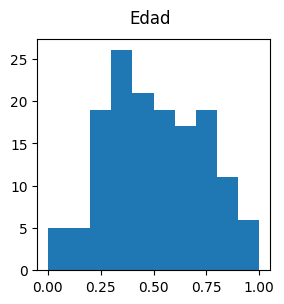

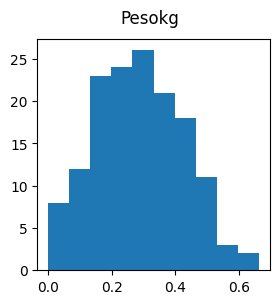

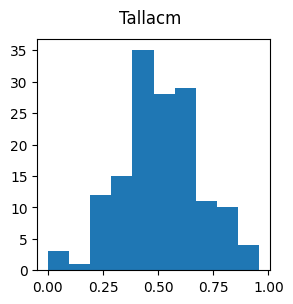

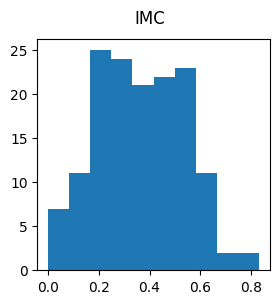

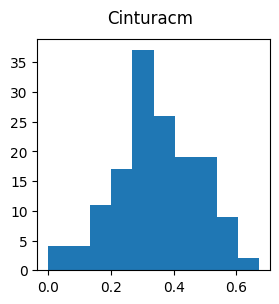

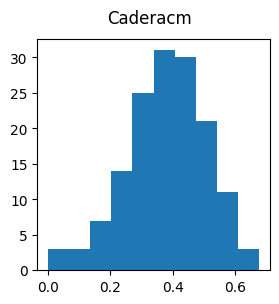

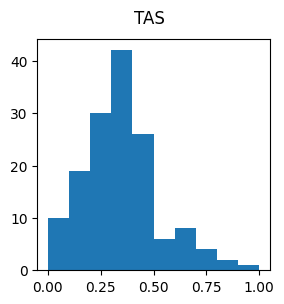

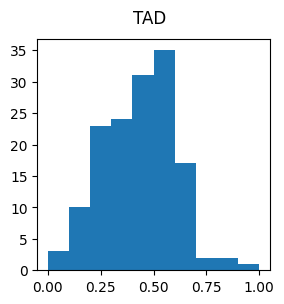

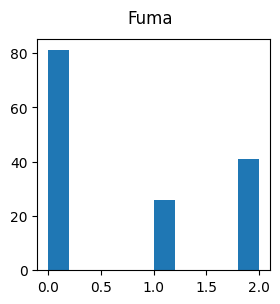

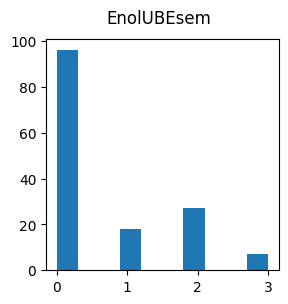

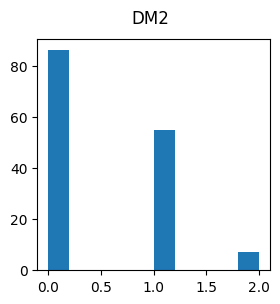

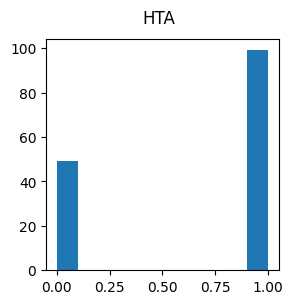

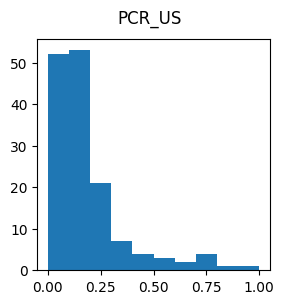

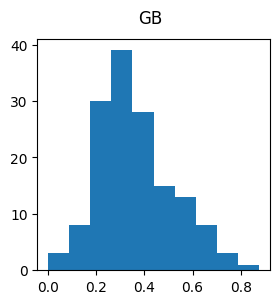

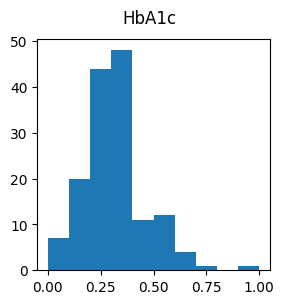

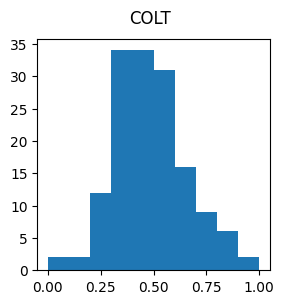

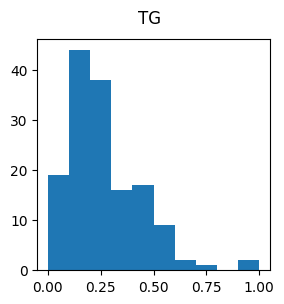

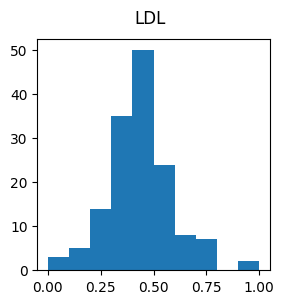

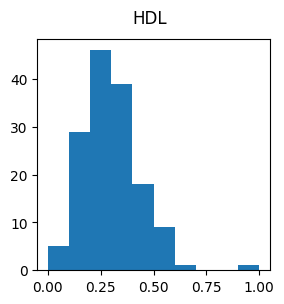

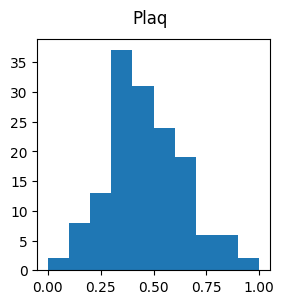

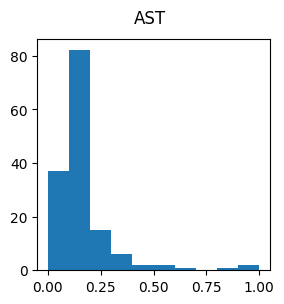

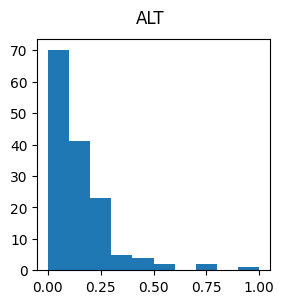

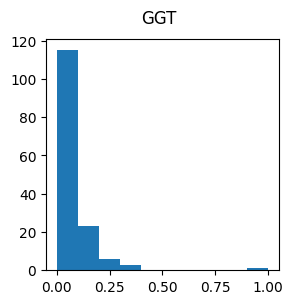

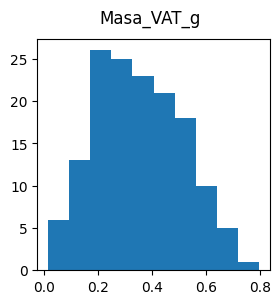

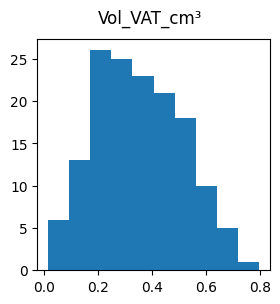

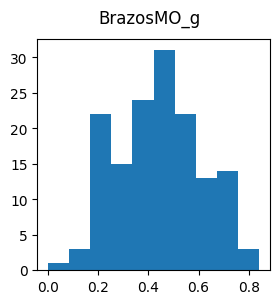

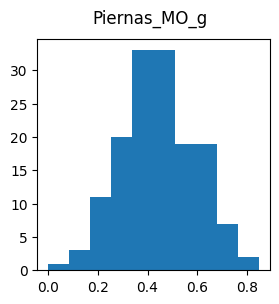

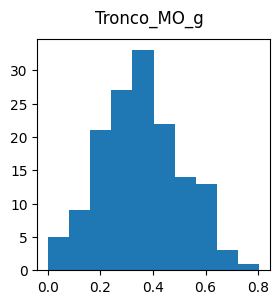

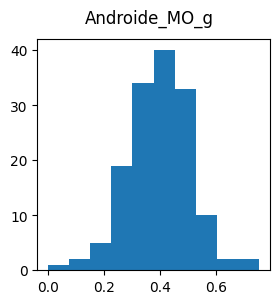

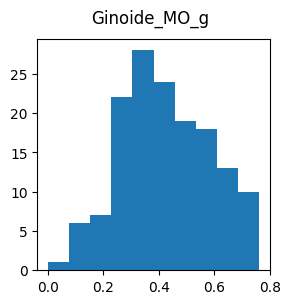

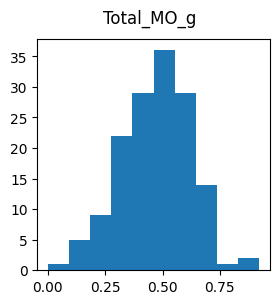

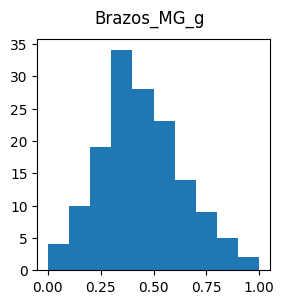

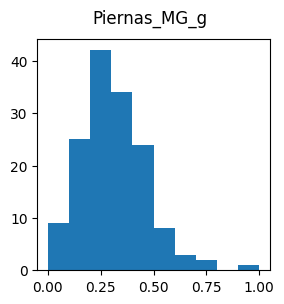

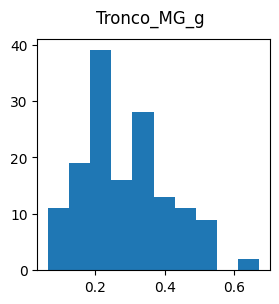

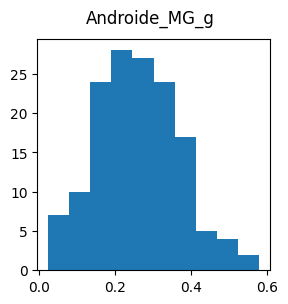

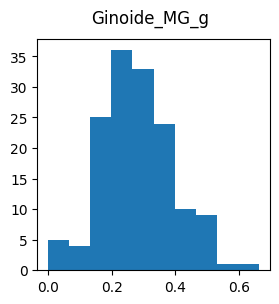

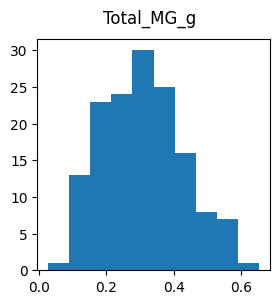

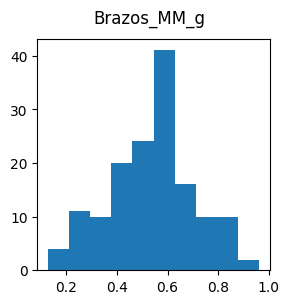

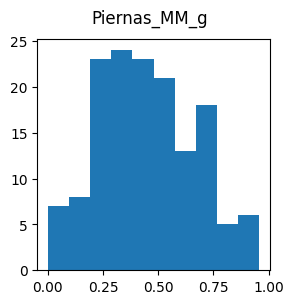

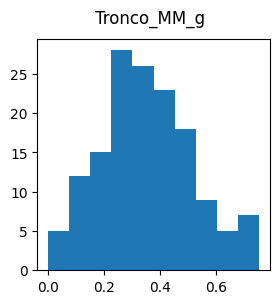

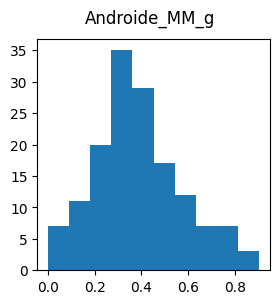

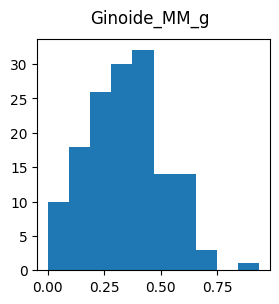

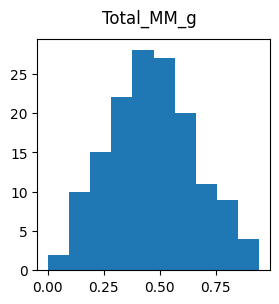

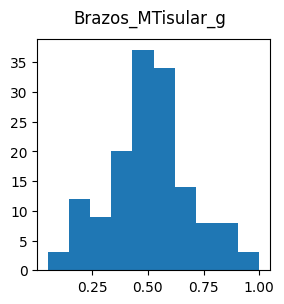

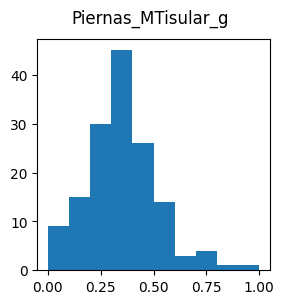

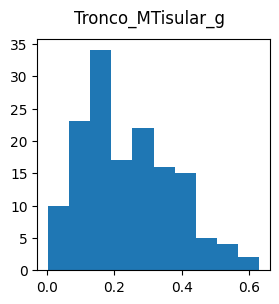

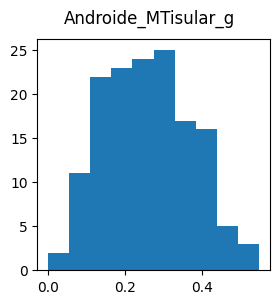

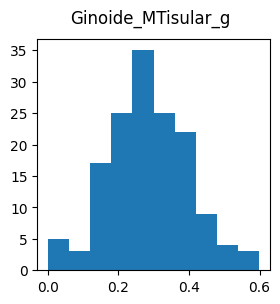

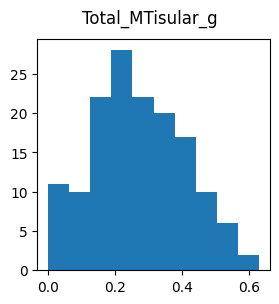

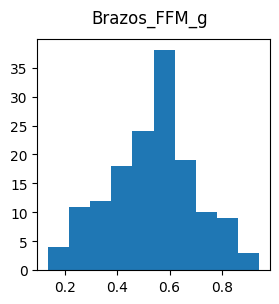

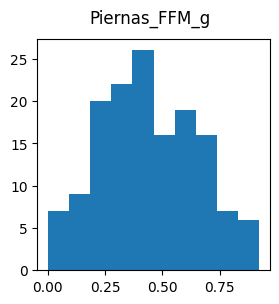

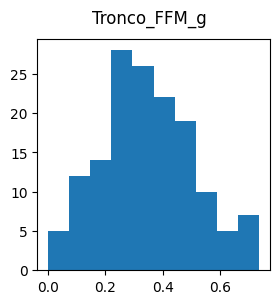

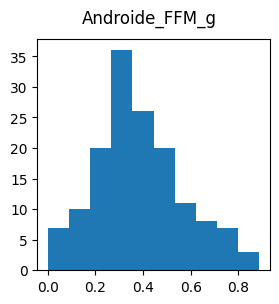

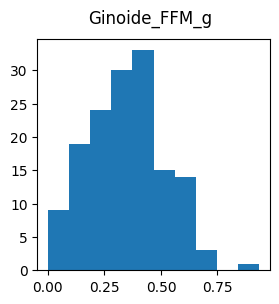

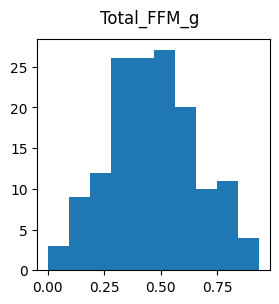

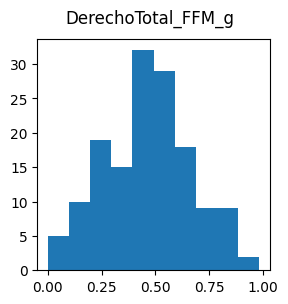

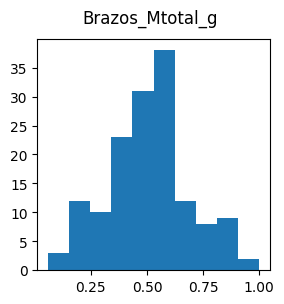

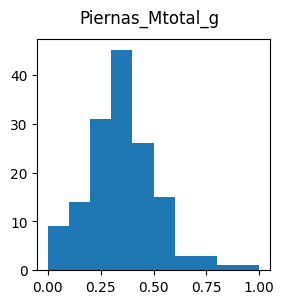

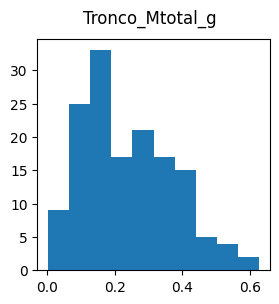

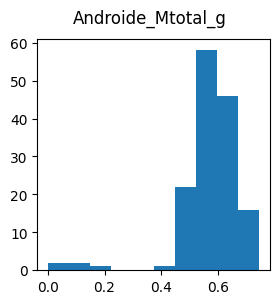

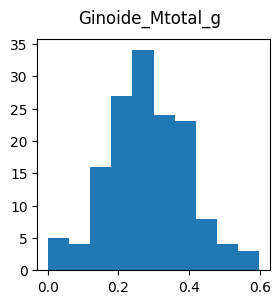

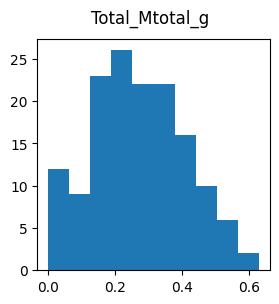

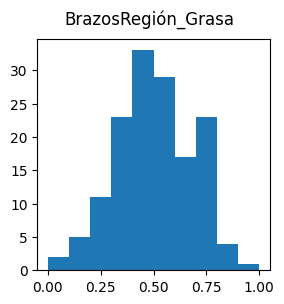

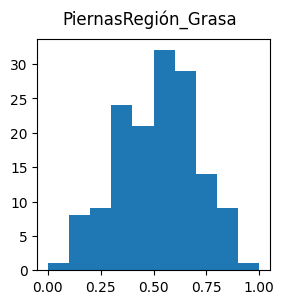

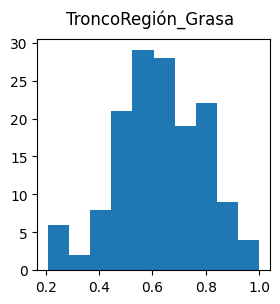

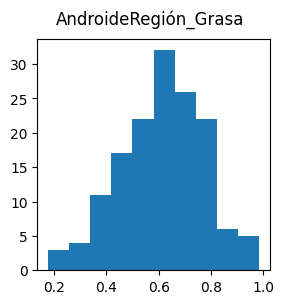

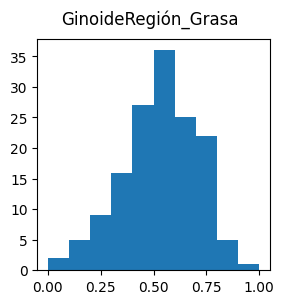

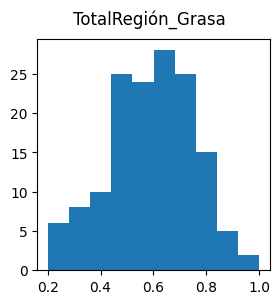

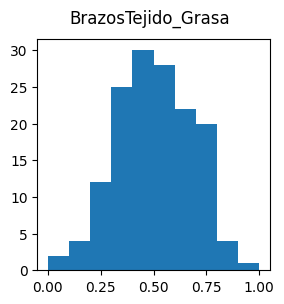

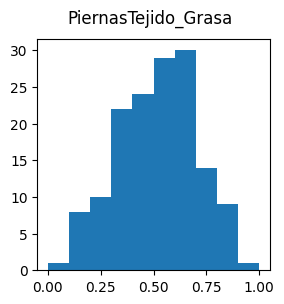

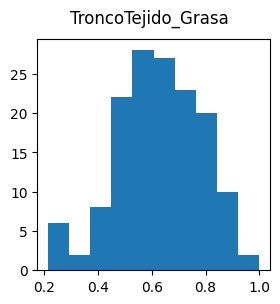

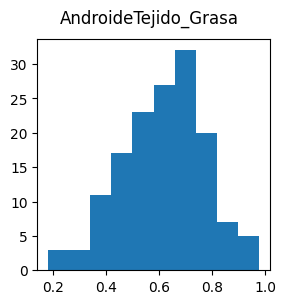

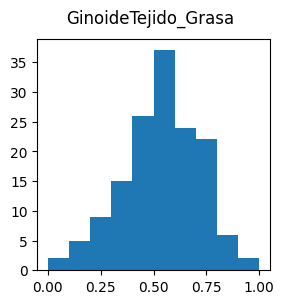

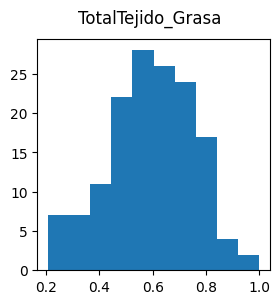

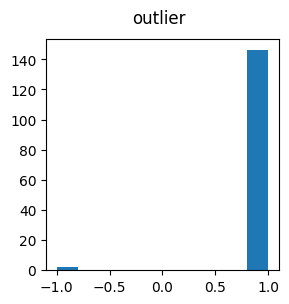

In [36]:
#Code to make histograms with each variable(column) of the dataframe
for x in data1_imp2:
  plt.figure(figsize=(3,3))
  plt.hist(data1_imp2[x])
  plt.suptitle(x)

Next we'll apply a Spearman correlation of each feature with the label data (Masa_VAT_g and Vol_VAT_cm3)

In [37]:
#Code to compute the correlation between Masa_VAT_g and the rest of the variables, it only shows the variables with high enough results
result1 =[]
MasaVAT = data1_imp2["Masa_VAT_g"]
count1 = 0
for x in data1_imp2:
  corr = data1_imp2['Masa_VAT_g'].corr(data1_imp2[x], method='spearman')
  if (corr > 0.3 or corr<-0.30) and x!="Masa_VAT_g" and x!="Vol_VAT_cm³":
    count1+=1
    print("Correlation between Masa_VAT_g and", x, " = ", corr)
    result1.append(x)
    S2 = data1_imp2[x]
    std = np.std(MasaVAT-S2)
    print("Std =", std)
print("nº of var with a correlation with Masa_Vat_g higher than abs(0.3) = ", count1)
count2 = 0

#  #CODE TO COMPUTE THE CORRELATIONS BUT WITH THE SECOND LABEL DATA VOL_VAT_CM3
# # Now the same but with "Vol_VAT_cm3", this time we dont compute the std because Vol_VAT_cm3 and Masa_VAT_cm3 have almost perfect correlation between them, so they must have the same results.
# for x in data1_imp2:
#   corr = data1_imp2['Vol_VAT_cm³'].corr(data1_imp2[x])
#   if (corr > 0.30 or corr<-0.30) and x!="Vol_VAT_cm³" and x!="Masa_VAT_g":
#     count2+=1
#     print("Correlation between Vol_VAT_cm³ and", x, " = ", corr)
# print("nº of var with a correlation with Vol_Vat_cm³ higher than abs(0.3) = ", count2)

Correlation between Masa_VAT_g and Pesokg  =  0.3463288722655117
Std = 0.17384051474683698
Correlation between Masa_VAT_g and IMC  =  0.3167779694570815
Std = 0.19692319164458477
Correlation between Masa_VAT_g and Cinturacm  =  0.32011912710504786
Std = 0.17296388337015114
Correlation between Masa_VAT_g and DM2  =  0.3200258238038872
Std = 0.5642794607539687
Correlation between Masa_VAT_g and Tronco_MG_g  =  0.45778534192755993
Std = 0.1551518056171412
Correlation between Masa_VAT_g and Androide_MG_g  =  0.5244859958471879
Std = 0.1415388338301447
Correlation between Masa_VAT_g and Total_MG_g  =  0.32809551530513703
Std = 0.17046062364119574
Correlation between Masa_VAT_g and Androide_MM_g  =  0.3269611812701878
Std = 0.20336261636525743
Correlation between Masa_VAT_g and Tronco_MTisular_g  =  0.4207881437095484
Std = 0.16410994411105137
Correlation between Masa_VAT_g and Androide_MTisular_g  =  0.5289787540058498
Std = 0.14047500640408453
Correlation between Masa_VAT_g and Total_MTisu

### "Correlation" Association between categorical variables and the label data

We’re looking for a measure of association between two categorical features:
Using  Cramér’s V: based on a nominal variation of Pearson’s Chi-Square Test: the output is in the range of [0,1 (0 = no association and 1 = full association)

The label data used will be the one in the database created in the *Transforming the label data into categorical data* section of the project. (DataAP_cat)

There are only three categorical variables in the database:  "Fuma", "DM2", "HTA"

In [38]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [40]:
from dython.nominal import ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

As this method compares two categorical variables, we'll use a dataframe that is defined later in this code. For that reason we'll import the DataFrame, named dataAP, which has the label data as categorical data instead of continuous.



In [41]:
#Importing dataAP
file_name = '/content/drive/MyDrive/TFG/dataAP.csv'
dataAP = pd.read_csv(file_name, index_col=[0])

In [42]:
#Association between label and "DM2"
print("Association between label and 'DM2' is", cramers_v(data1_imp2["DM2"], dataAP["Masa_VAT_cat"]))

#Association between label and "Fuma"
print("Association between label and 'Fuma' is", cramers_v(data1_imp2["Fuma"], dataAP["Masa_VAT_cat"]))

#Association between label and "HTA"
print("Association between label and 'HTA' is", cramers_v(data1_imp2["HTA"], dataAP["Masa_VAT_cat"]))

#Association between label and "EnolUBEsem"
print("Association between label and 'EnolUBEsem' is", cramers_v(data1_imp2["EnolUBEsem"], dataAP["Masa_VAT_cat"]))

Association between label and 'DM2' is 0.2367299119987962
Association between label and 'Fuma' is 0.0
Association between label and 'HTA' is 0.0
Association between label and 'EnolUBEsem' is 0.0


As we can see there is a low association between these values and the label data, so they won't be selected features.

### Finding the features that correlate the best with the target to create a dataframe with it.

DataFrame with the variables that correlate the best with 'Masa_VAT_g' and 'Vol_VAT_cm³', named data1_imp3:

> The criteria applied has been that a correlation coefficient higher than 0.3 (or lower than -0.3) will be considered for the feature selection 



In [43]:
#Code to create a dataframe with the variables that correlate the best with 'Masa_VAT_g' and 'Vol_VAT_cm³'

data1_imp3 = data1_imp2.copy()
for x in data1_imp3:
  corr = data1_imp3['Masa_VAT_g'].corr(data1_imp3[x])
  if (0.0 < corr < 0.30 or 0.0 > corr >-0.30) and x!="Masa_VAT_g" and x!="Vol_VAT_cm³":
    data1_imp3 = data1_imp3.drop(x, axis=1)

for x in data1_imp3:
  corr = data1_imp3['Vol_VAT_cm³'].corr(data1_imp3[x])
  if (0.0 < corr < 0.30 or 0.0 > corr >-0.30) and x!="Vol_VAT_cm³" and x!="Masa_VAT_g":
    data1_imp3 = data1_imp3.drop(x, axis=1)
data1_imp3

Pesokg       IMC  Cinturacm  Masa_VAT_g  Vol_VAT_cm³  Tronco_MG_g  \
0    0.467685  0.547500   0.604938    0.427692     0.427776     0.466901   
1    0.185664  0.220168   0.345679    0.188205     0.188241     0.224133   
2    0.198590  0.341214   0.246914    0.424103     0.424147     0.227405   
3    0.622797  0.633779   0.506173    0.616923     0.616985     0.671821   
4    0.360752  0.266549   0.456790    0.226923     0.226954     0.234987   
..        ...       ...        ...         ...          ...          ...   
161  0.547591  0.476538   0.382716    0.685385     0.685459     0.399705   
163  0.388954  0.654617   0.345679    0.494103     0.494072     0.340090   
164  0.293772  0.288597   0.345679    0.366923     0.367046     0.332489   
166  0.165687  0.365784   0.672840    0.179231     0.179289     0.323989   
167  0.259694  0.619905   0.333333    0.254872     0.254779     0.390248   

     Androide_MG_g  Total_MG_g  Androide_MM_g  Tronco_MTisular_g  \
0         0.408592    0.505010       0.412939           0.417989   
1         0.227390    0.201144       0.380990           0.171411   
2         0.203704    0.296579       0.155351           0.132705   
3         0.579027    0.654711       0.511981           0.630988   
4         0.219531    0.396479       0.626597           0.218078   
..             ...         ...            ...                ...   
161       0.450151    0.498813       0.769968           0.379773   
163       0.342377    0.422984       0.390176           0.260725   
164       0.242356    0.342781       0.305511           0.282563   
166       0.245263    0.233802       0.337460           0.288481   
167       0.265504    0.286858       0.413339           0.362477   

     Androide_MTisular_g  Total_MTisular_g  Androide_FFM_g  Tronco_Mtotal_g  \
0               0.386033          0.467510        0.403101         0.415361   
1               0.230579          0.164109        0.377132         0.169279   
2               0.161361          0.182768        0.155039         0.130094   
3               0.547483          0.606608        0.506977         0.626959   
4               0.278371          0.365729        0.627907         0.217868   
..                   ...               ...             ...              ...   
161             0.498898          0.523860        0.758527         0.379310   
163             0.326779          0.368176        0.388372         0.260188   
164             0.226171          0.269891        0.301163         0.282132   
166             0.235605          0.150079        0.337209         0.285266   
167             0.268936          0.238600        0.405426         0.360502   

     Total_Mtotal_g  TroncoRegión_Grasa  AndroideRegión_Grasa  \
0          0.462366            0.819444              0.807843   
1          0.162485            0.592593              0.584314   
2          0.179211            0.736111              0.701961   
3          0.603345            0.930556              0.921569   
4          0.366786            0.495370              0.415686   
..              ...                 ...                   ...   
161        0.525687            0.680556              0.658824   
163        0.367981            0.796296              0.737255   
164        0.271207            0.699074              0.654902   
166        0.145759            0.657407              0.635294   
167        0.236559            0.699074              0.623529   

     TroncoTejido_Grasa  AndroideTejido_Grasa  
0              0.809091              0.801556  
1              0.590909              0.583658  
2              0.731818              0.696498  
3              0.918182              0.914397  
4              0.500000              0.424125  
..                  ...                   ...  
161            0.681818              0.657588  
163            0.790909              0.735409  
164            0.700000              0.653696  
166            0.650000              0.638132  
167            0.69

Heatmap of the data1_imp3 dataframe

In [44]:
corr = data1_imp3.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

Coefficient of determination or R squared.

This section is to see if a valuable linear variable has been missed by error.

*R squared of data1_imp3, the dataframe with the variables that correlate the best.*:

In [45]:
#Importing the libraries to calculate r^squared
import statsmodels.formula.api as smf 
from tabulate import tabulate

#Changing the name of the 'Vol_VAT_cm³' var to prevent problems with the "³" character.
data1_imp3 = data1_imp3.rename(columns={'Vol_VAT_cm³': 'Vol_VAT'})

#Code to compute r^2 and the p-value between Vol_VAT (Vol_VAT_cm³) and the other variables
results = []
for variable in data1_imp3:
  lm = smf.ols('Vol_VAT ~' + variable, data1_imp3).fit()
  pval = round(lm.pvalues[variable],4)
  r2 = round(lm.rsquared,4)
  if(pval < 0.05 and r2>0.2): results.append([variable, r2, pval])

print(tabulate(results, headers=["Variable", "R^2", "P-Value"]))

Variable                R^2    P-Value
-------------------  ------  ---------
Masa_VAT_g           1               0
Vol_VAT              1               0
Androide_MG_g        0.2742          0
Androide_MTisular_g  0.2876          0


*R squared of data1_imp2, the dataframe without the right-left complementary variables:*

In [46]:
#Changing the name of the 'Vol_VAT_cm³' var to prevent problems with the "³" character.
data1_imp2 = data1_imp2.rename(columns={'Vol_VAT_cm³': 'Vol_VAT'})

#Code to compute r^2 and the p-value between Vol_VAT (Vol_VAT_cm³) and the other variables
results = []
for variable in data1_imp2:
  lm = smf.ols('Vol_VAT ~' + variable, data1_imp2).fit()
  pval = round(lm.pvalues[variable],4)
  r2 = round(lm.rsquared,4)
  if(pval < 0.051 and r2 > 0.2): results.append([variable, r2, pval])


print(tabulate(results, headers=["Variable", "R^2", "P-Value"]))

Variable                R^2    P-Value
-------------------  ------  ---------
Masa_VAT_g           1               0
Vol_VAT              1               0
Androide_MG_g        0.2742          0
Androide_MTisular_g  0.2876          0


As we can see, the same variables are shown to have a somewhat decent r-squared in both dataframes, no valuable variable has been missed. A high R-squared value between a feature and the target variable does indicate a strong relationship between the two, but there is not any high value.

## **Exploratory Analysis: graphs**

### Heat maps

Heat map with all the variables:

In [48]:
corr = data1_imp2.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

For better visualization, we can divide the data in sections.
As the data1_imp2 has 156rows x 74columns, we can divide the dataframe in four groups, as we have two labels, the columns to divide are 72/4 = 18. Each heatmap will have the label data included.

In [49]:
#We define a dataframe without the label data masa_VAT_g and vol_VAT_cm3
data_wl = data1_imp2.copy()
label = ["Masa_VAT_g", 'Vol_VAT']
data_wl = data_wl.drop(label, axis=1)

In [50]:
#We define the four dataframes:

#######DATA_HEATMAP1
data_heatmap1 = data_wl.copy() #de 0 a 18
data_heatmap1 = data_heatmap1.iloc[:,0:18]
#Defining the dataframe with the first 18 features with a dataframe with the label data:
frames = [data_heatmap1, data1_imp2[label]]
#Adding the label data to the dataframe:
data_heatmap1 = pd.concat(frames,  axis=1)


#######DATA_HEATMAP2
data_heatmap2 = data_wl.copy() #de 19 a 36
data_heatmap2 = data_heatmap2.iloc[:,18:36]
frames2 = [data_heatmap2, data1_imp2[label]]
data_heatmap2 = pd.concat(frames2,  axis=1)


#######DATA_HEATMAP3
data_heatmap3 = data_wl.copy() #de 37 a 54
data_heatmap3 = data_heatmap3.iloc[:,36:54]
frames3 = [data_heatmap3, data1_imp2[label]]
data_heatmap3 = pd.concat(frames3,  axis=1)


#######DATA_HEATMAP2
data_heatmap4 = data_wl.copy() #de 55 a 72
data_heatmap4 = data_heatmap4.iloc[:,54:72]
frames4 = [data_heatmap4, data1_imp2[label]]
data_heatmap4 = pd.concat(frames4,  axis=1)

**We define a heatmap for each smaller dataframe:**

SMALLER DATA SET 1

<Axes: >

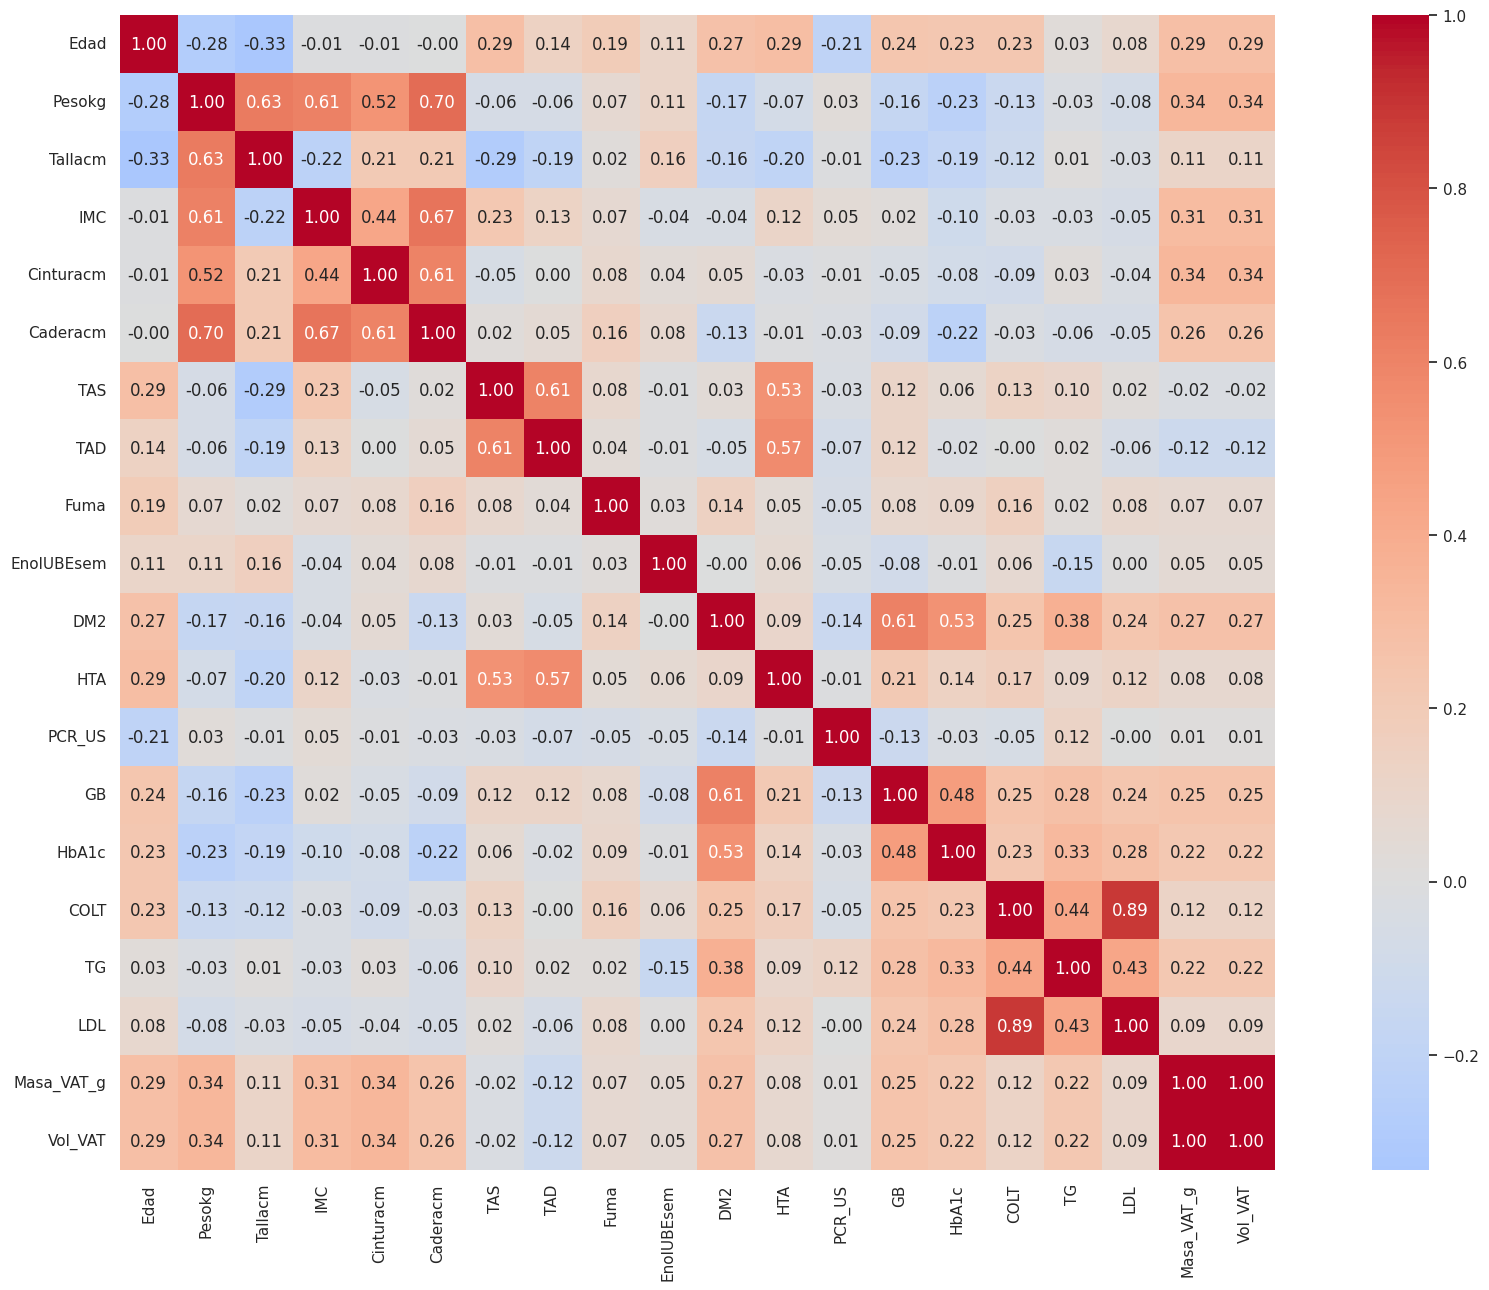

In [51]:
#Data_heatmap1:
corr1 = data_heatmap1.corr ()
# corr1.style.background_gradient (cmap = 'RdBu')  (ALTERNATIVE FOR THE HEATMAP)

sns.set(rc={'figure.figsize':(25,15)})
# mask = np.triu(np.ones_like(corr1, dtype=bool)) (ADD MASK=MASK TO SHOW ONLY HALF OF THE HEATMAP)
sns.heatmap(corr1, center=0, annot=True,
            fmt='.2f', square=True, cmap="coolwarm")

In [52]:
#sns.pairplot(data_heatmap1)

SMALLER DATA SET 2

<Axes: >

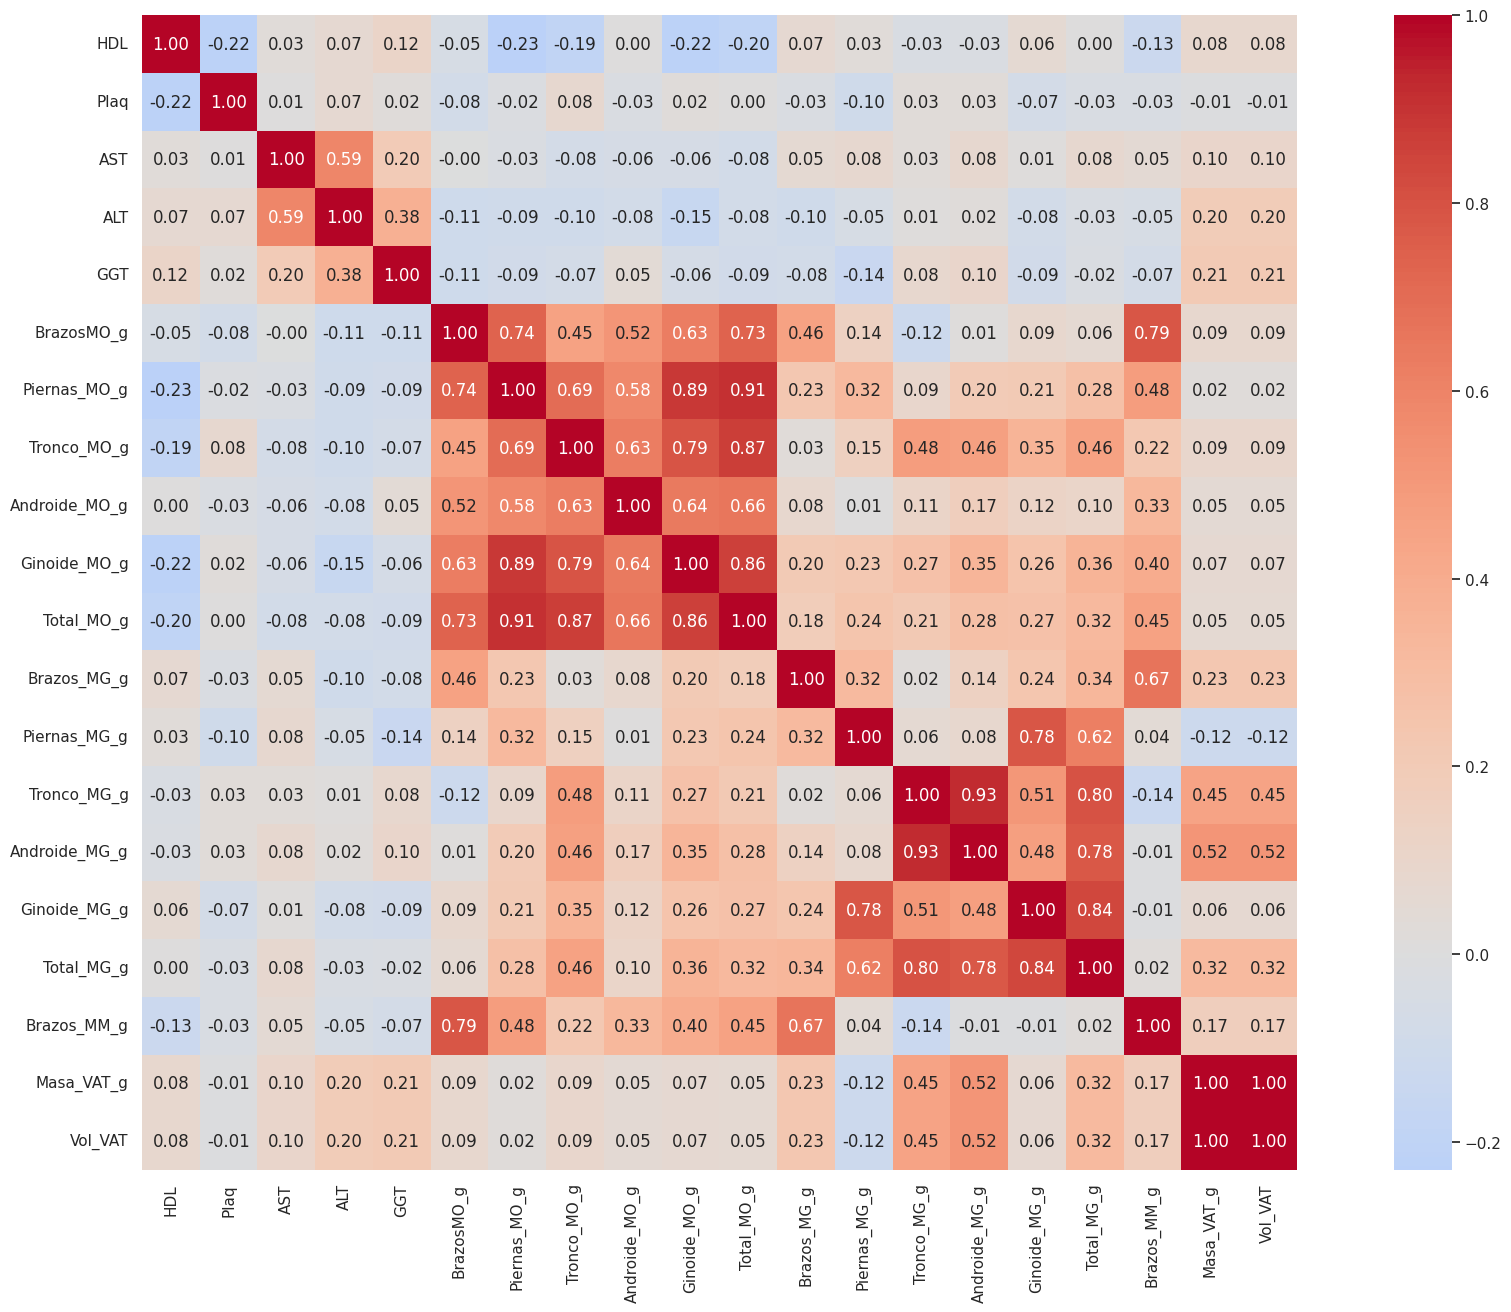

In [53]:
#Data_heatmap2:
corr2 = data_heatmap2.corr ()
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(corr2, center=0, annot=True,
            fmt='.2f', square=True, cmap="coolwarm")

SMALLER DATA SET 3

<Axes: >

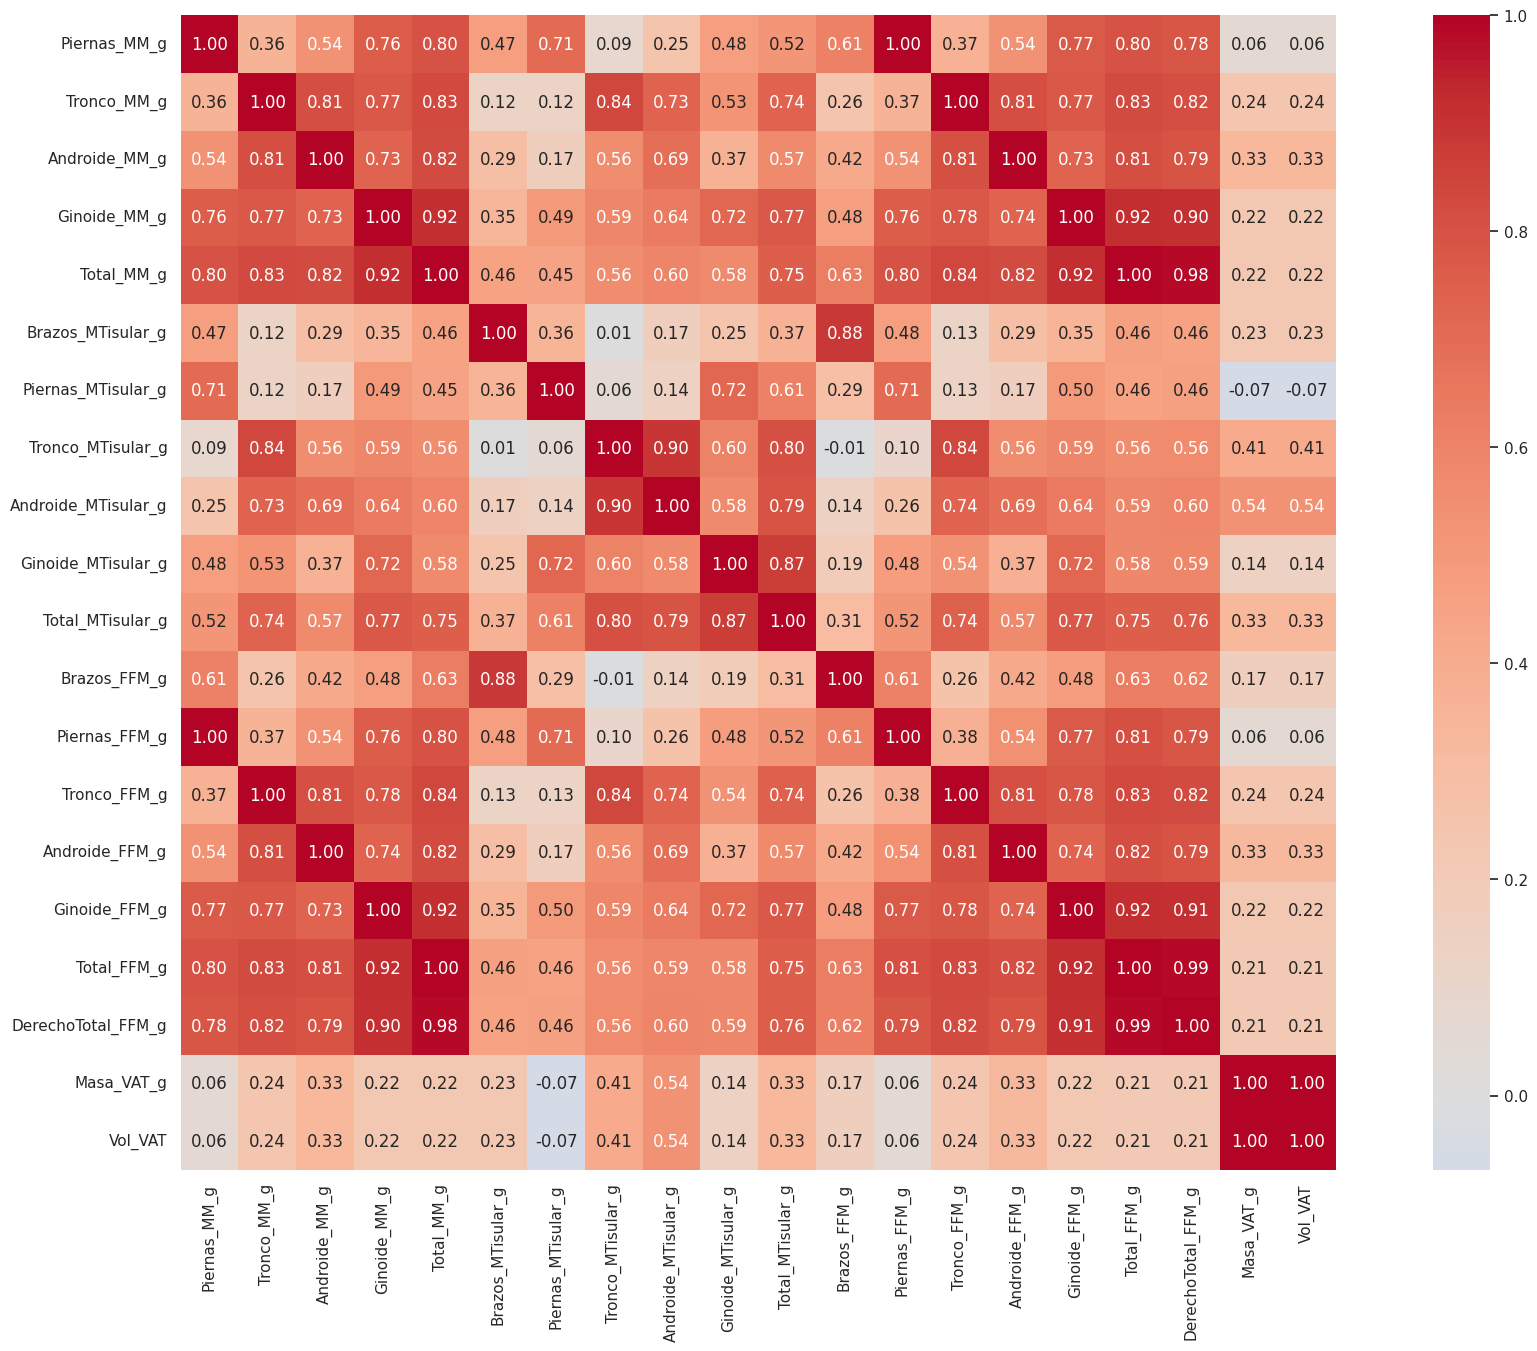

In [54]:
#Data_heatmap3:
corr3 = data_heatmap3.corr ()
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(corr3, center=0, annot=True,
            fmt='.2f', square=True, cmap="coolwarm")

SMALLER DATA SET 4

<Axes: >

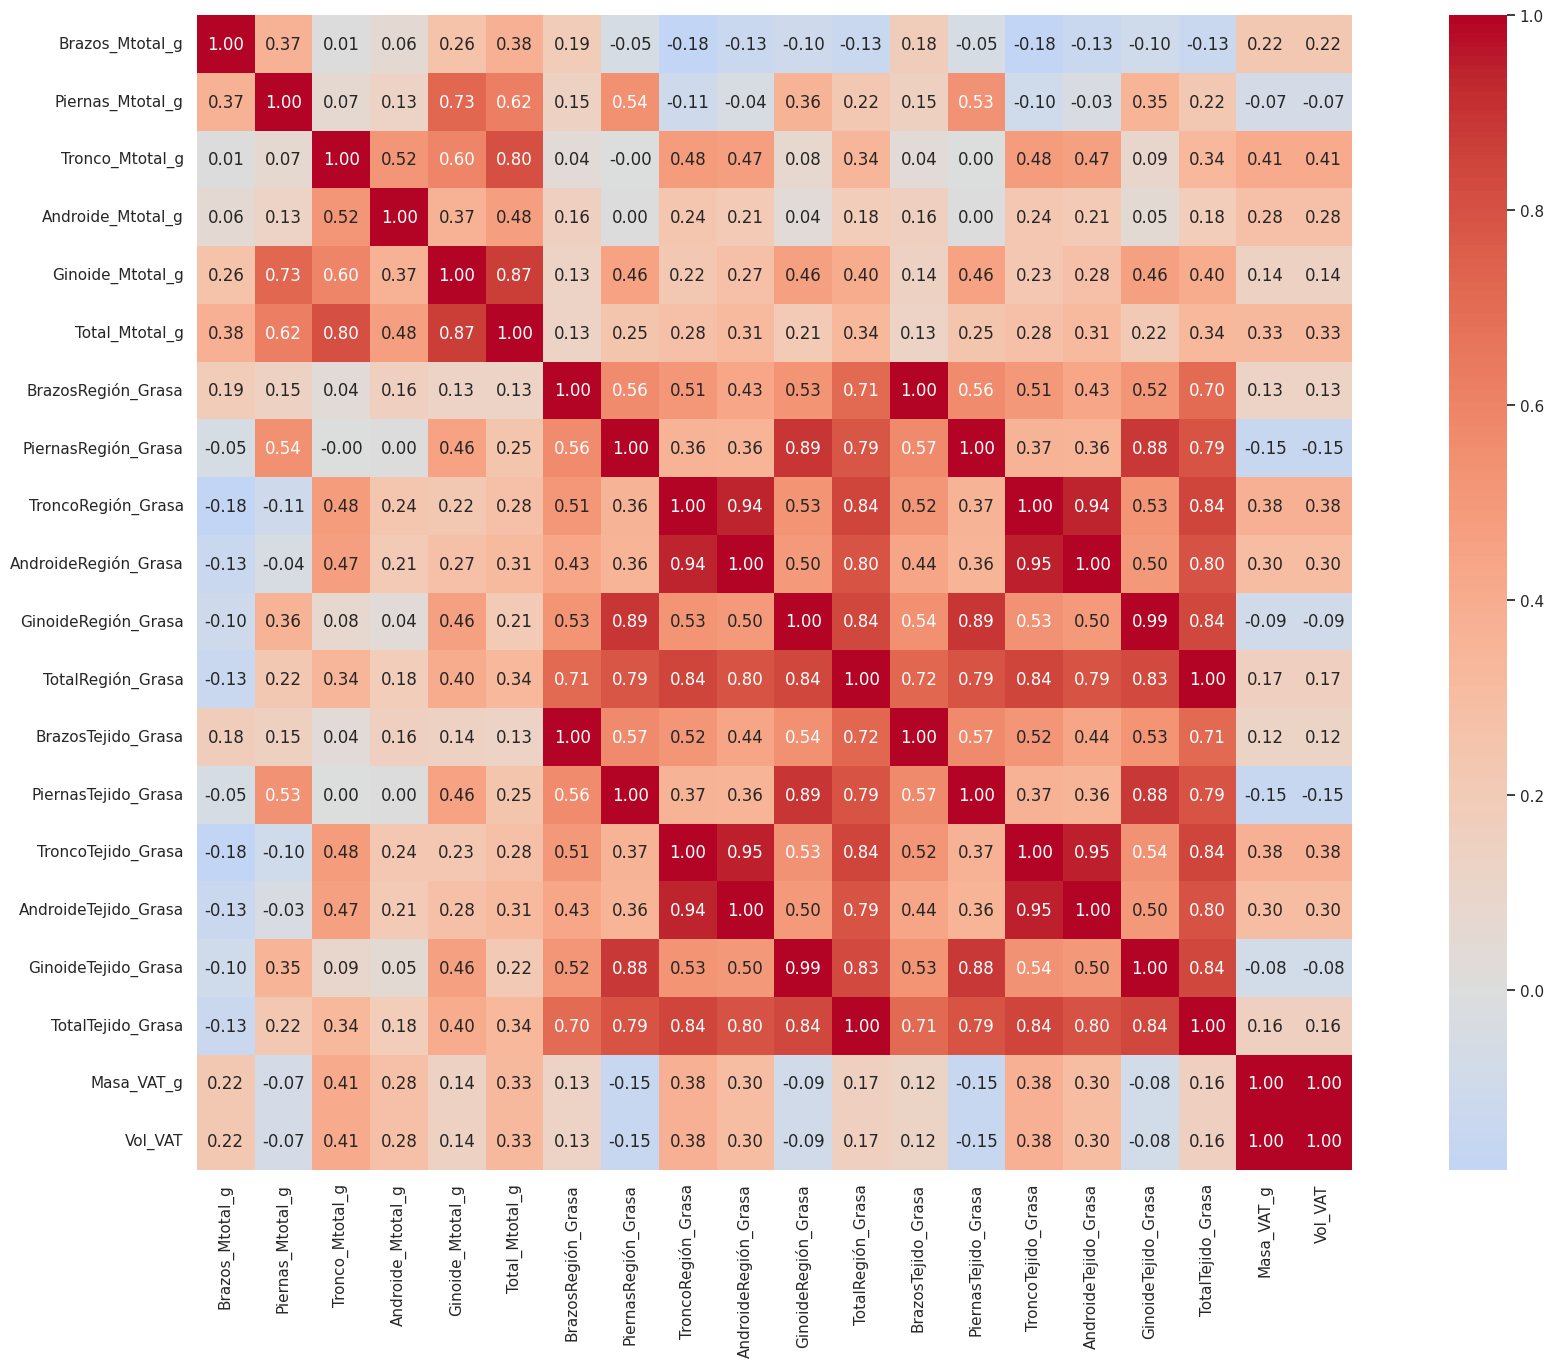

In [55]:
#Data_heatmap4:
corr4 = data_heatmap4.corr ()
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(corr4, center=0, annot=True,
            fmt='.2f', square=True, cmap="coolwarm")

### Scatter plots

Next some scatter plots of the label data vs the rest of the variables will be made to visualize the relation with the features.

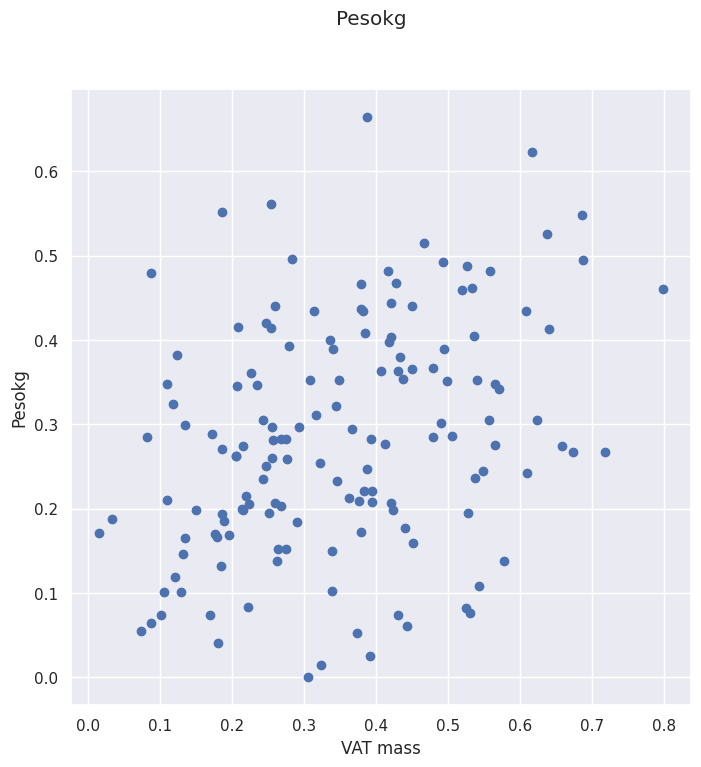

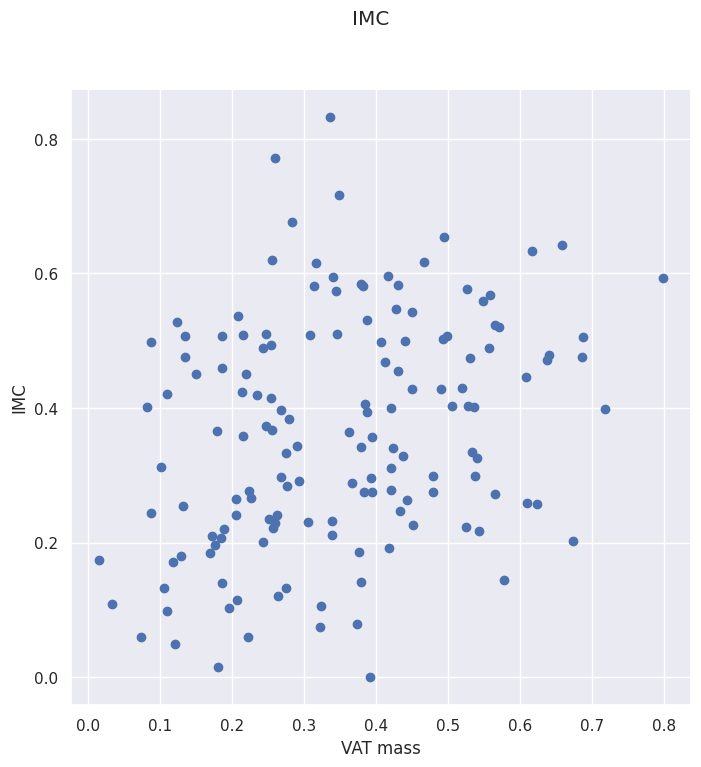

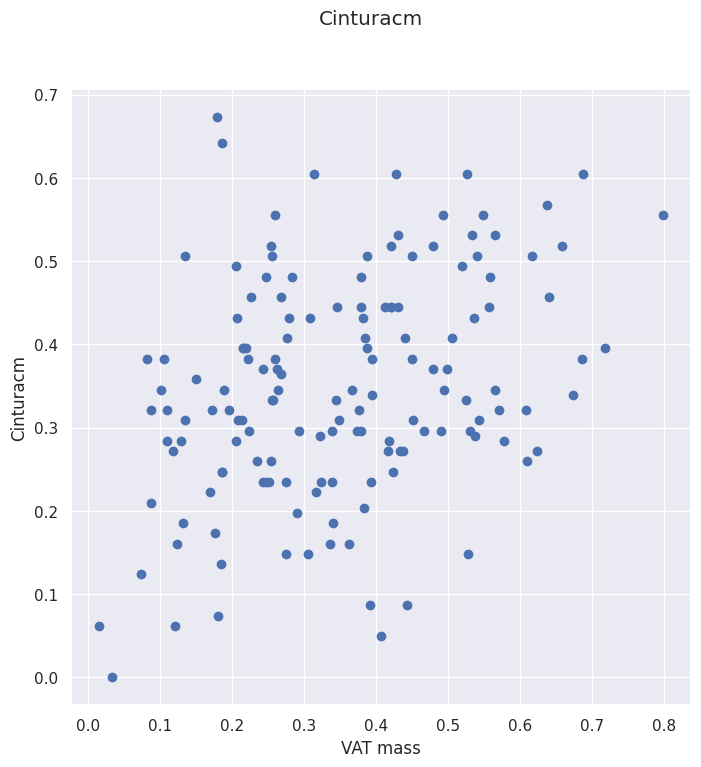

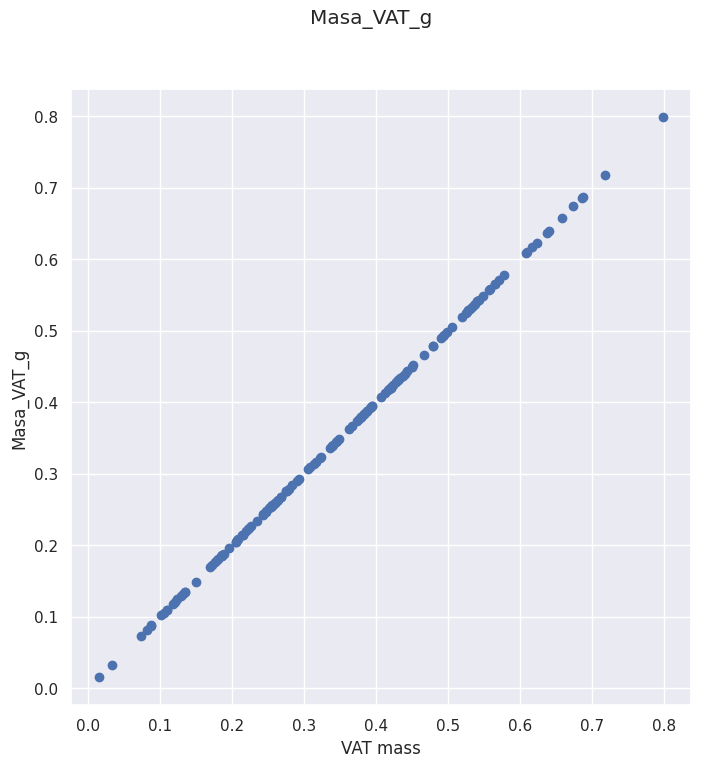

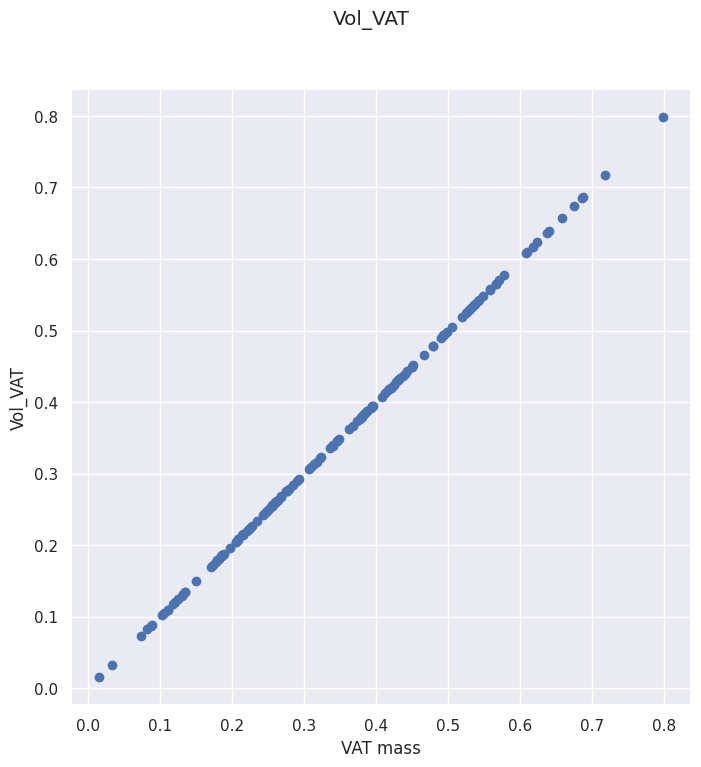

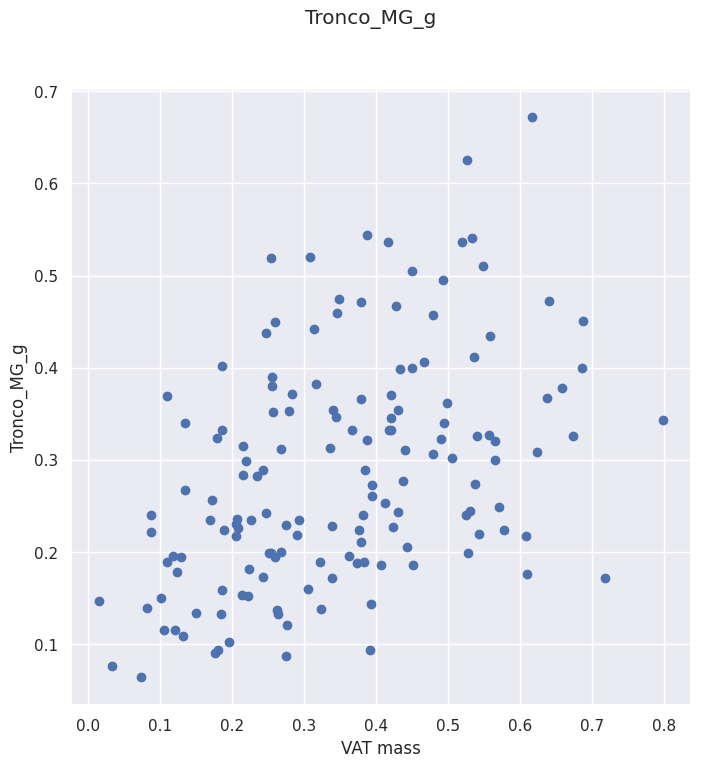

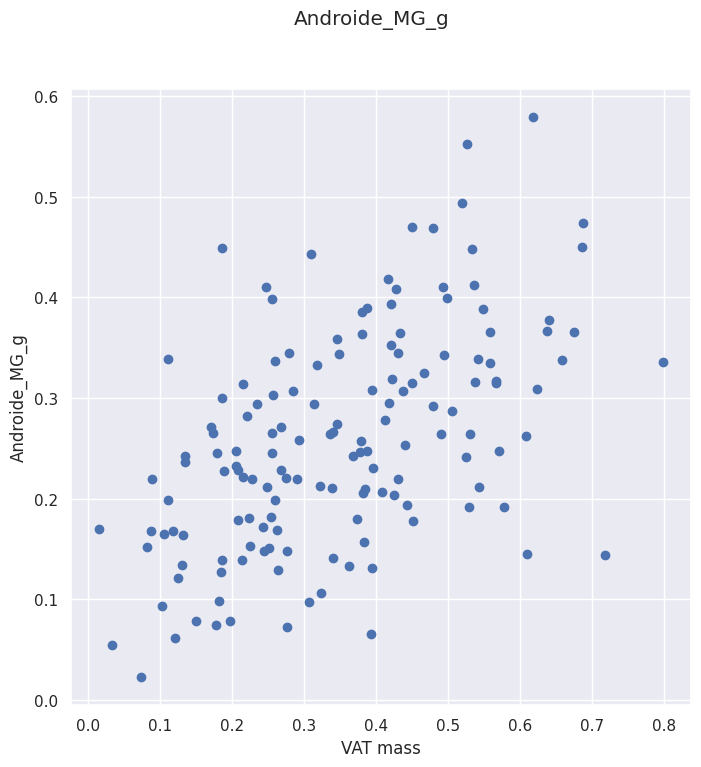

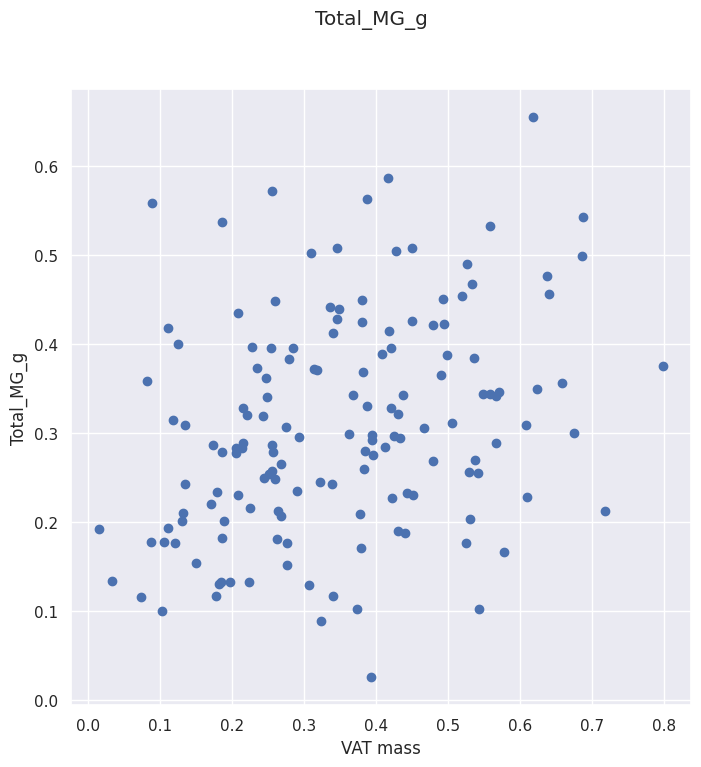

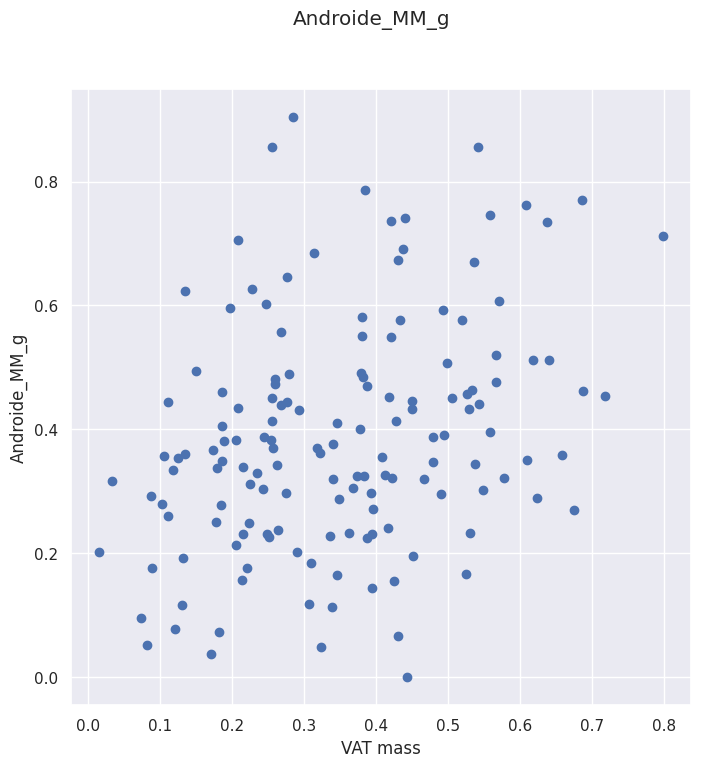

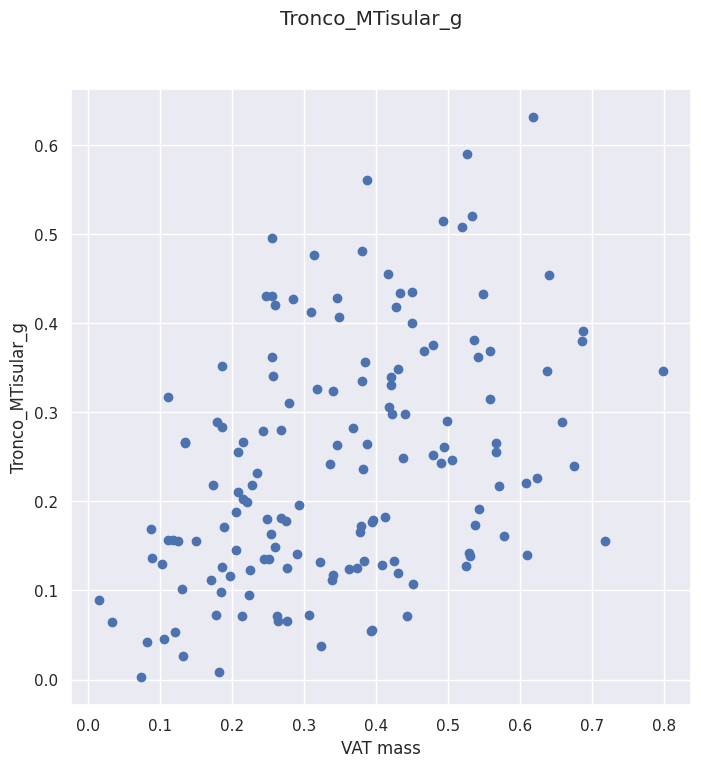

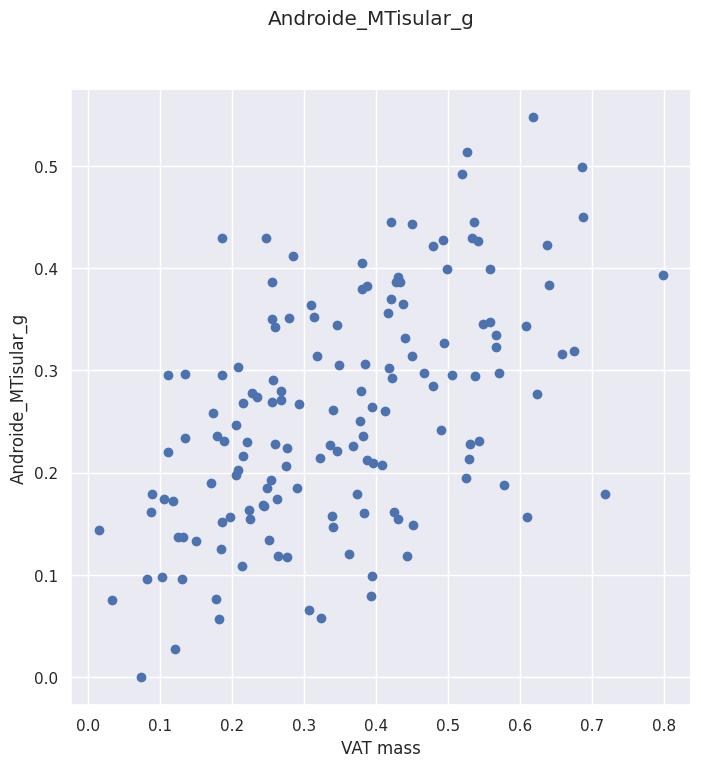

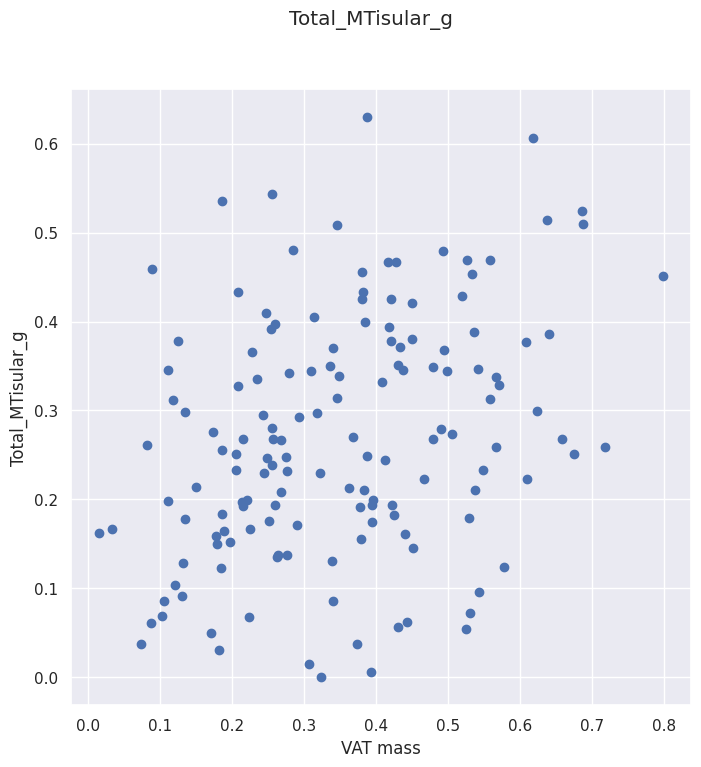

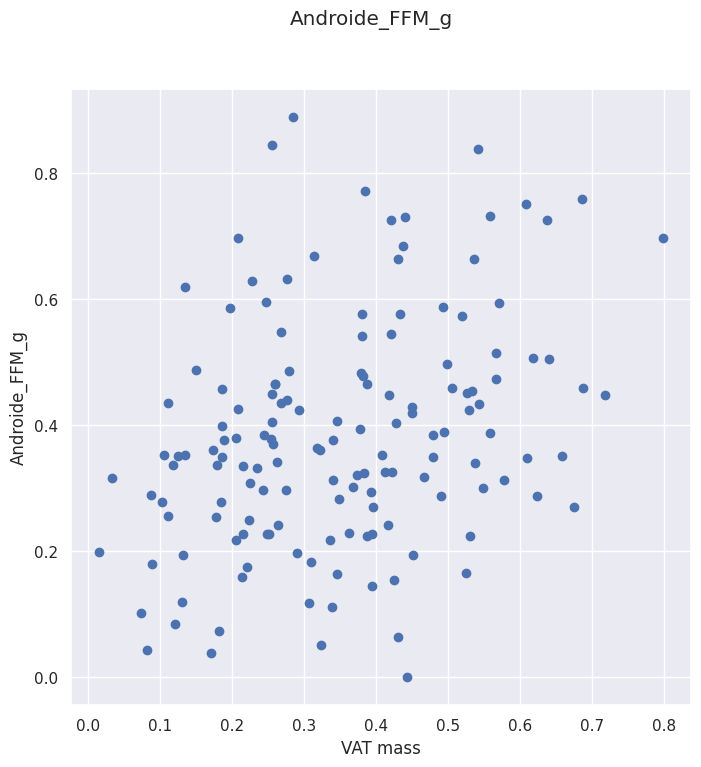

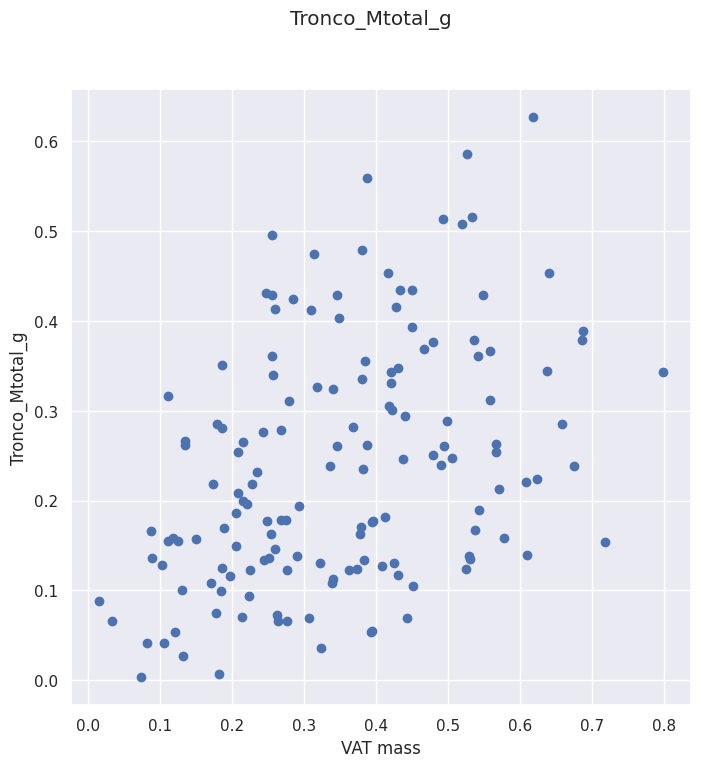

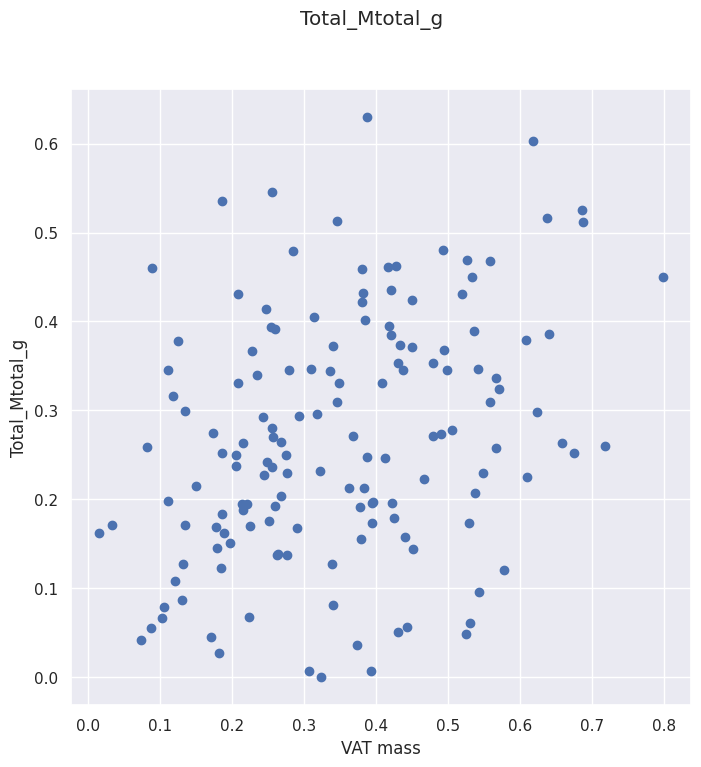

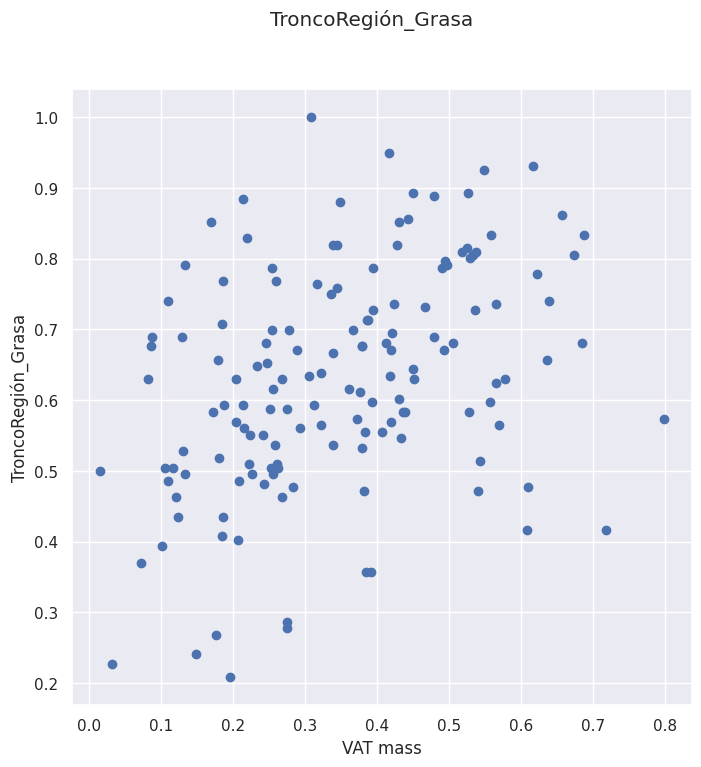

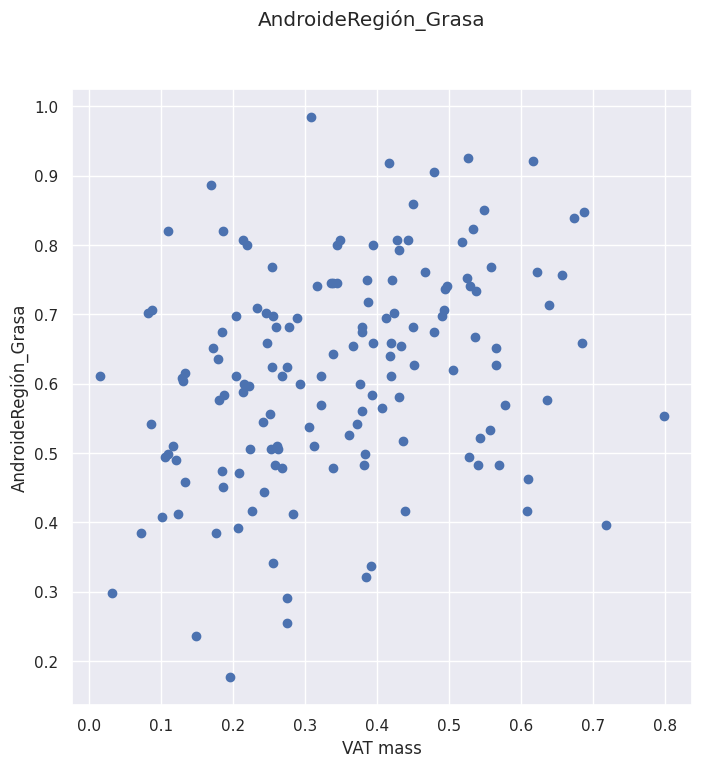

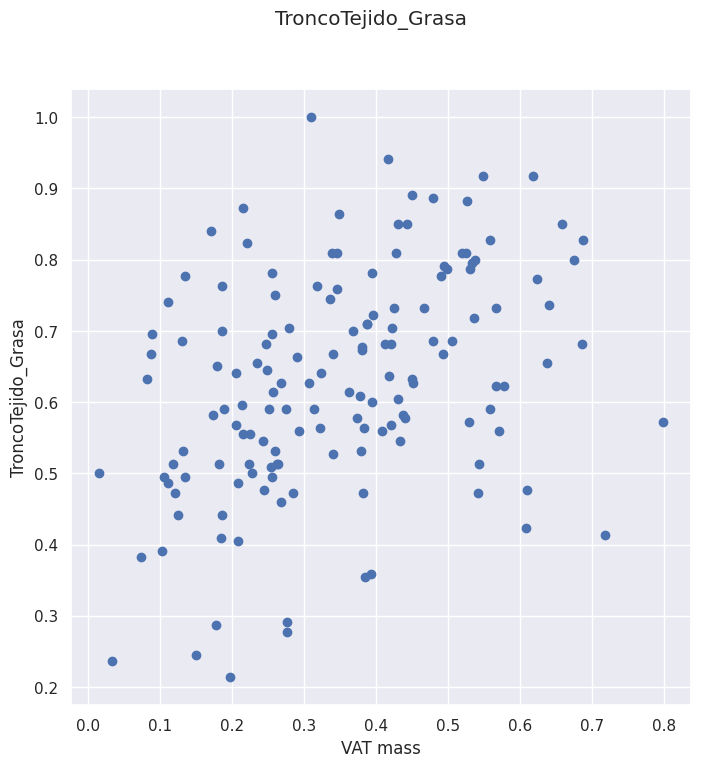

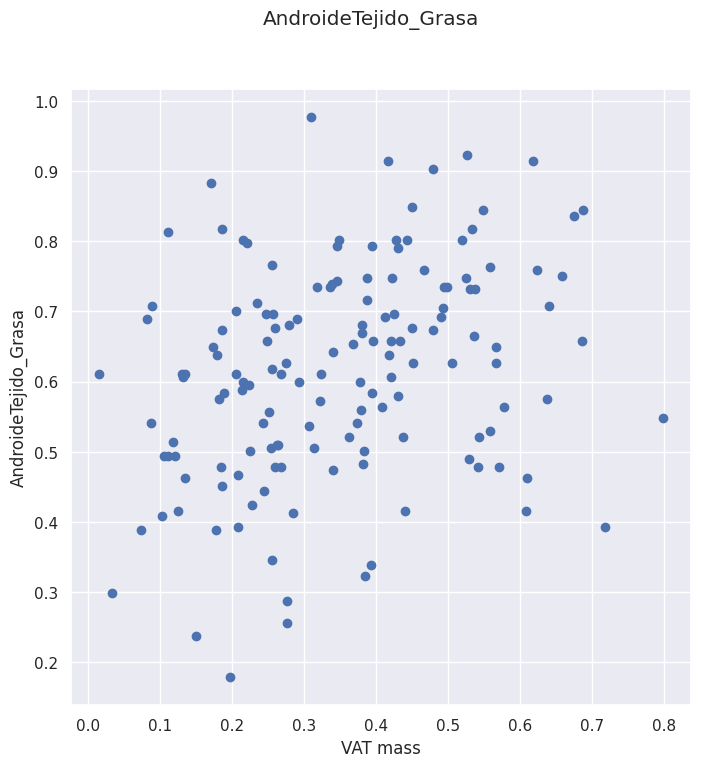

In [56]:
for x in data1_imp3: 
  plt.figure(figsize=(8,8))
  plt.scatter(data1_imp2["Masa_VAT_g"], data1_imp3[x])
  plt.suptitle(x)
  plt.xlabel("VAT mass")
  plt.ylabel(x)

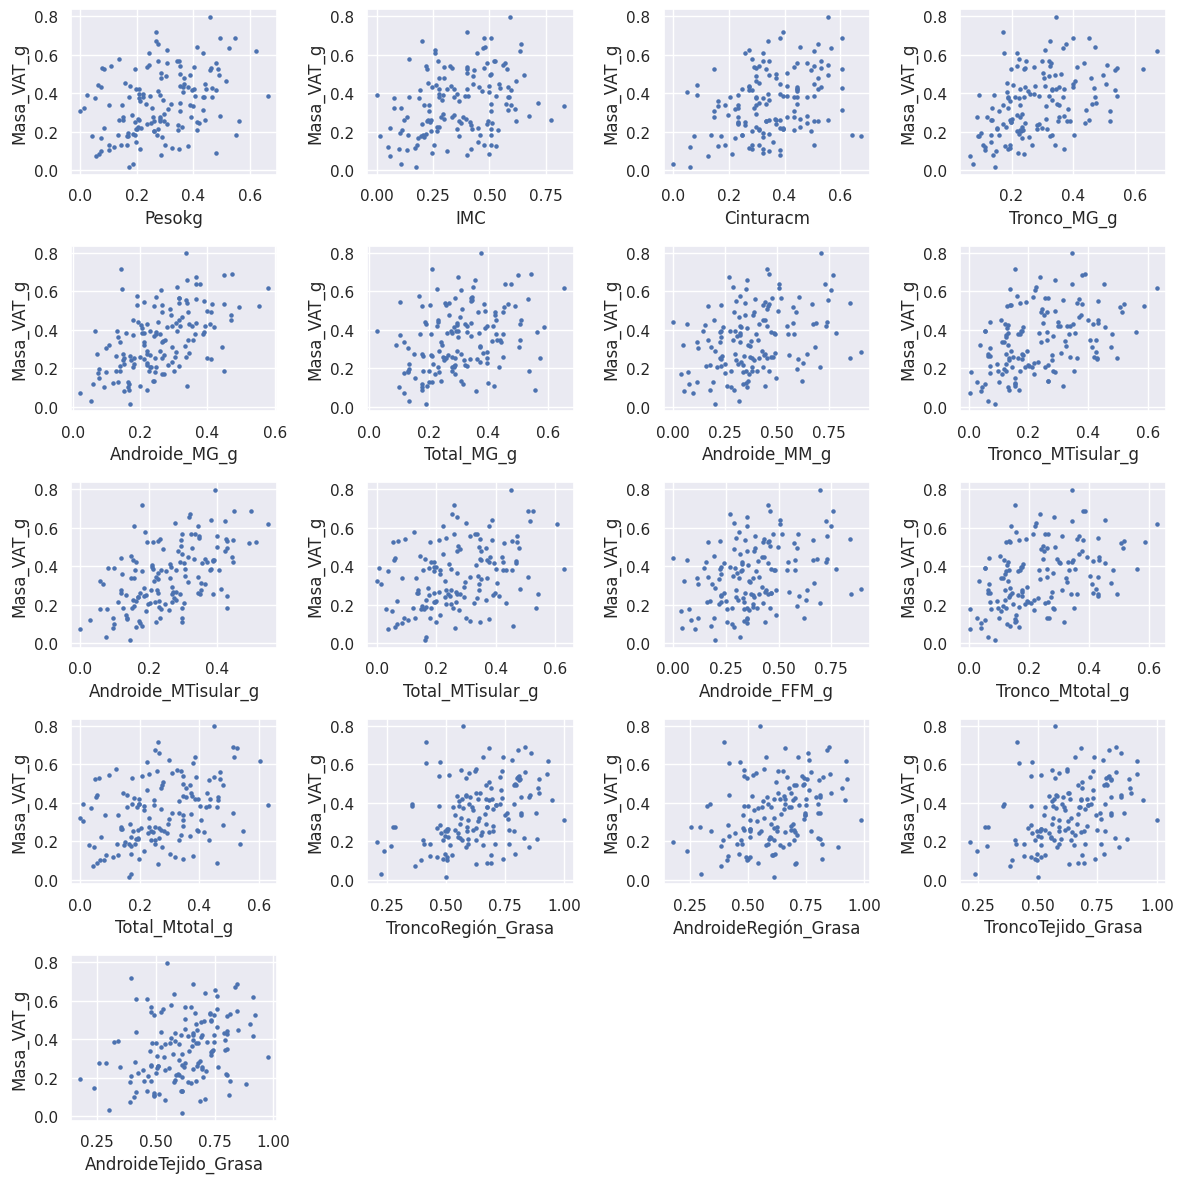

In [57]:
#Scatter plots of the variables that correlate the best
import pandas as pd
import matplotlib.pyplot as plt

dataplot = data1_imp3.copy()
drop= ["Masa_VAT_g", "Vol_VAT"]
dataplot = dataplot.drop(drop, axis=1)
# Assuming you have a DataFrame named 'df' and you want to create scatter plots for all columns
target_variable = 'target_variable'  # Name of the variable to compare against
num_plots = len(dataplot.columns)  # Number of scatter plots to create
num_rows = 5  # Number of rows in the grid
num_cols = 4  # Number of columns in the grid

# Calculate the number of subplots needed and create the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.flatten()

# Plot scatter plots for each column
for i, column in enumerate(dataplot.columns):
    ax = axes[i]
    ax.scatter(dataplot[column], data1_imp3["Masa_VAT_g"], s=5)
    ax.set_xlabel(column)
    ax.set_ylabel("Masa_VAT_g")

# Hide empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


As observable, the scatter plots of the reduced dataframe (with the features selected), doesn't have any obvious outlier data.

<ipython-input-58-4401dd269719>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,8))


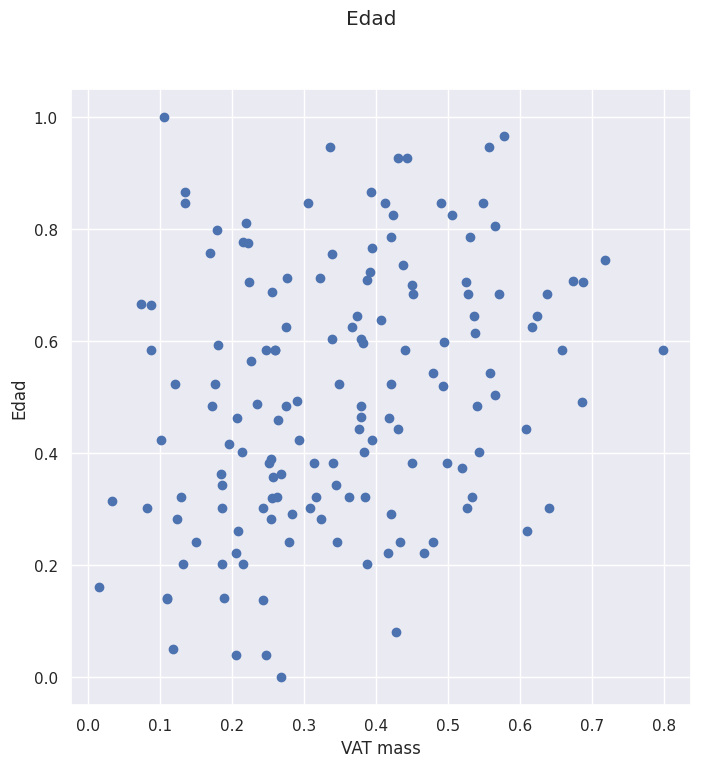

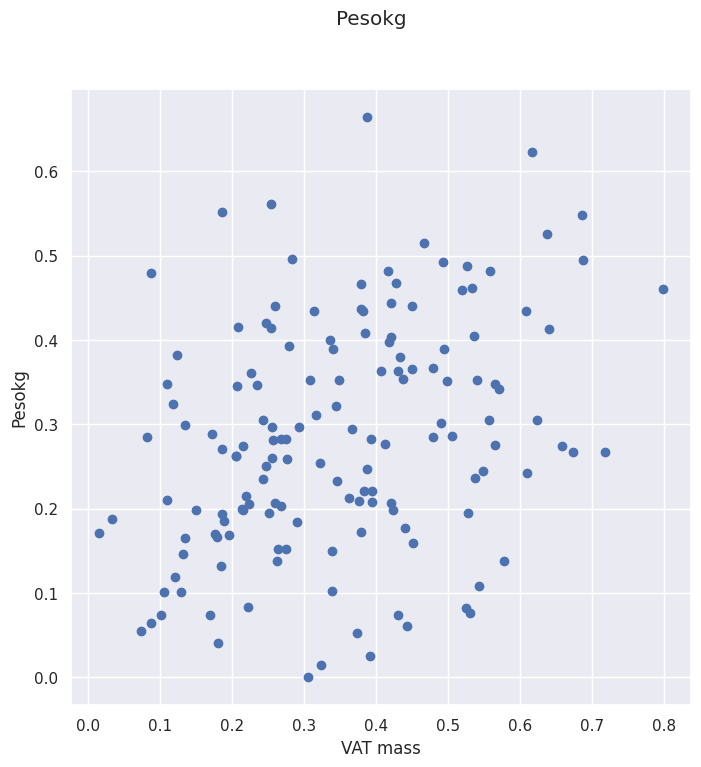

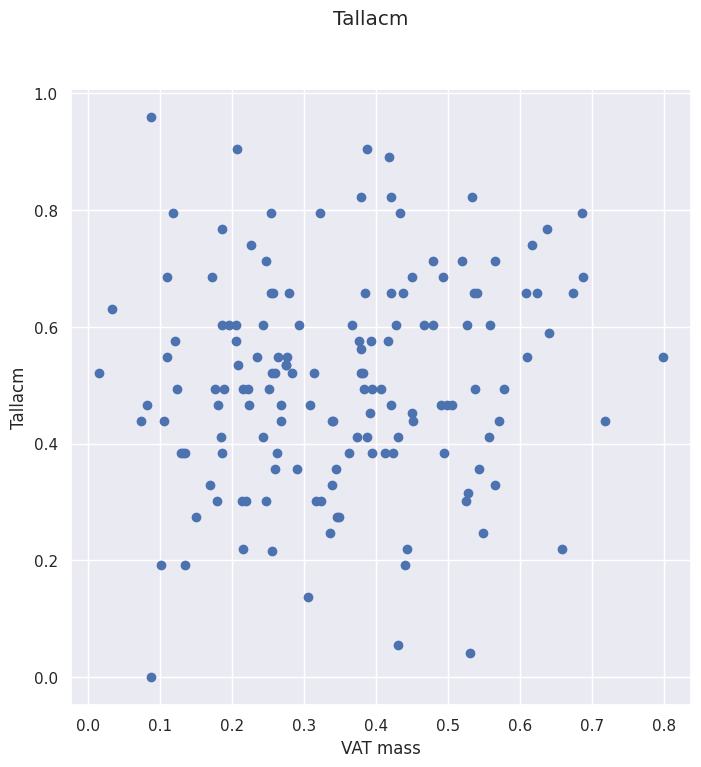

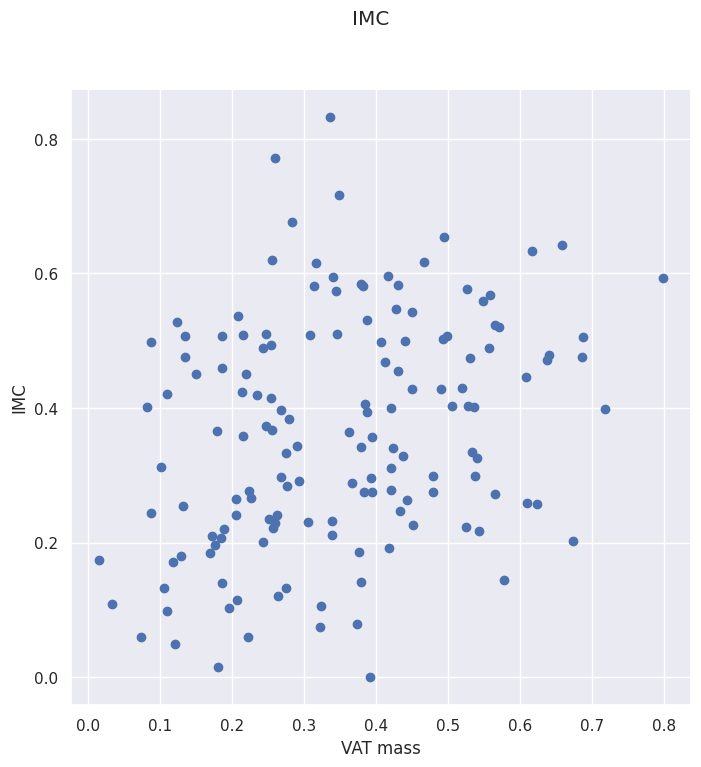

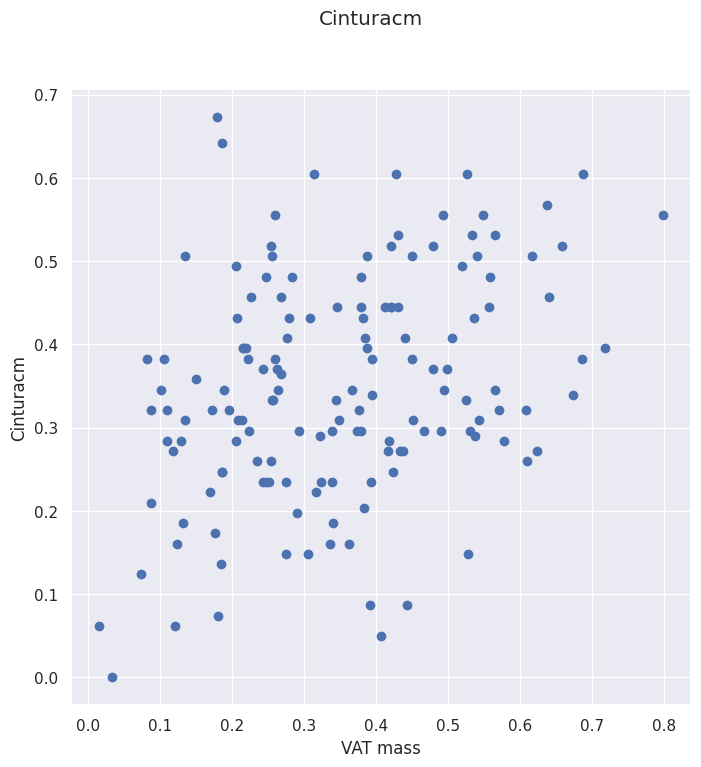

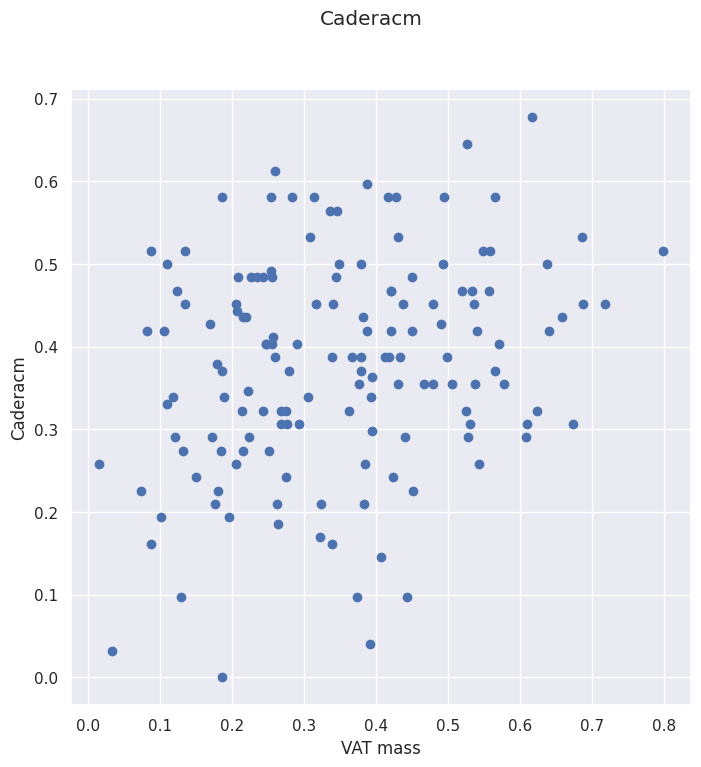

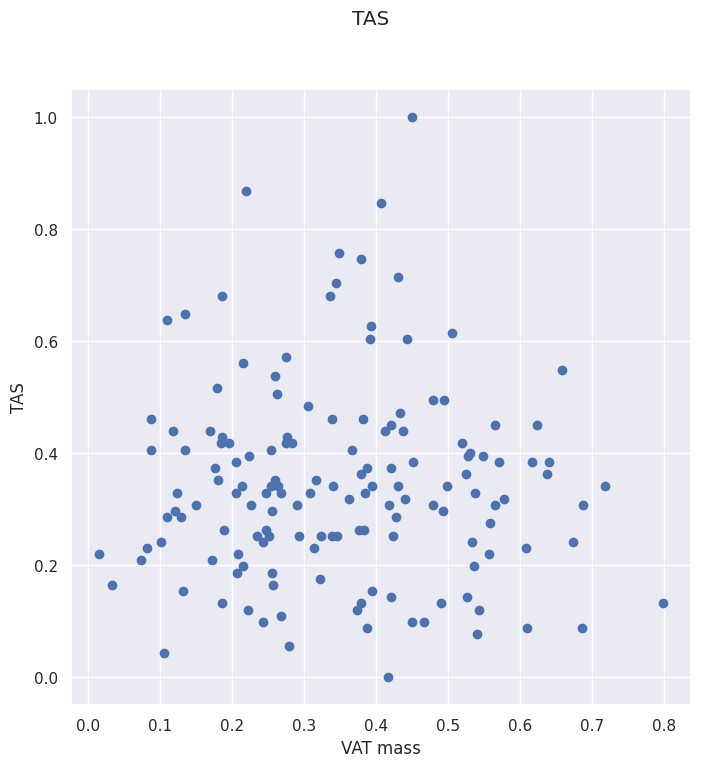

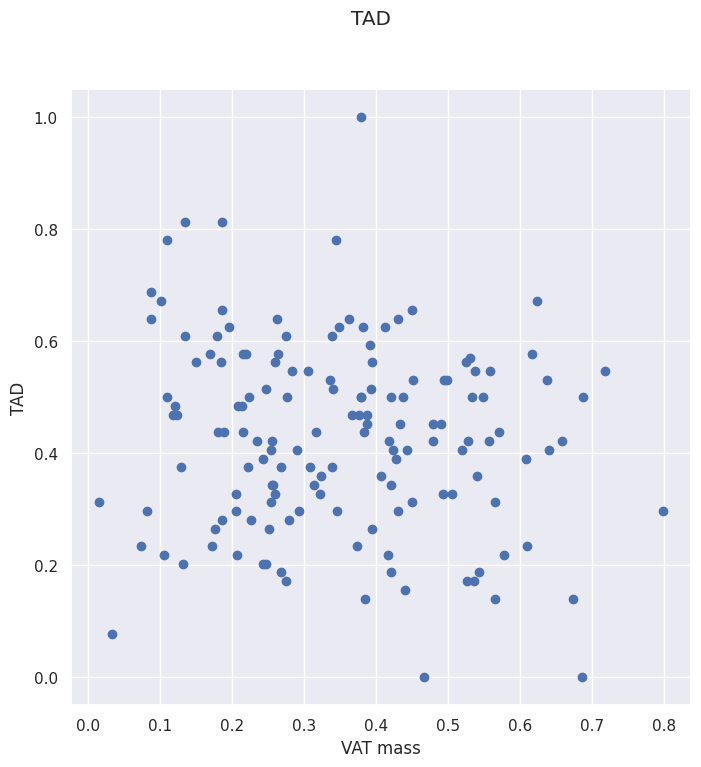

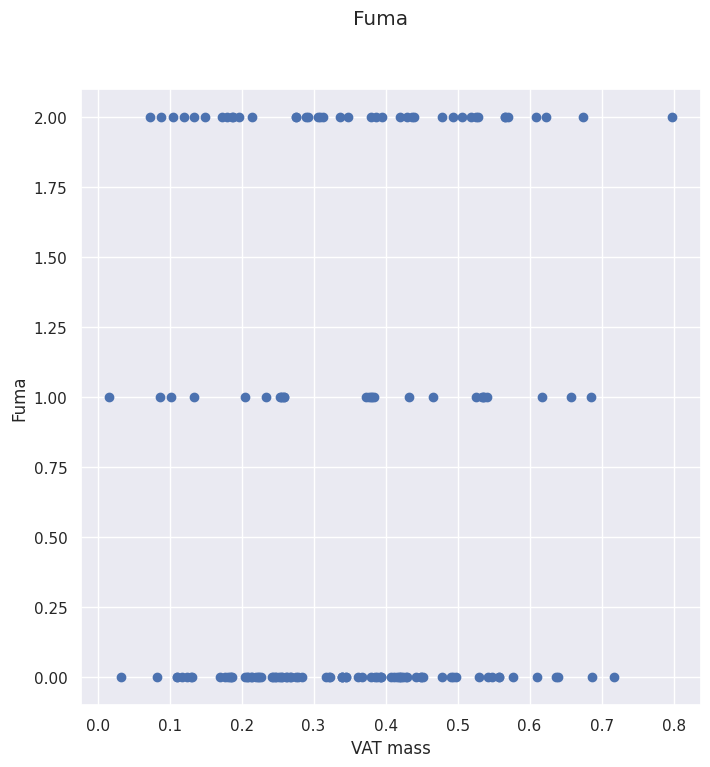

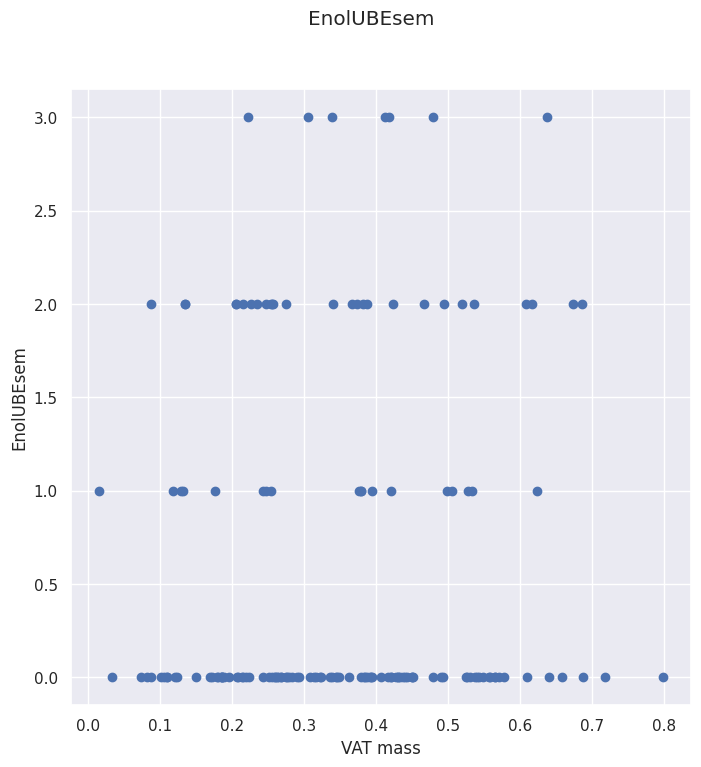

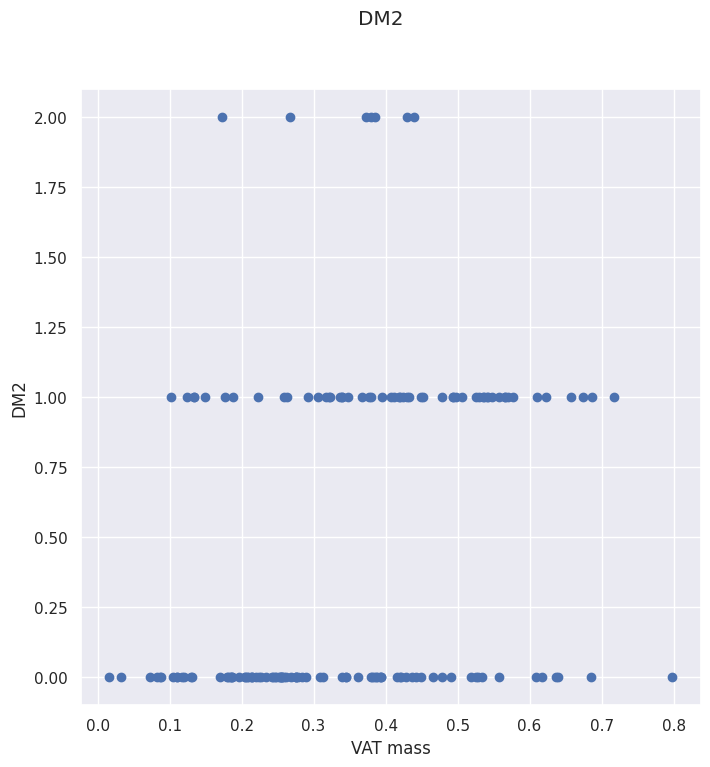

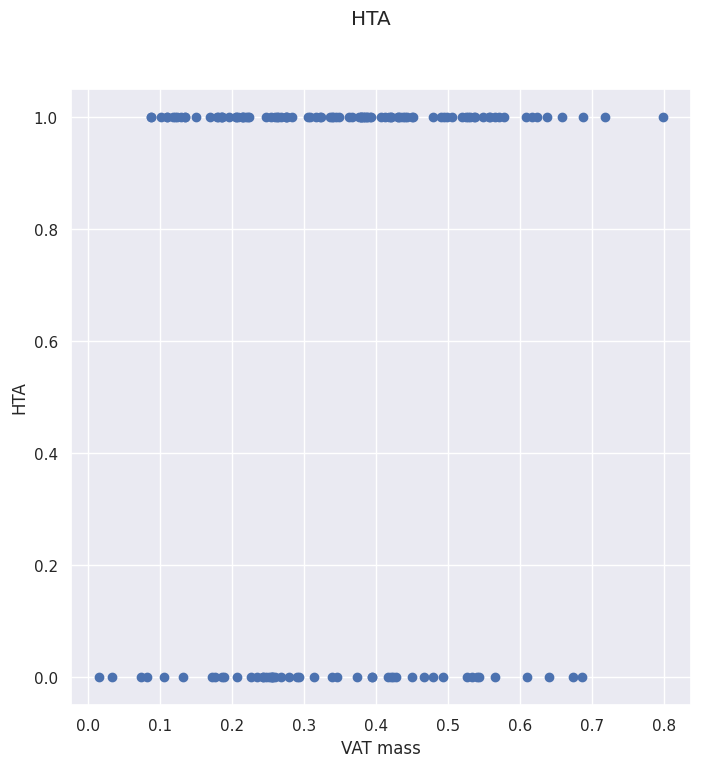

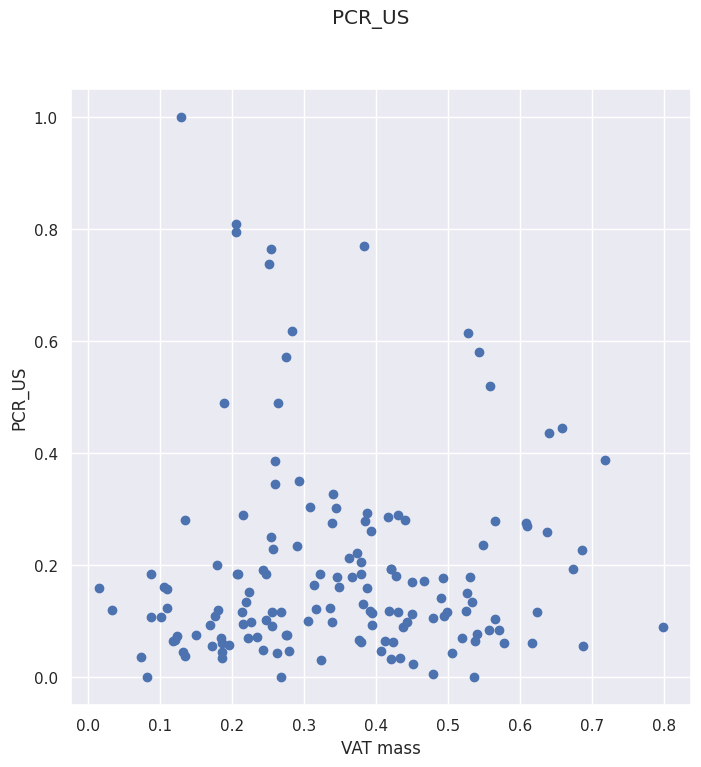

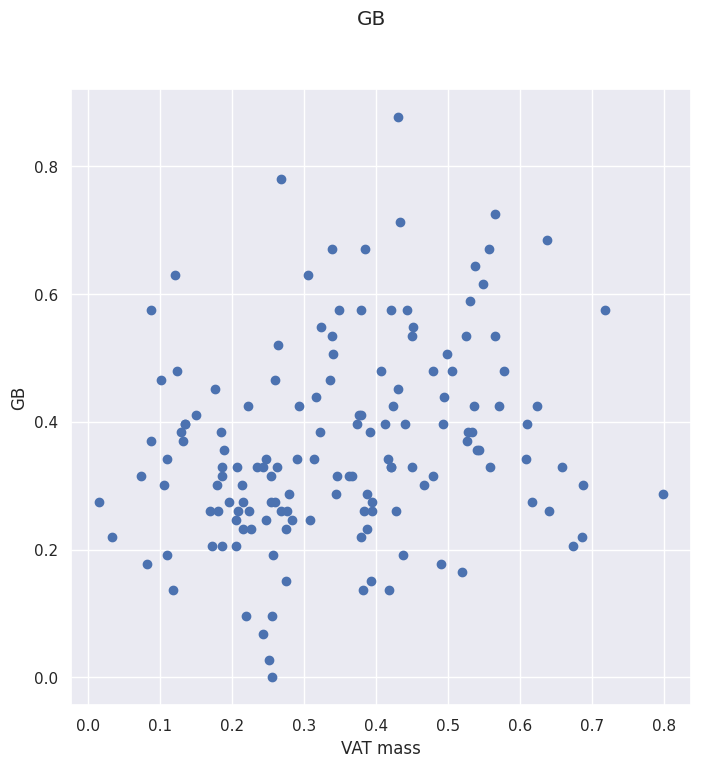

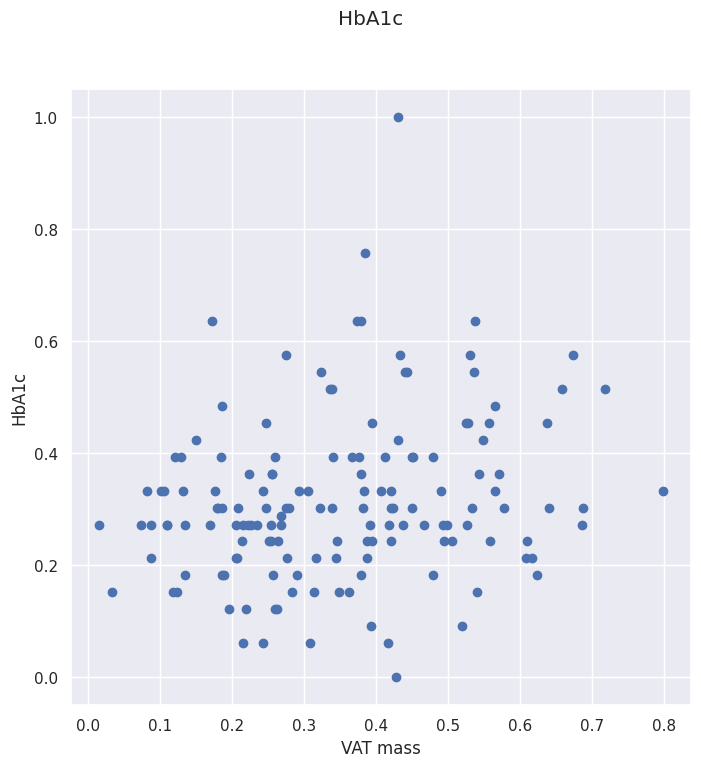

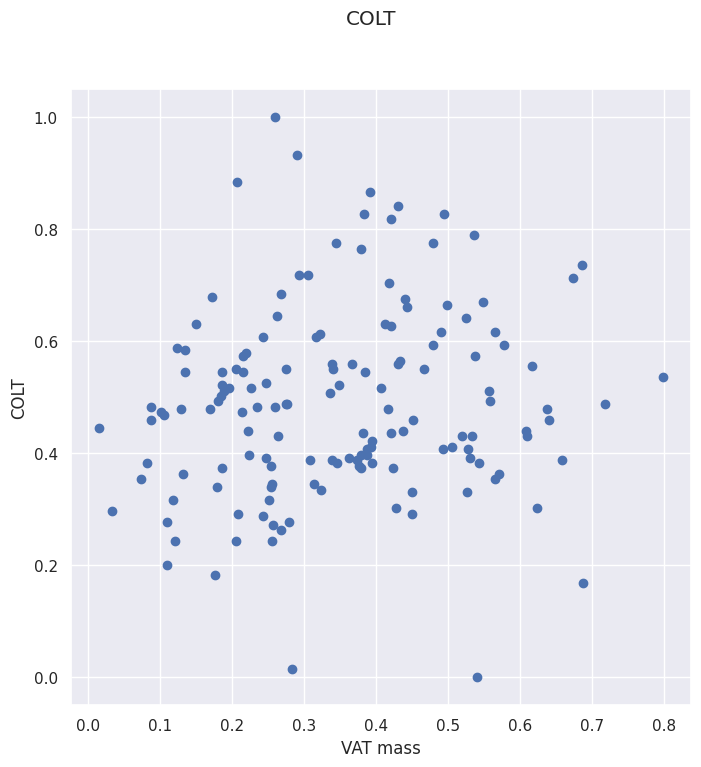

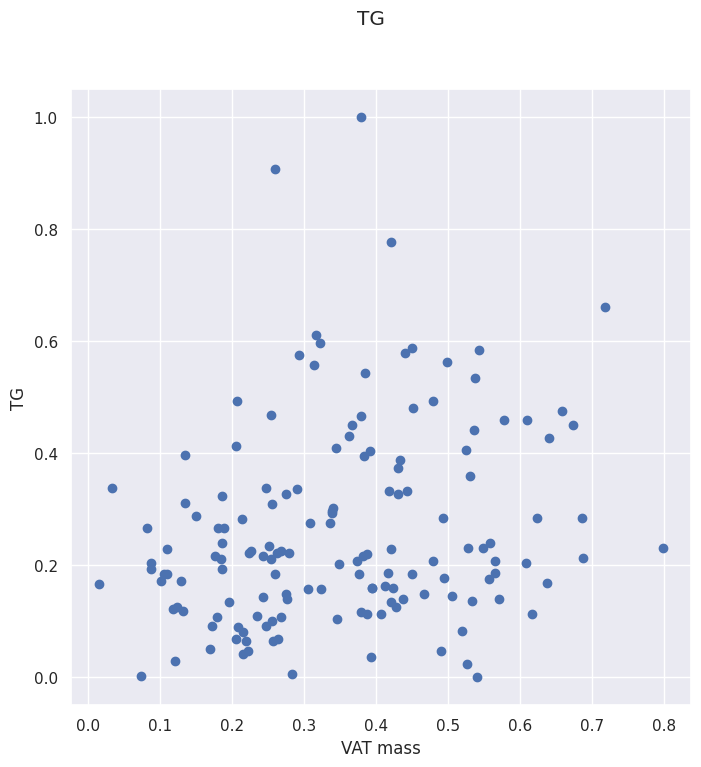

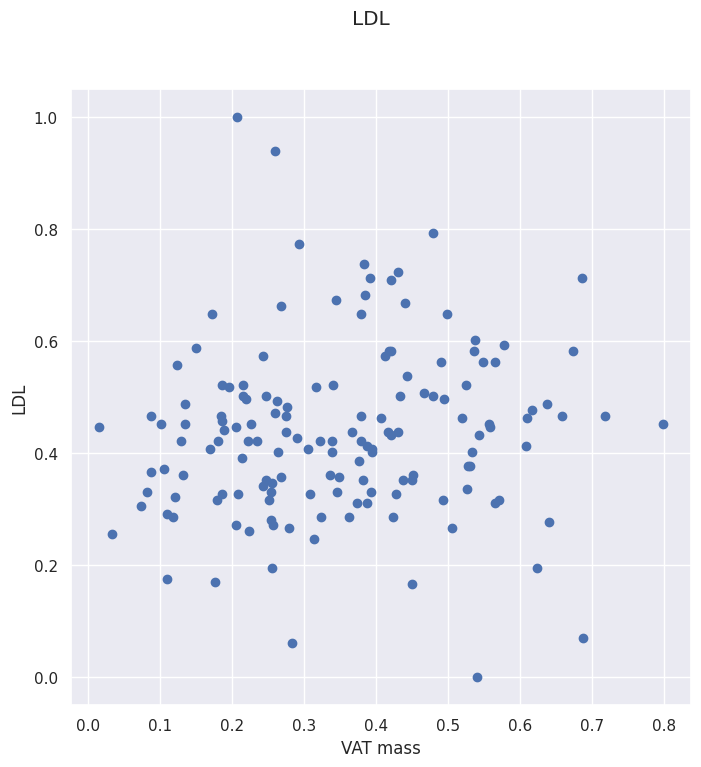

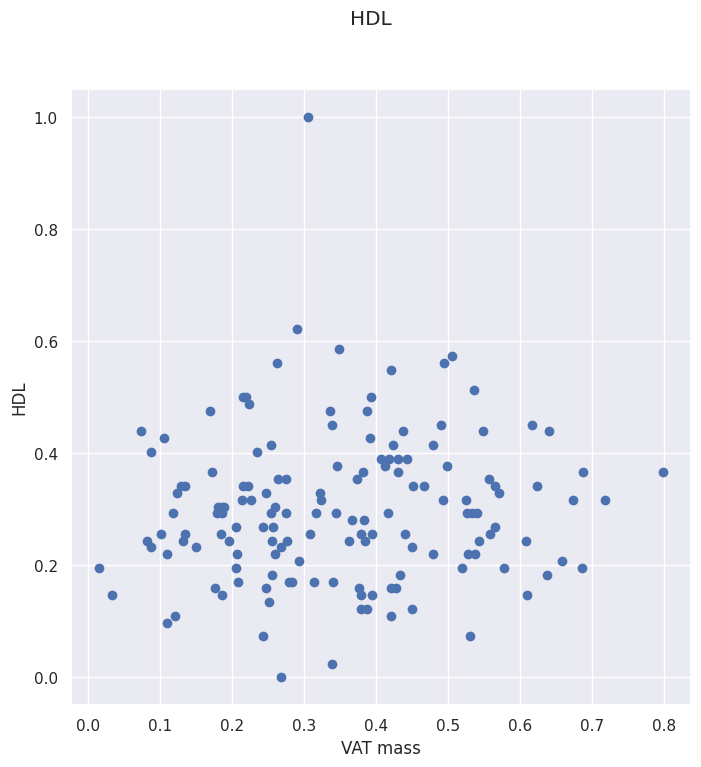

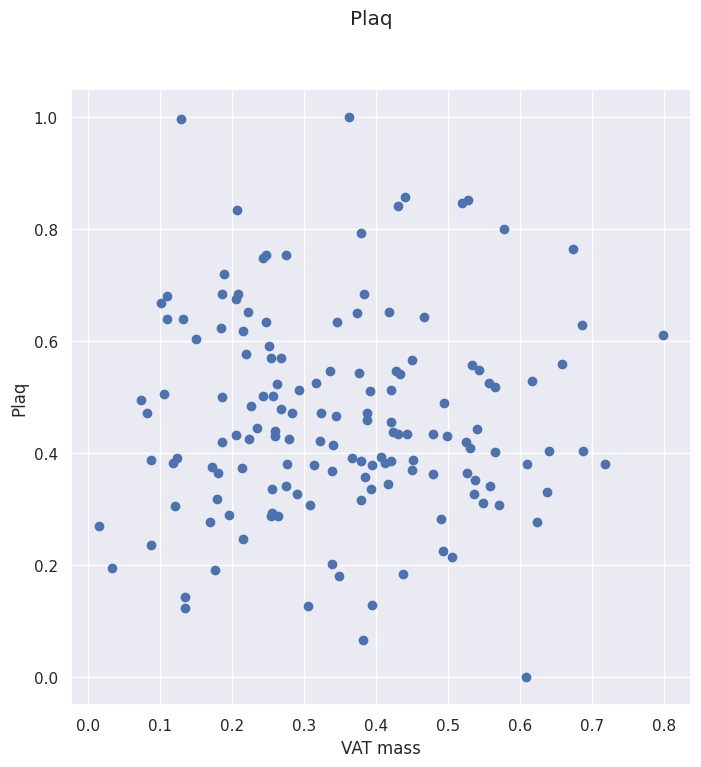

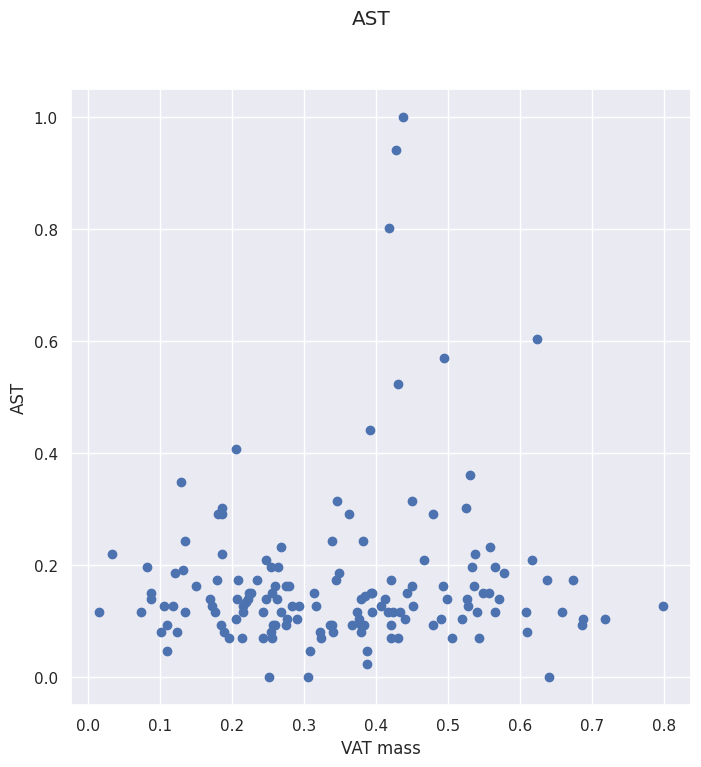

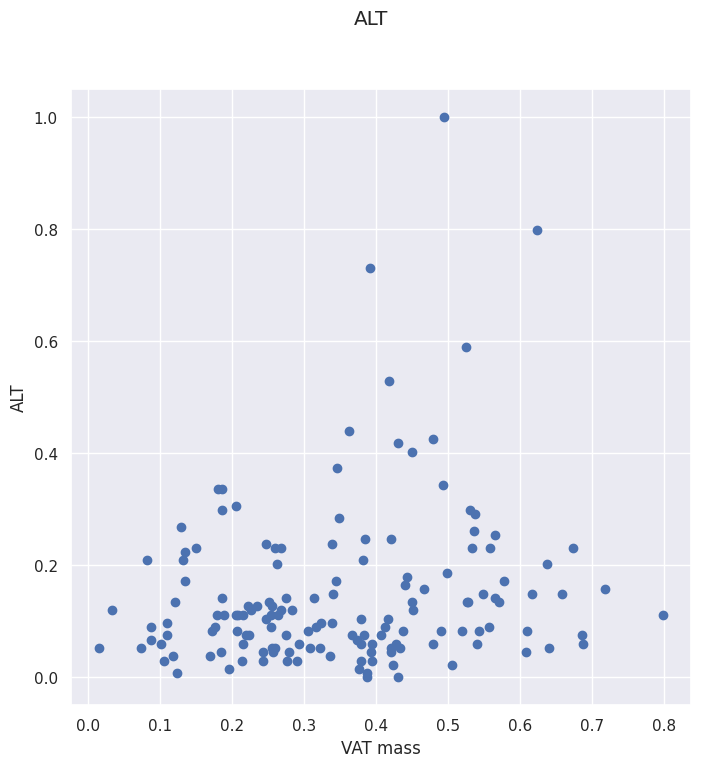

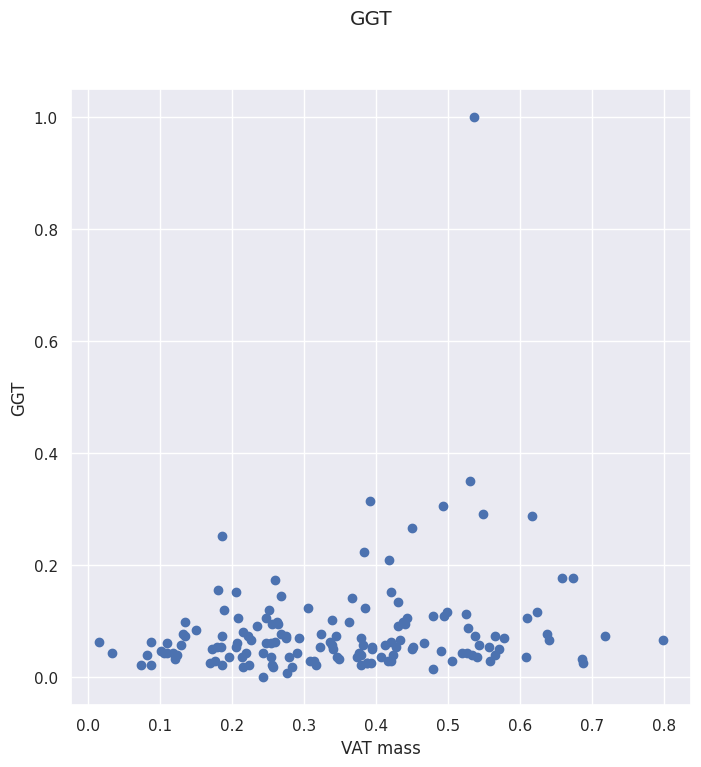

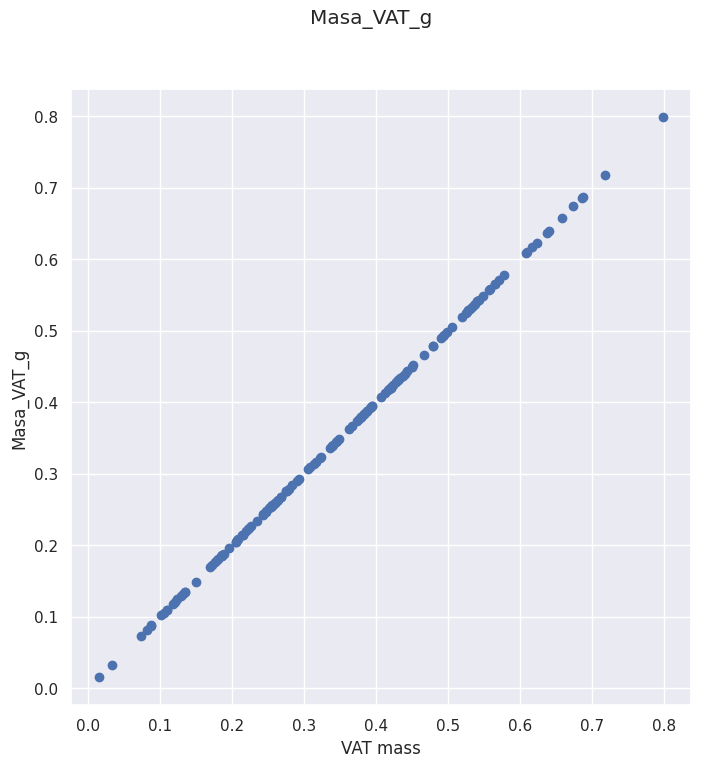

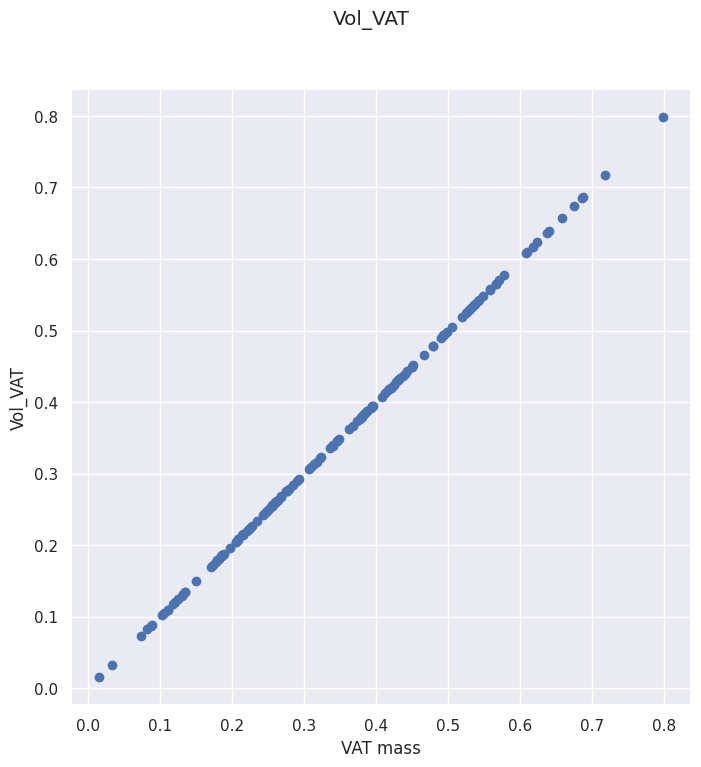

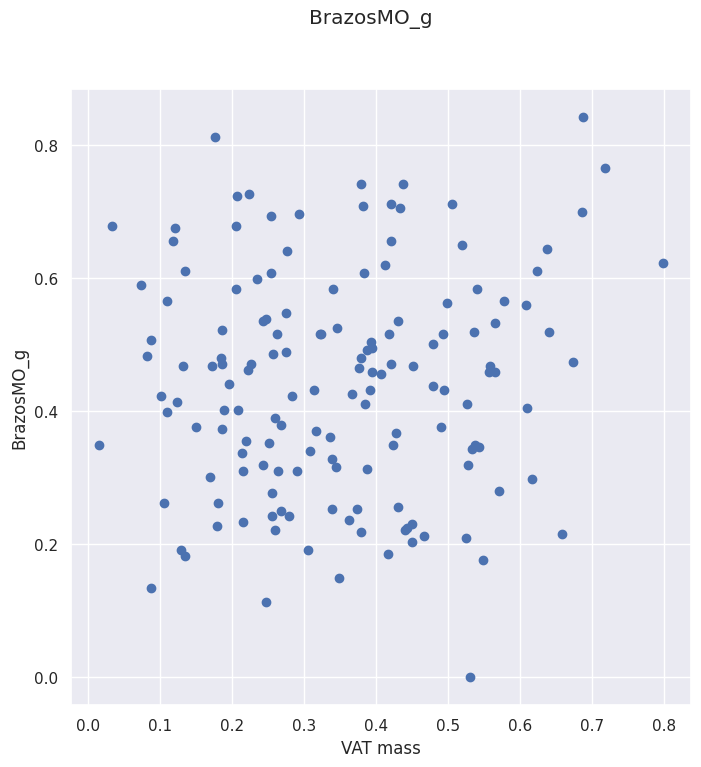

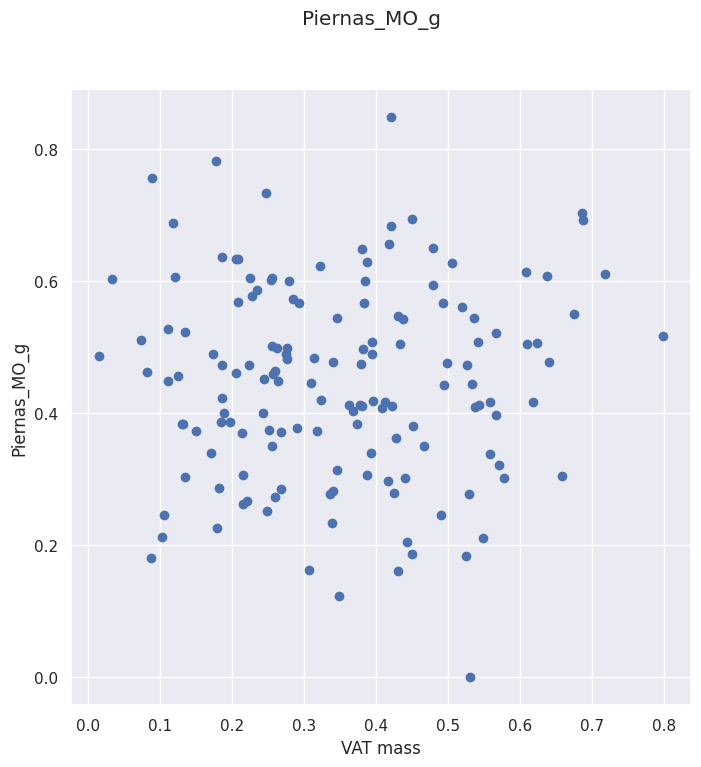

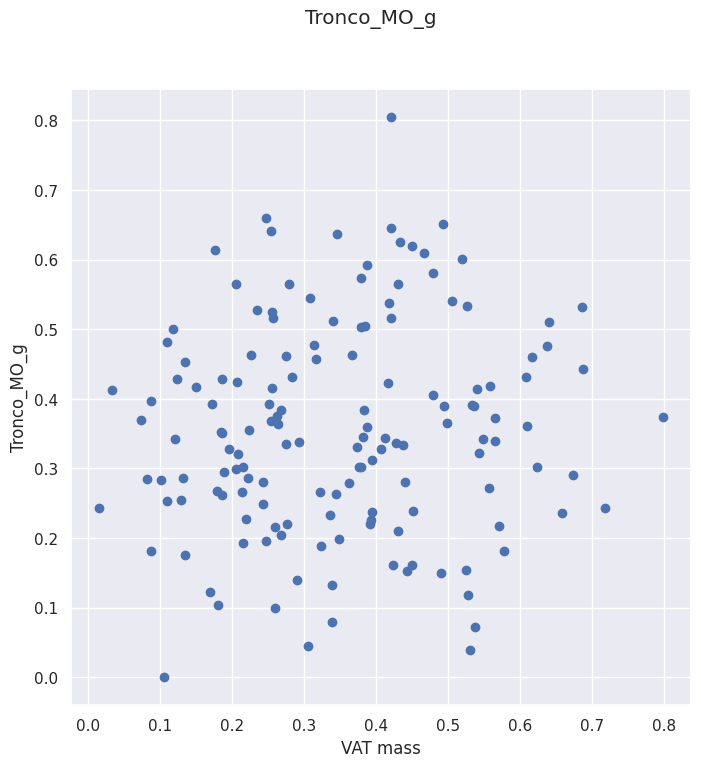

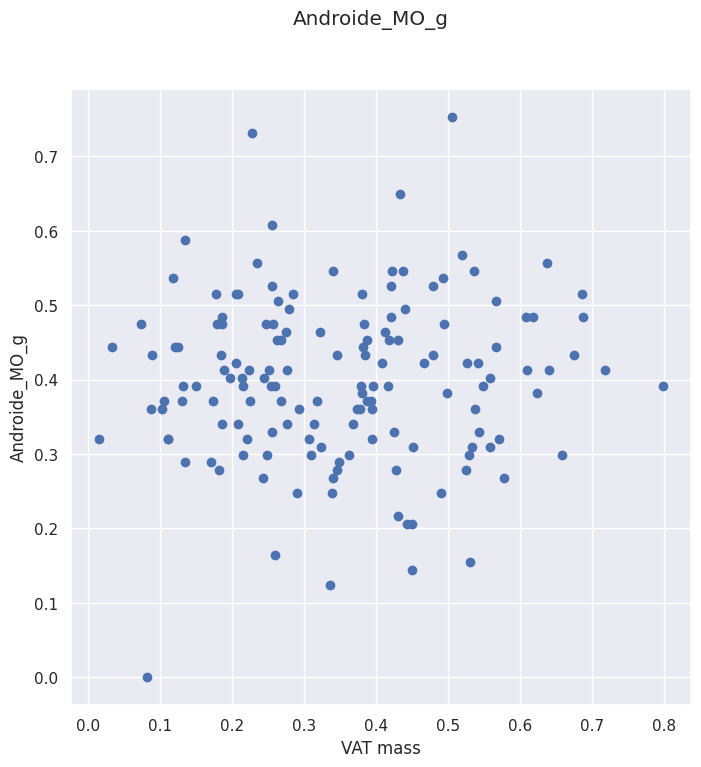

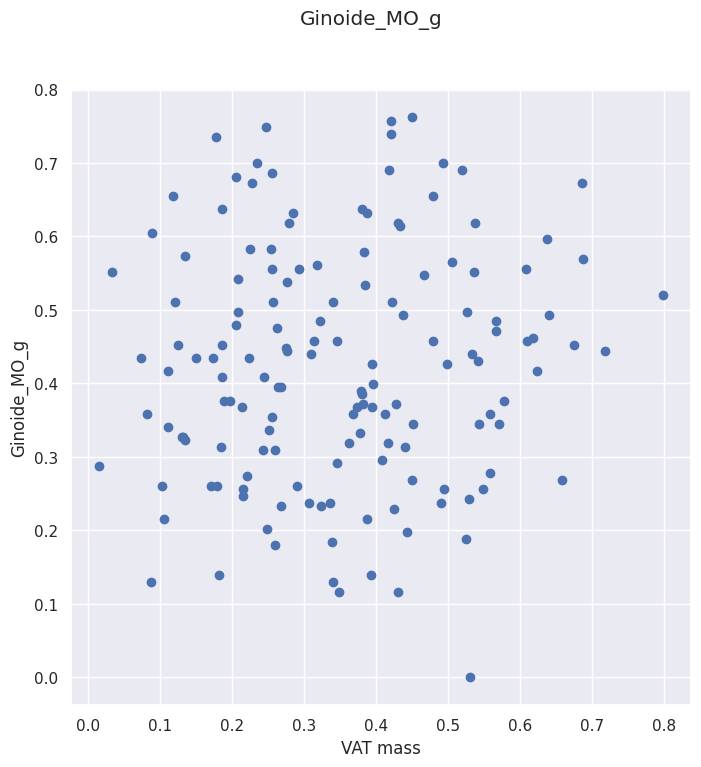

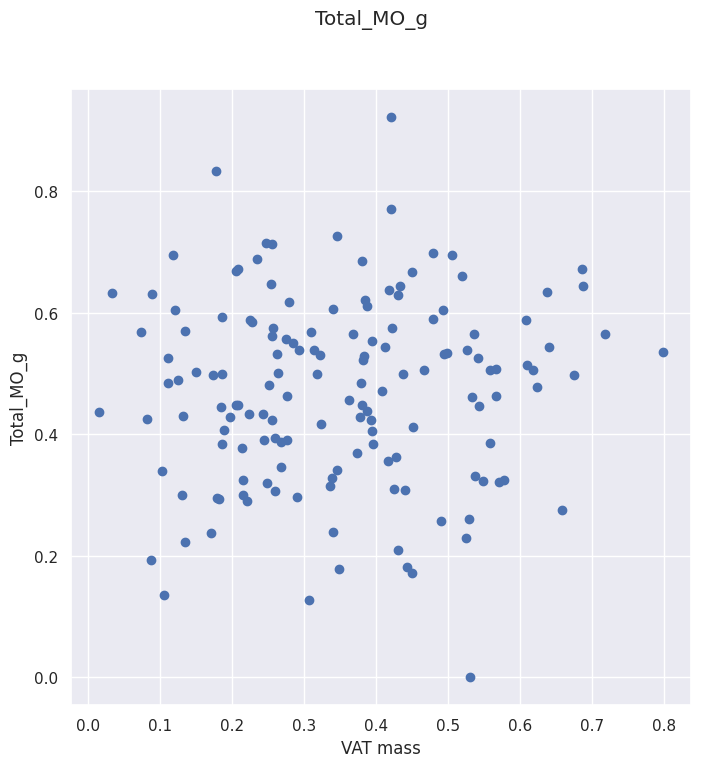

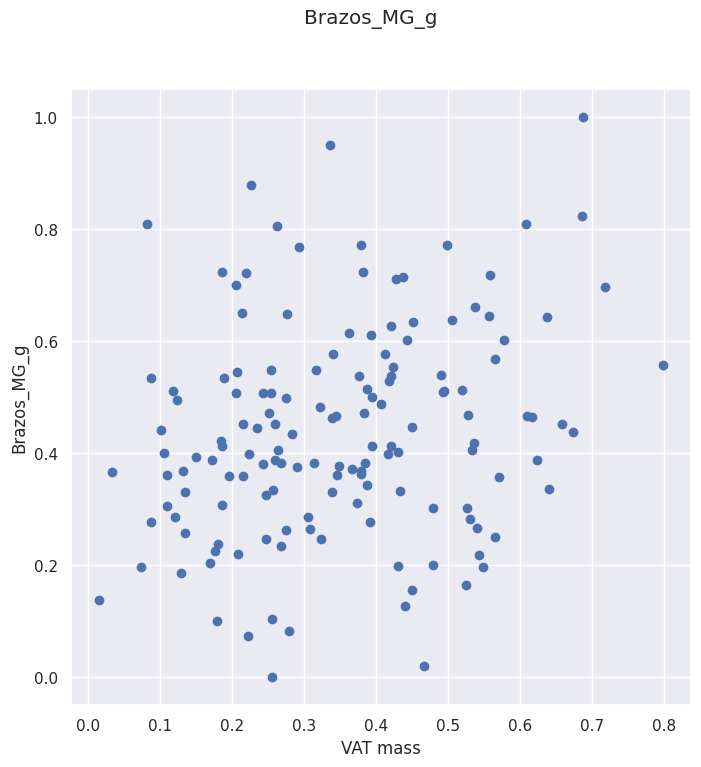

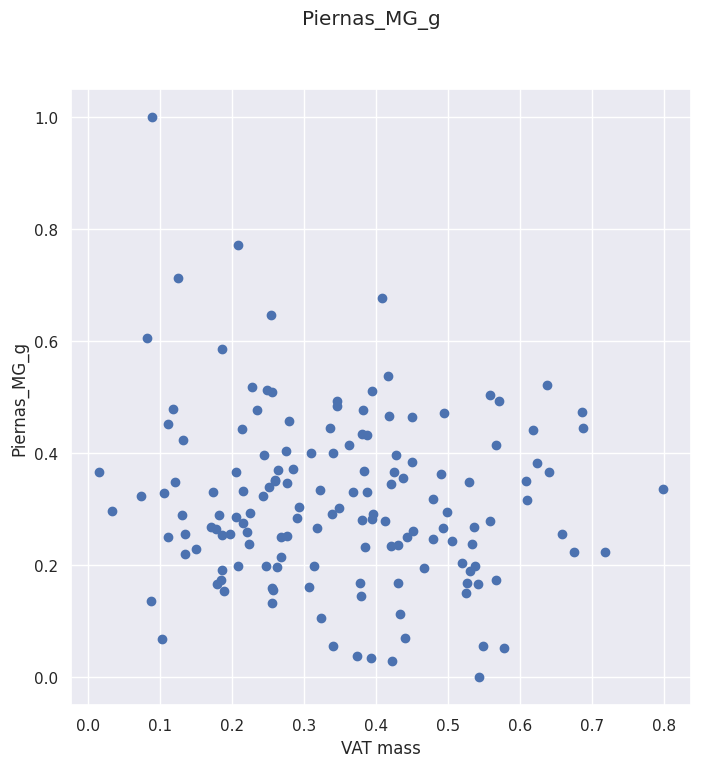

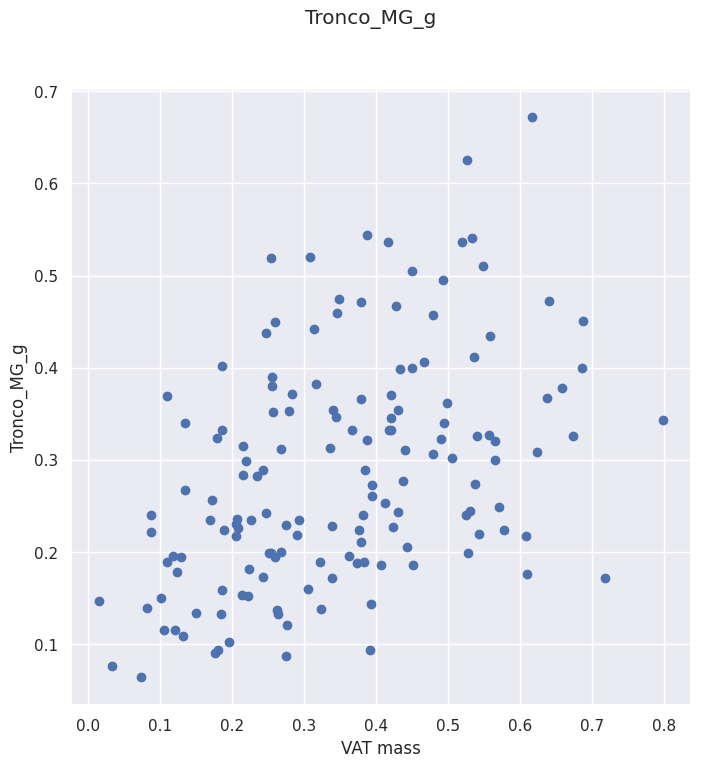

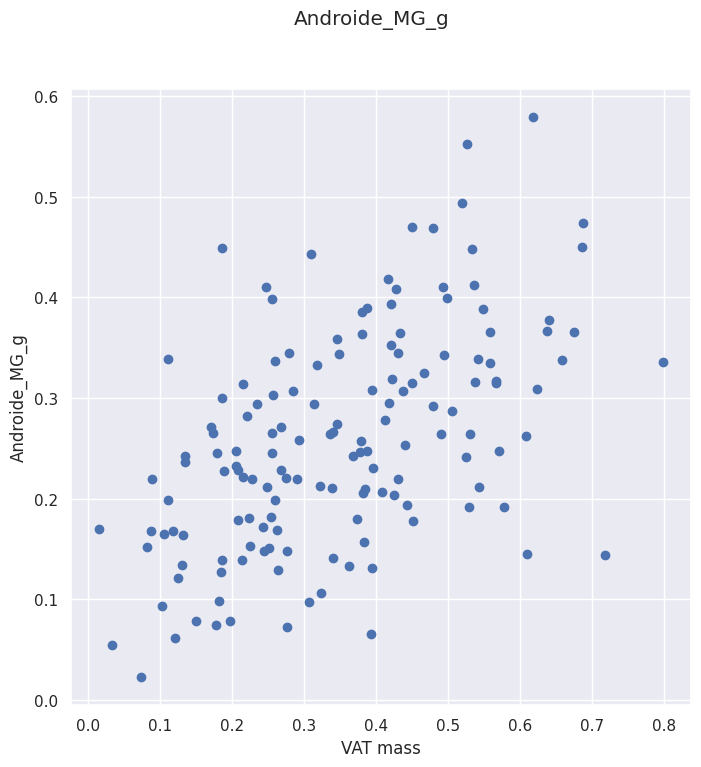

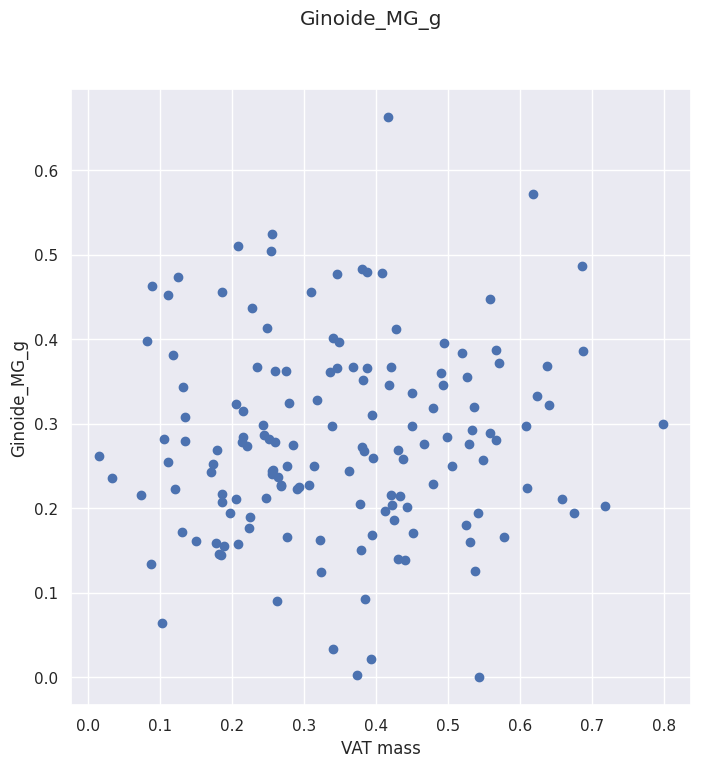

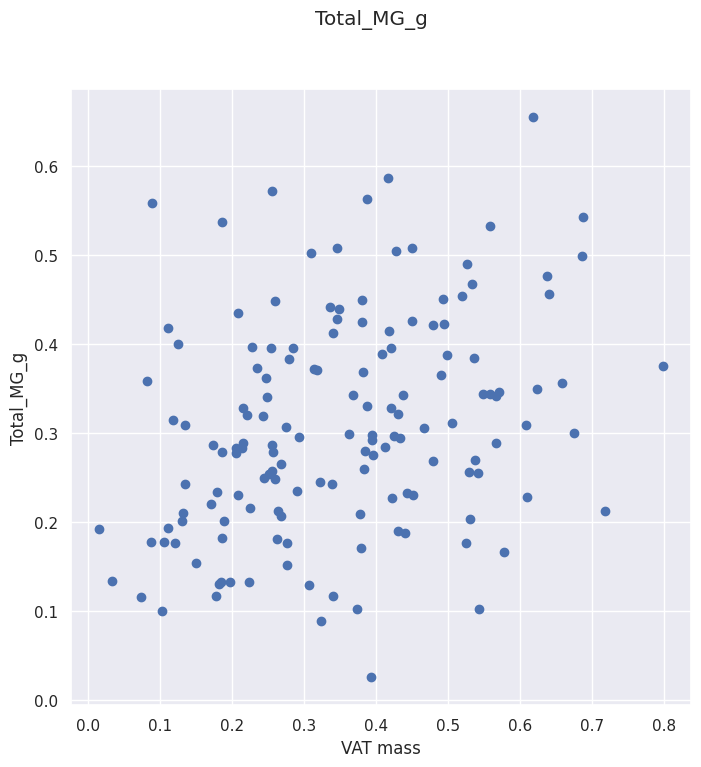

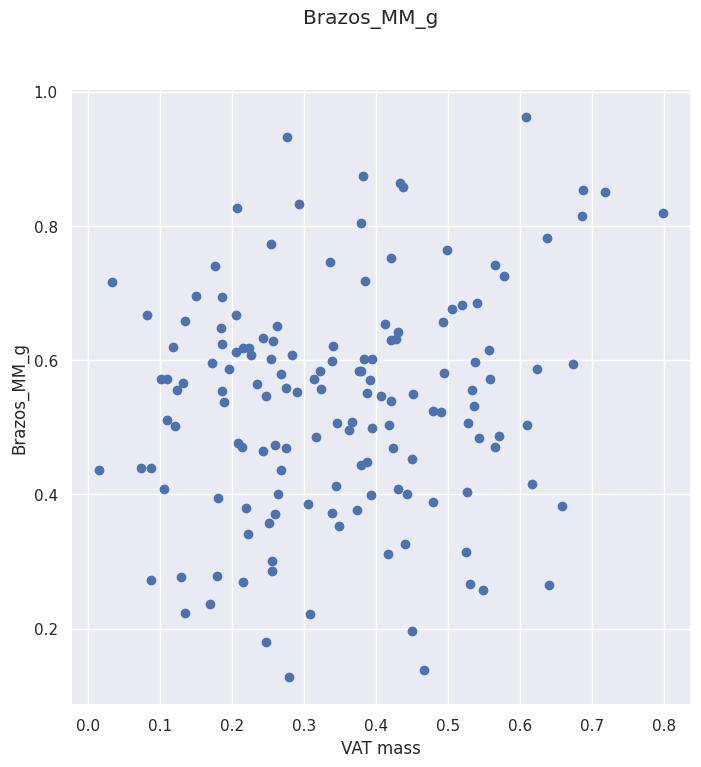

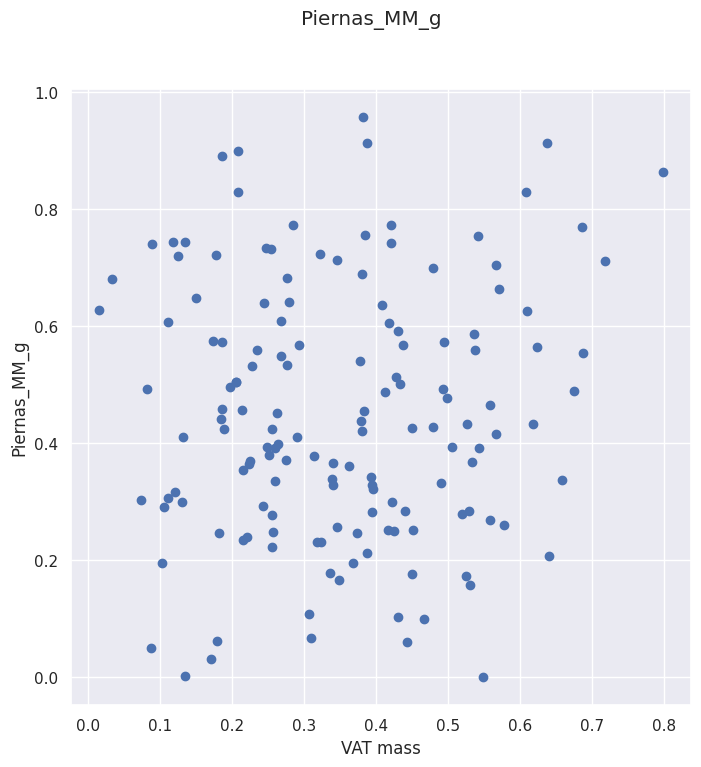

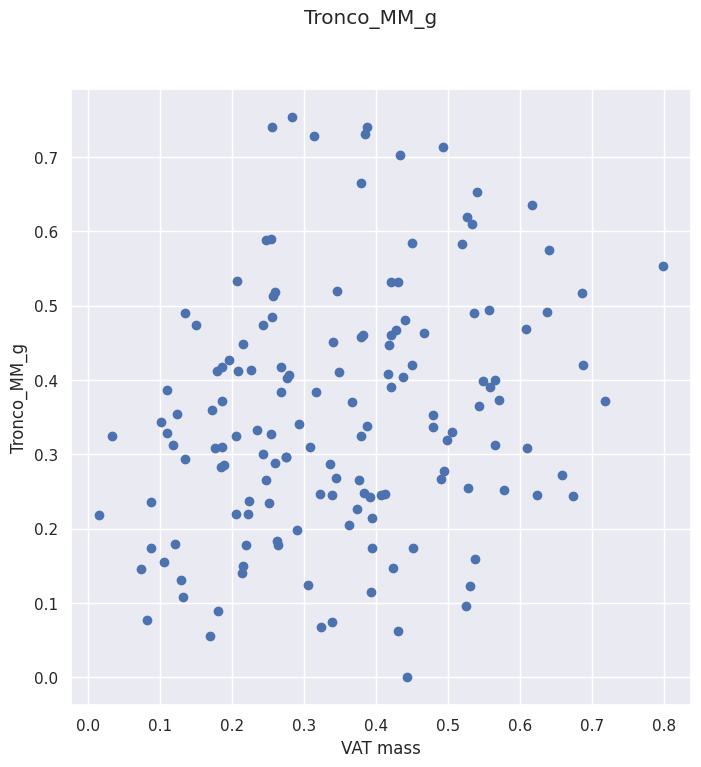

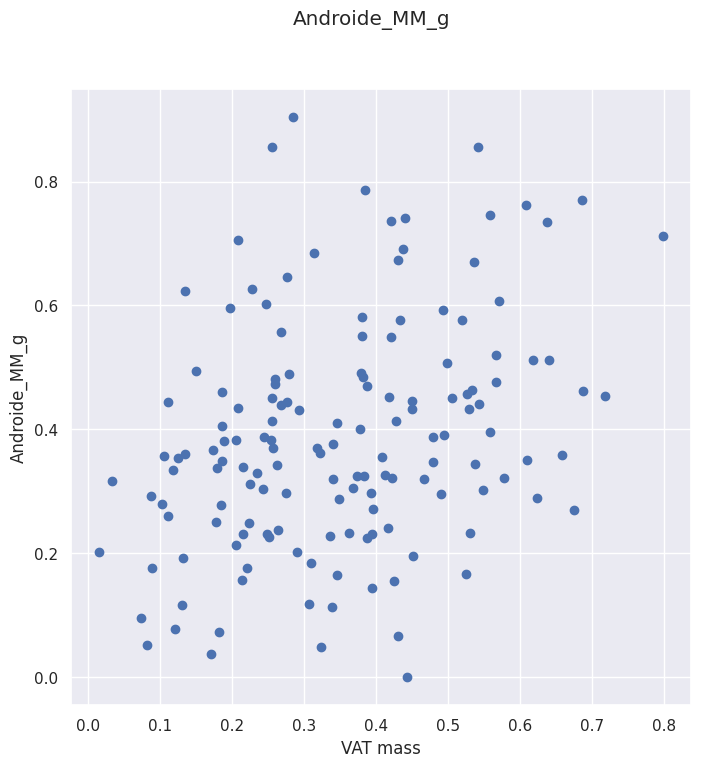

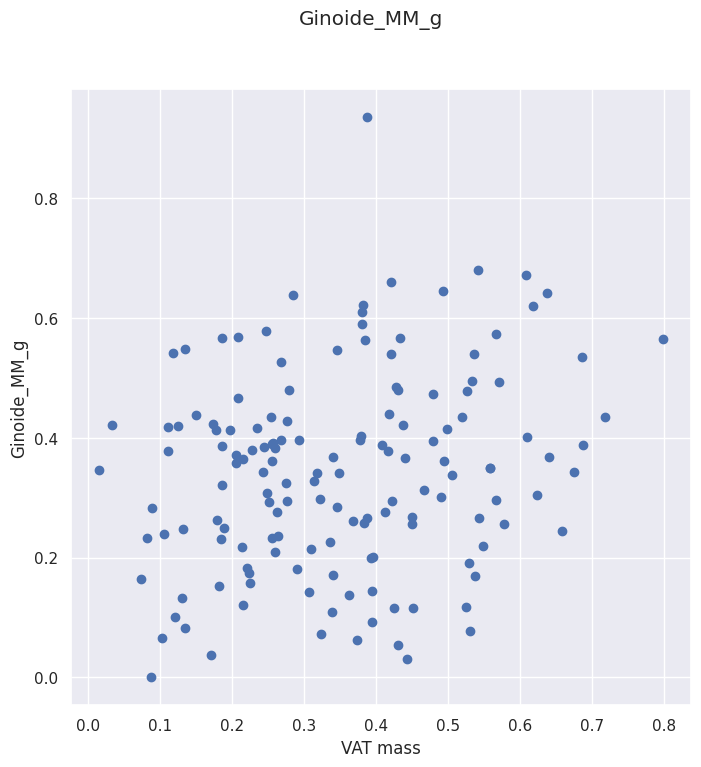

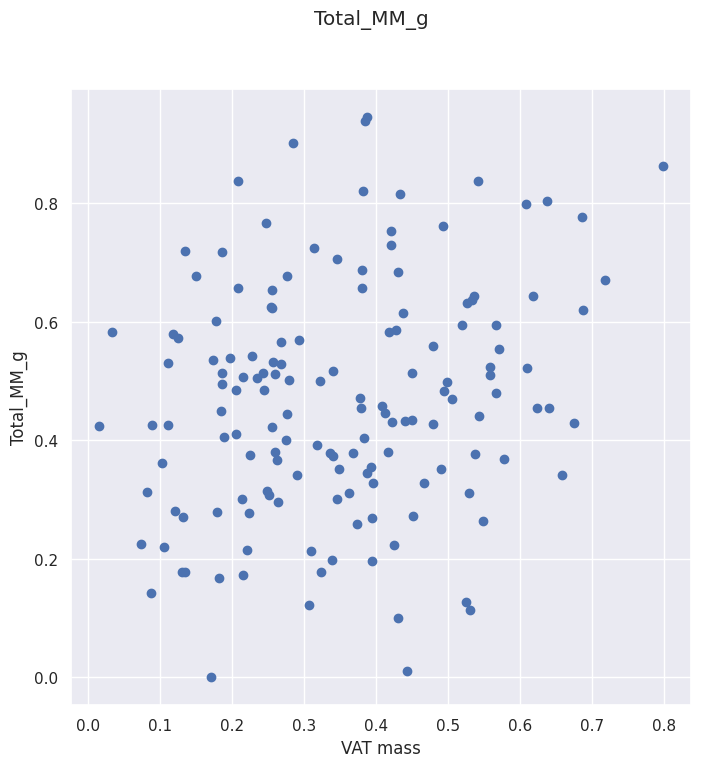

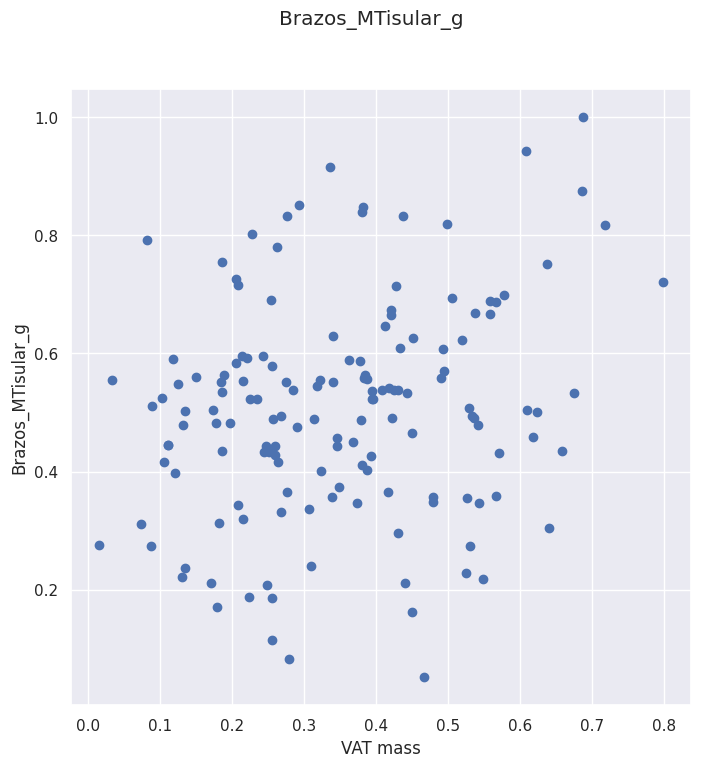

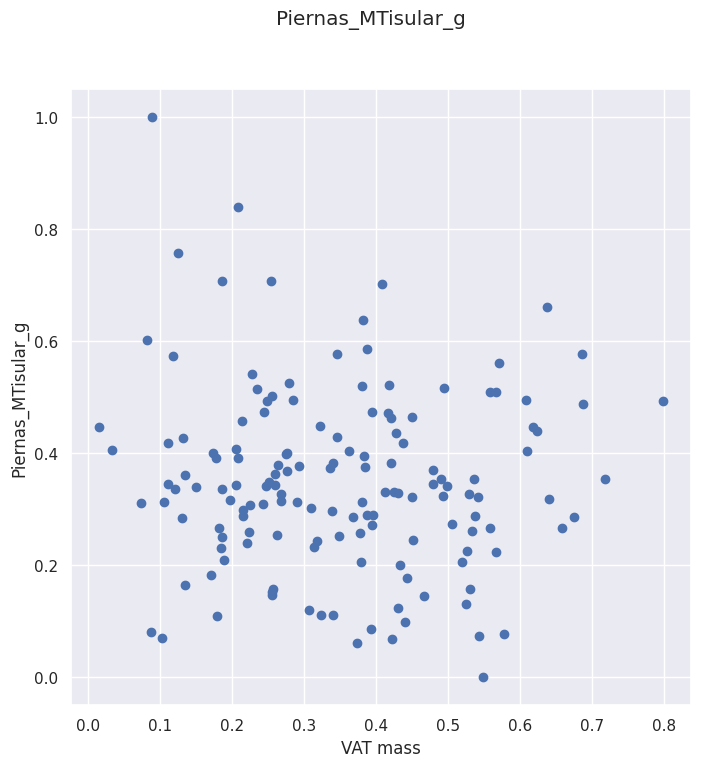

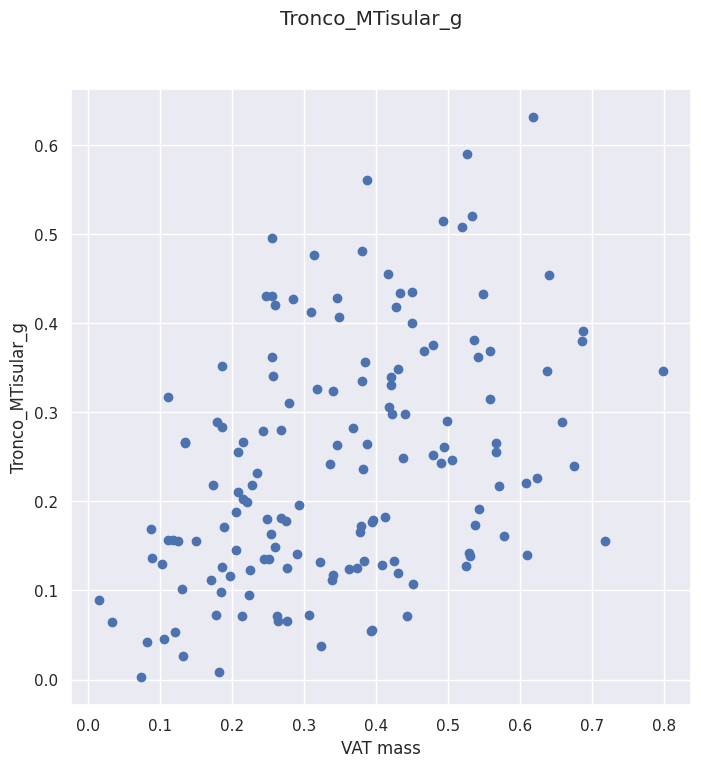

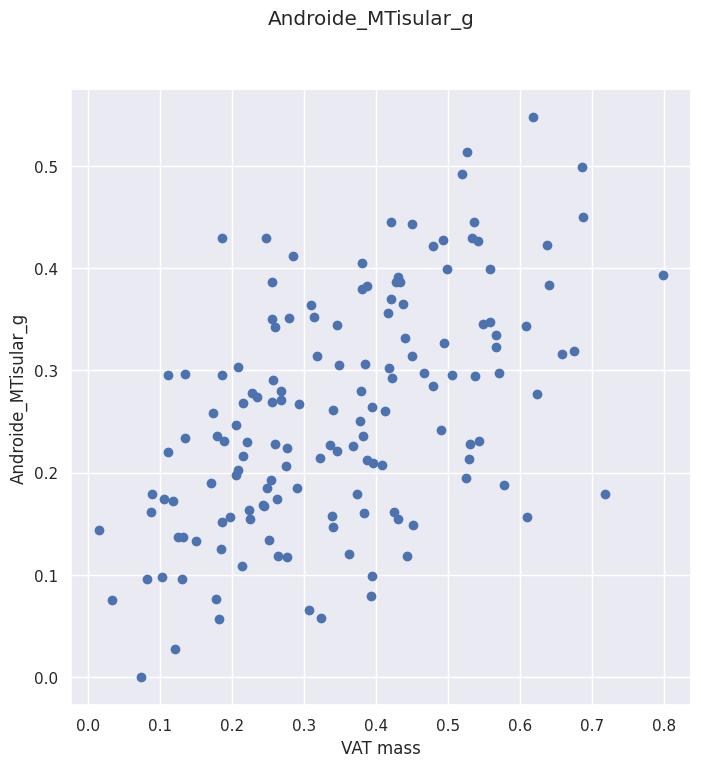

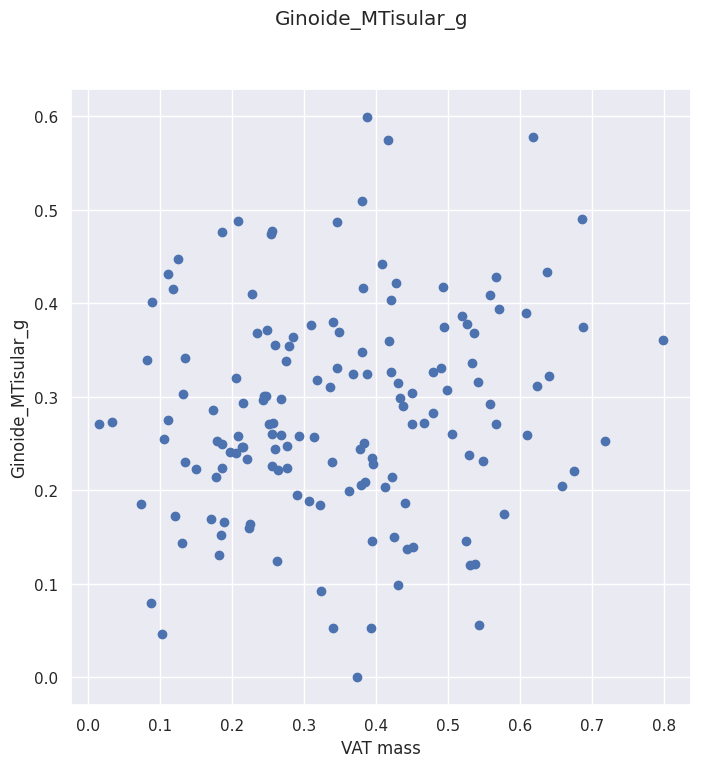

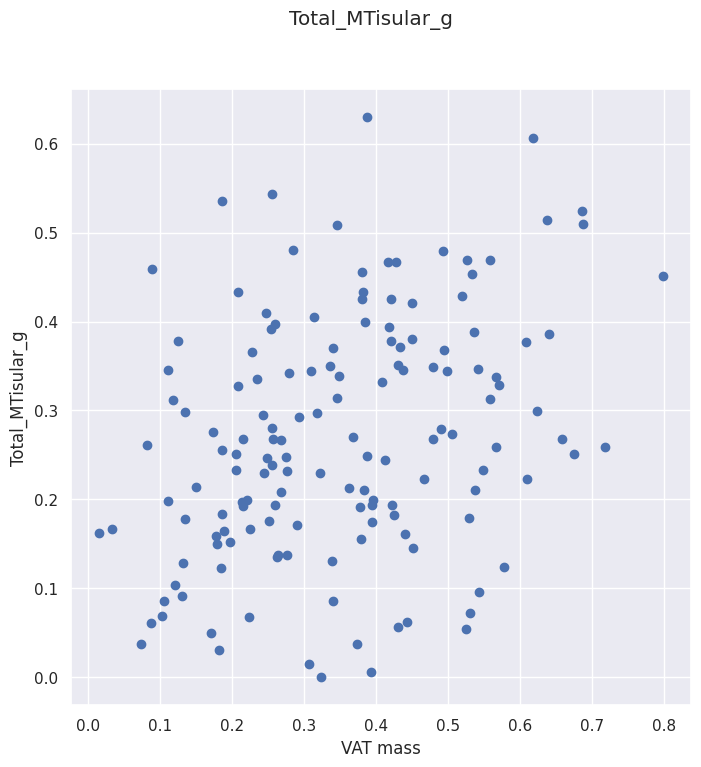

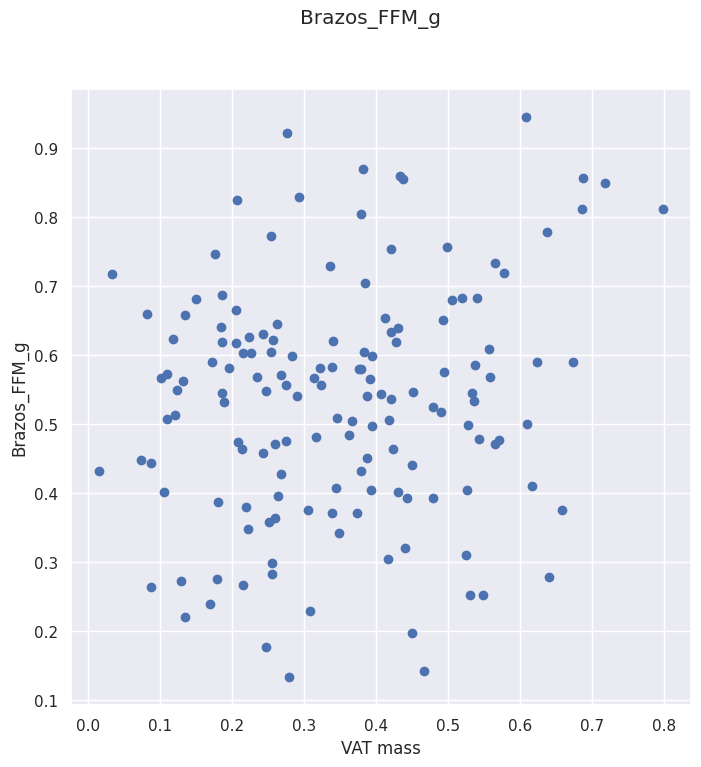

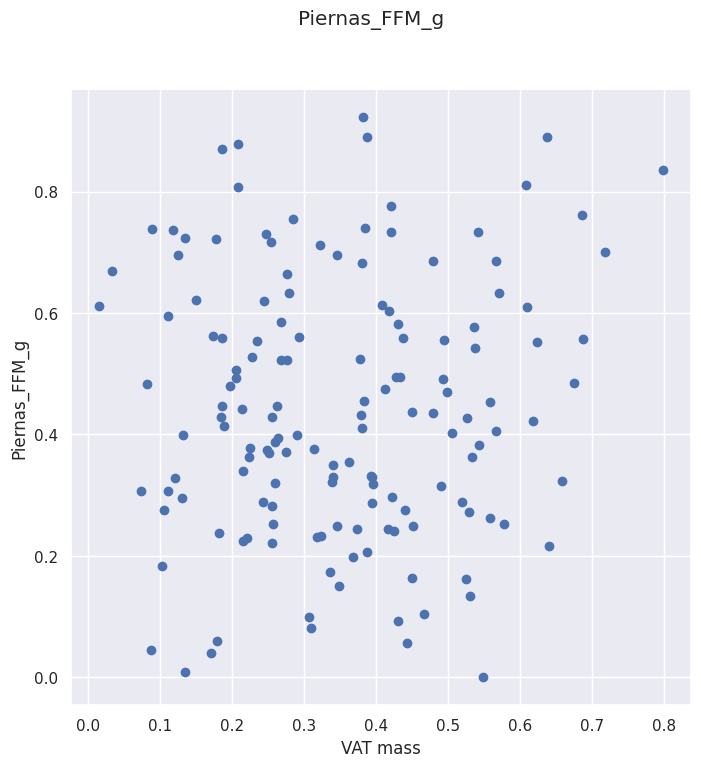

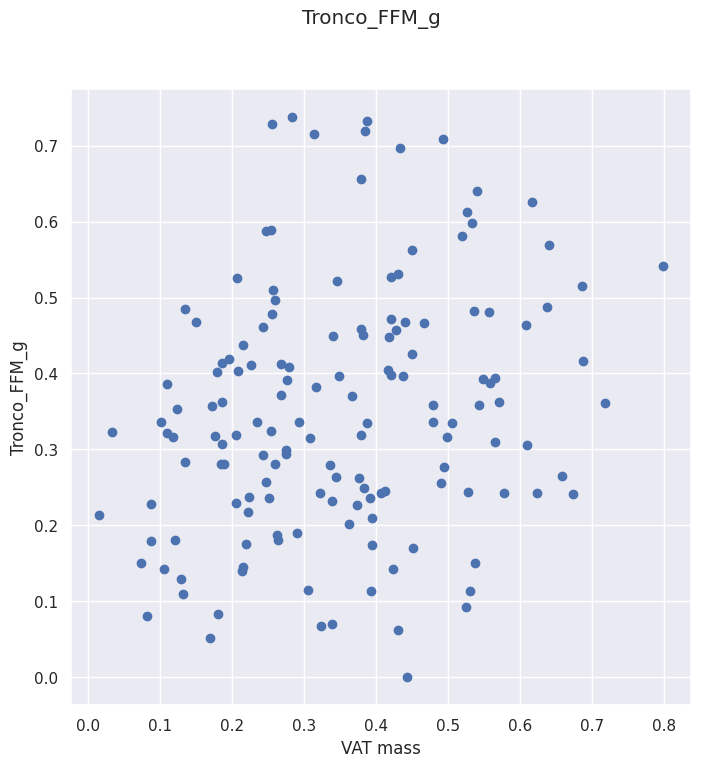

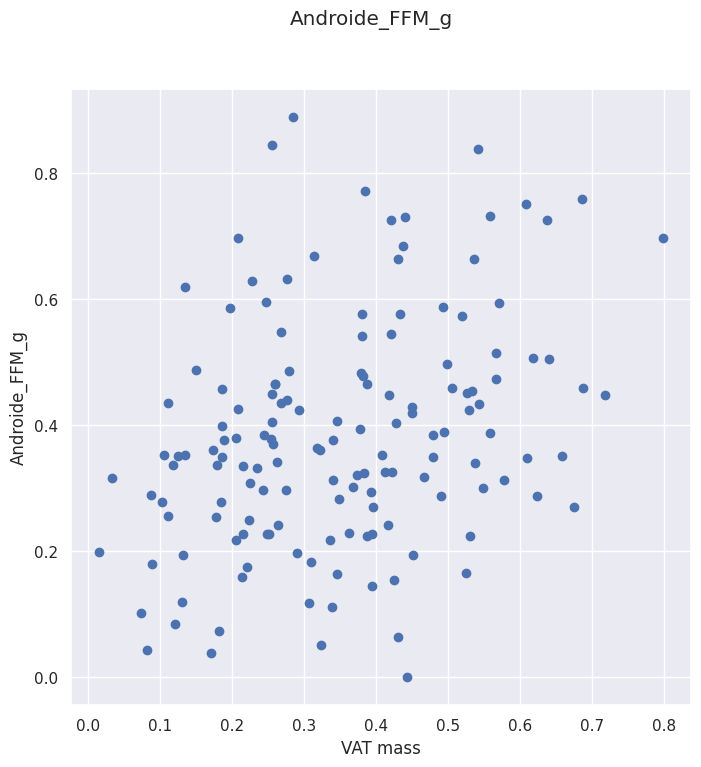

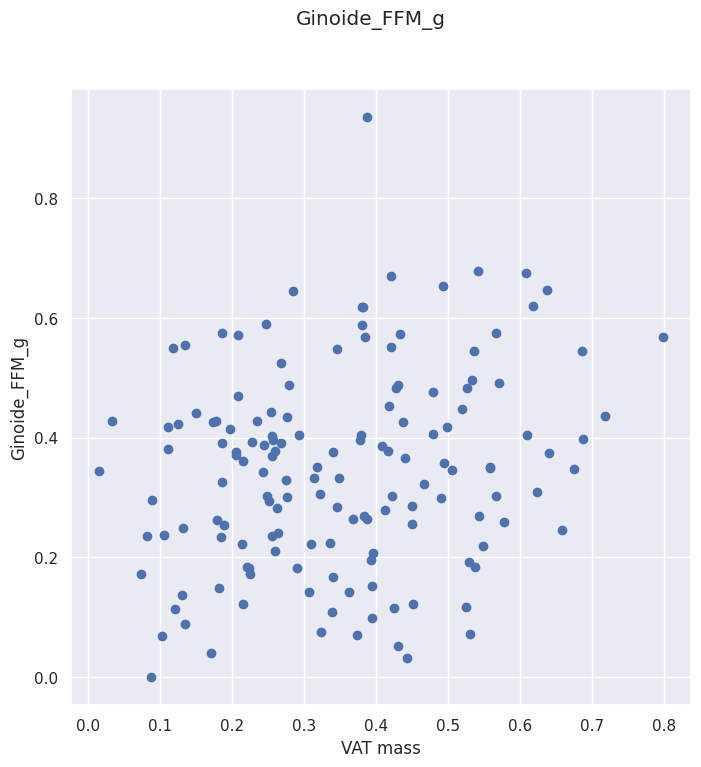

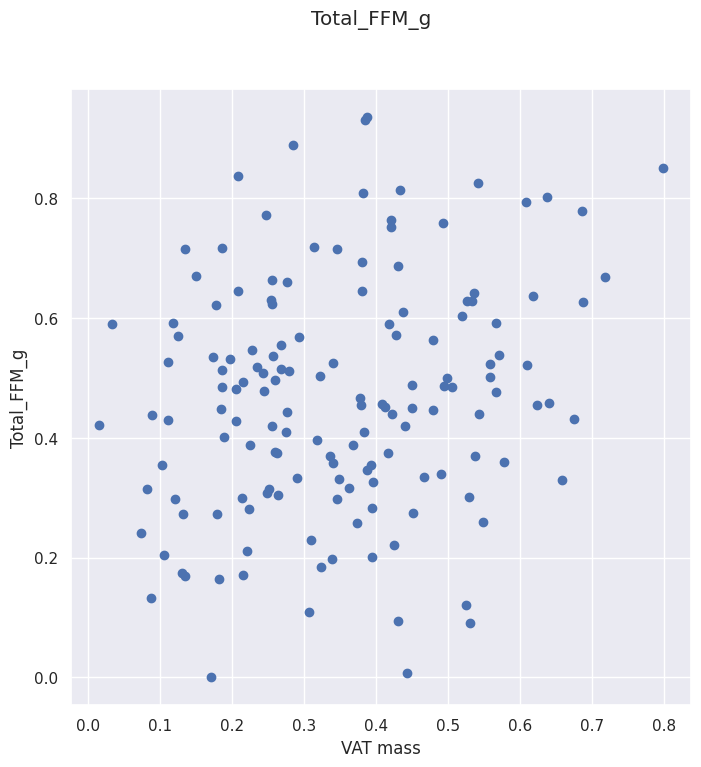

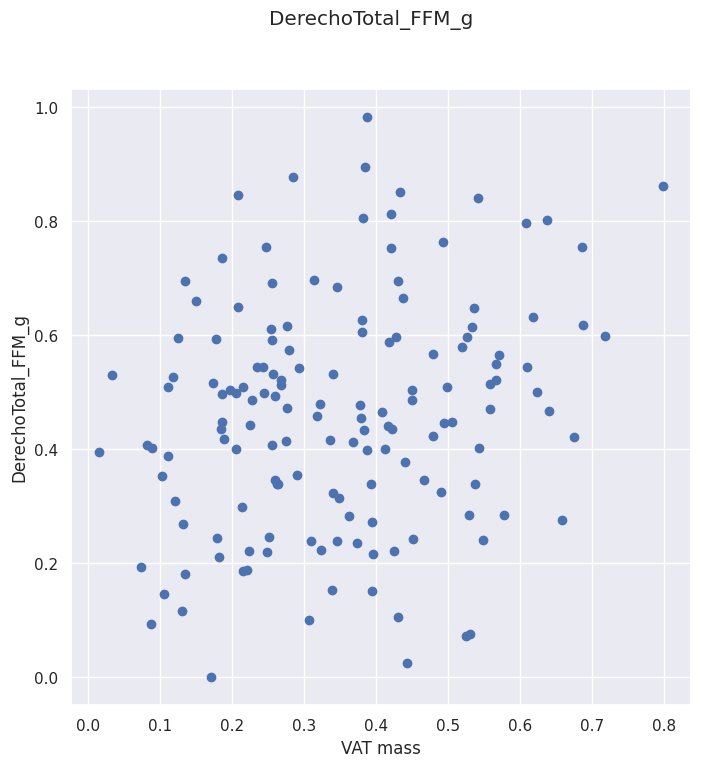

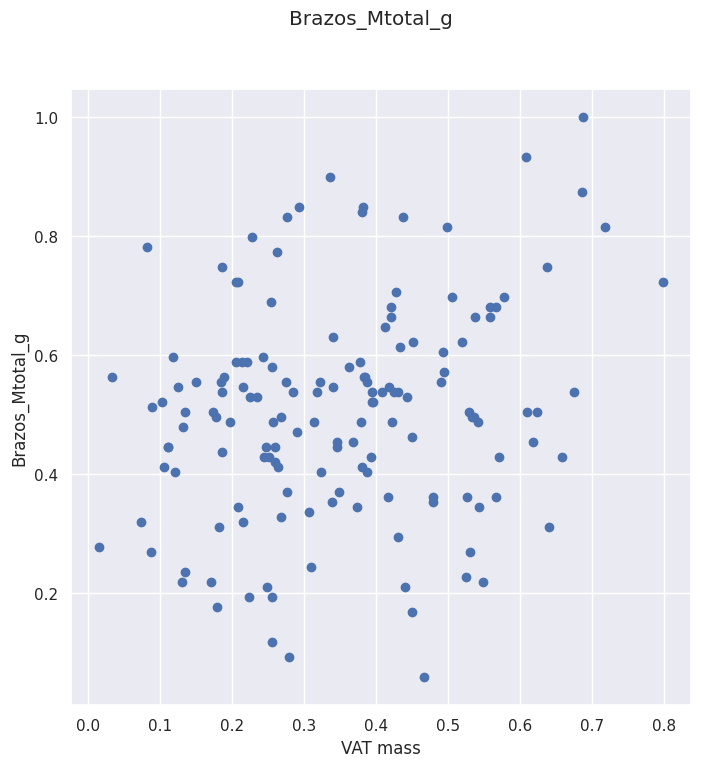

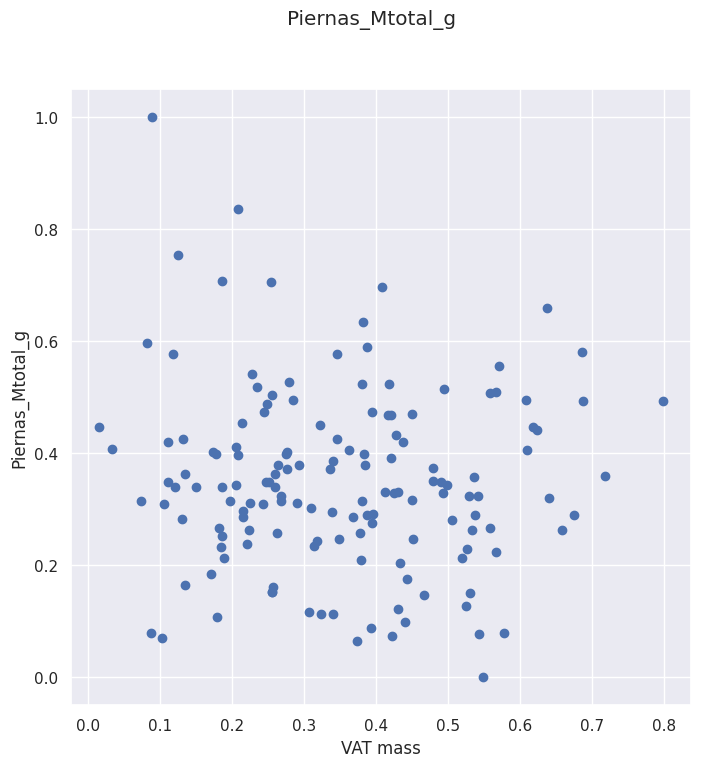

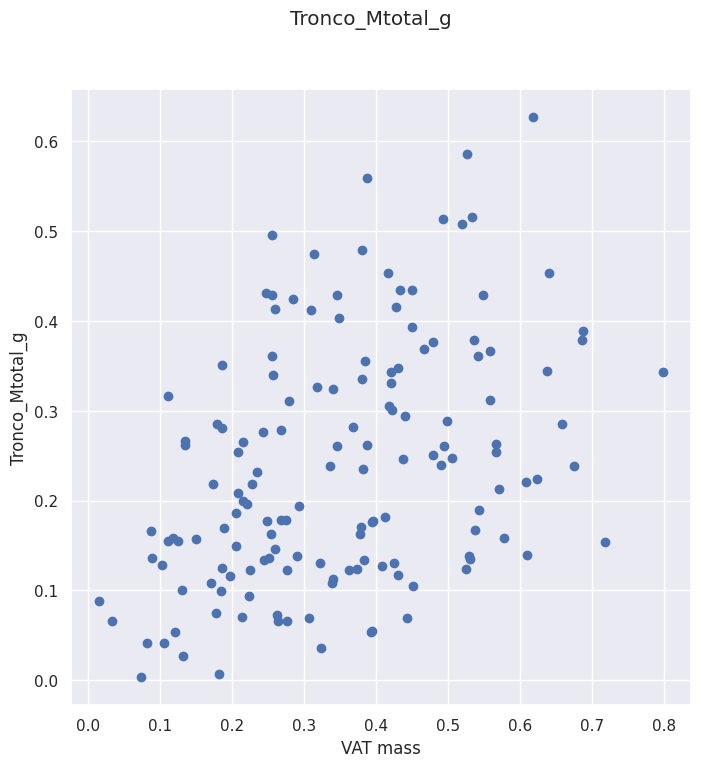

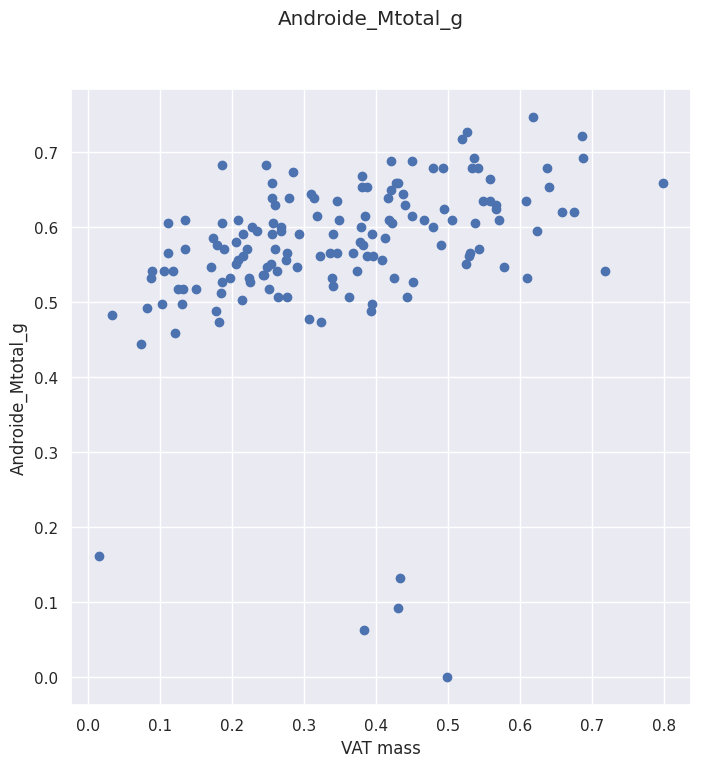

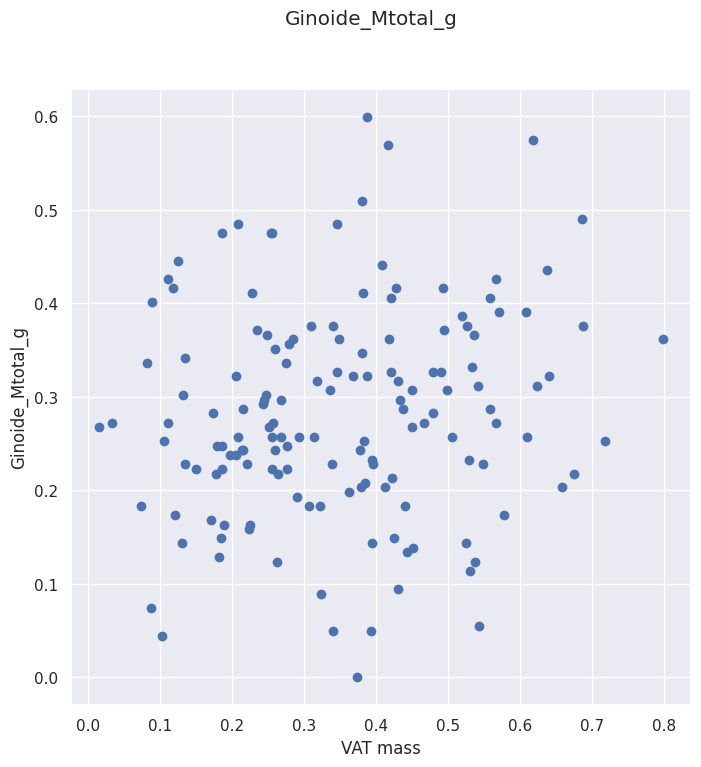

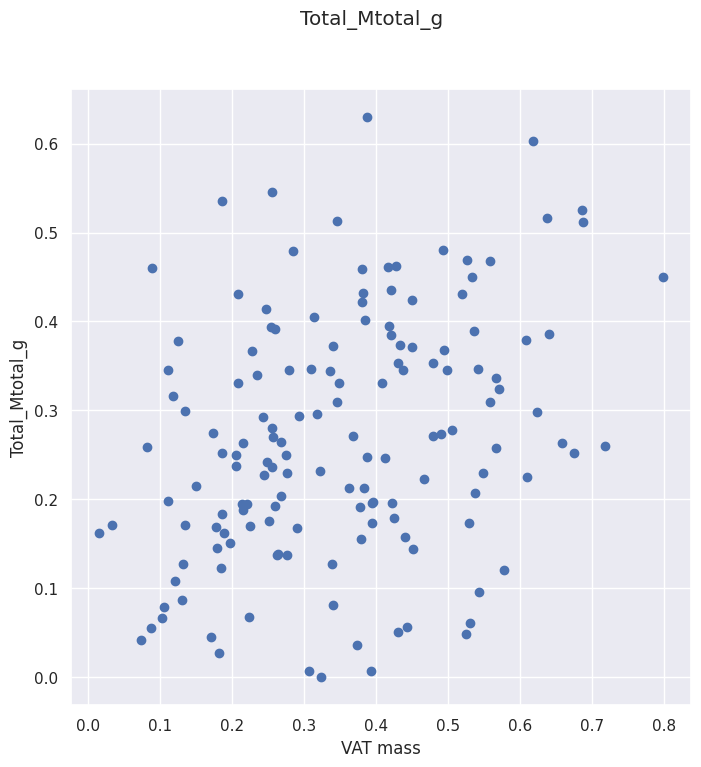

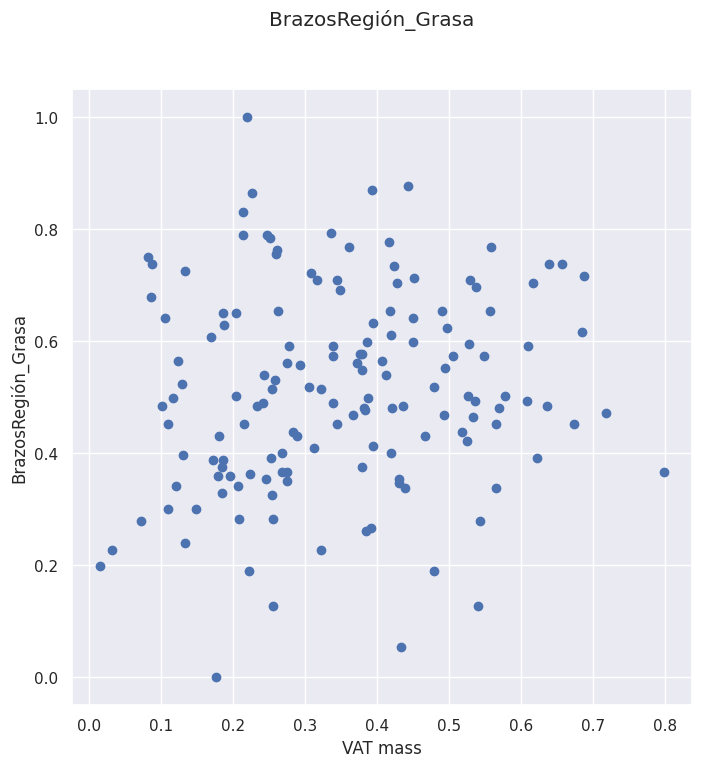

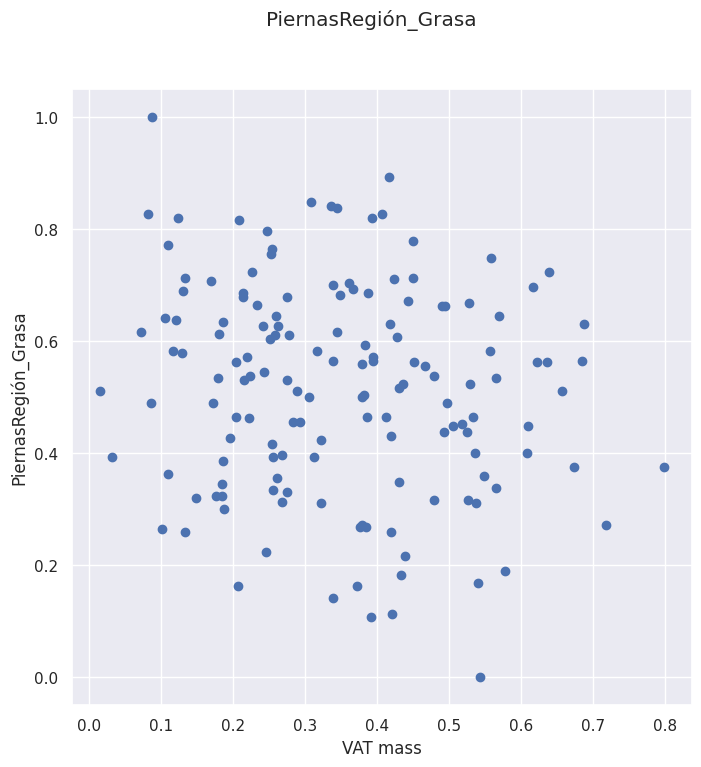

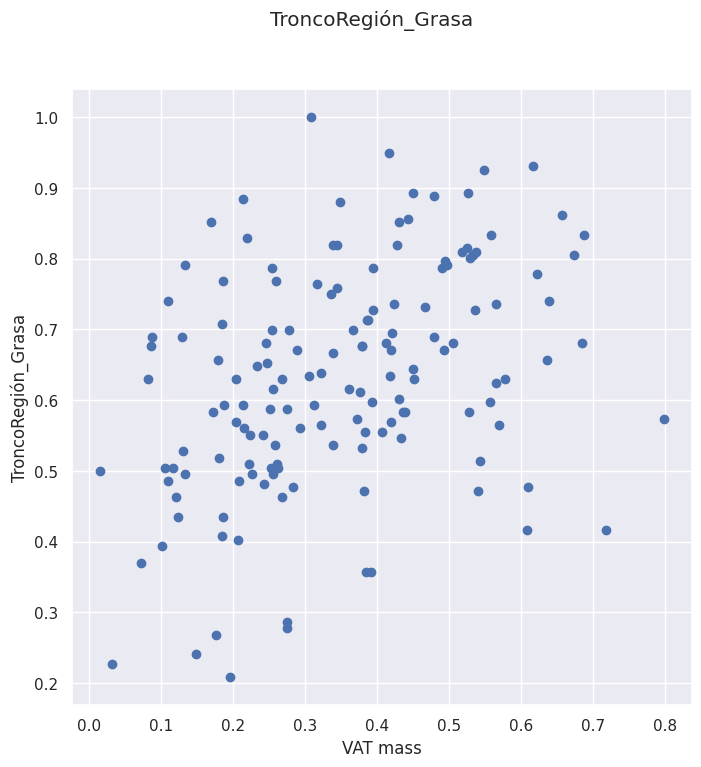

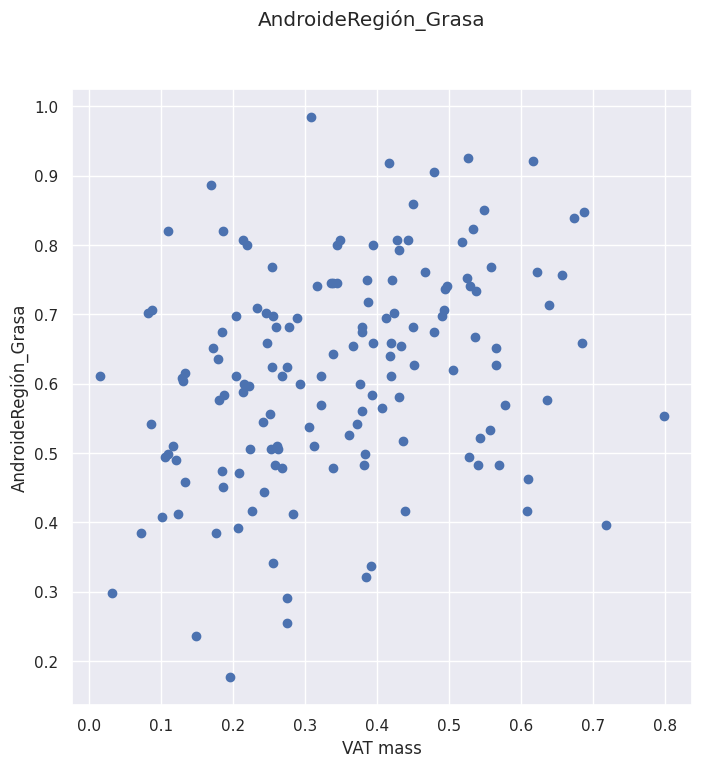

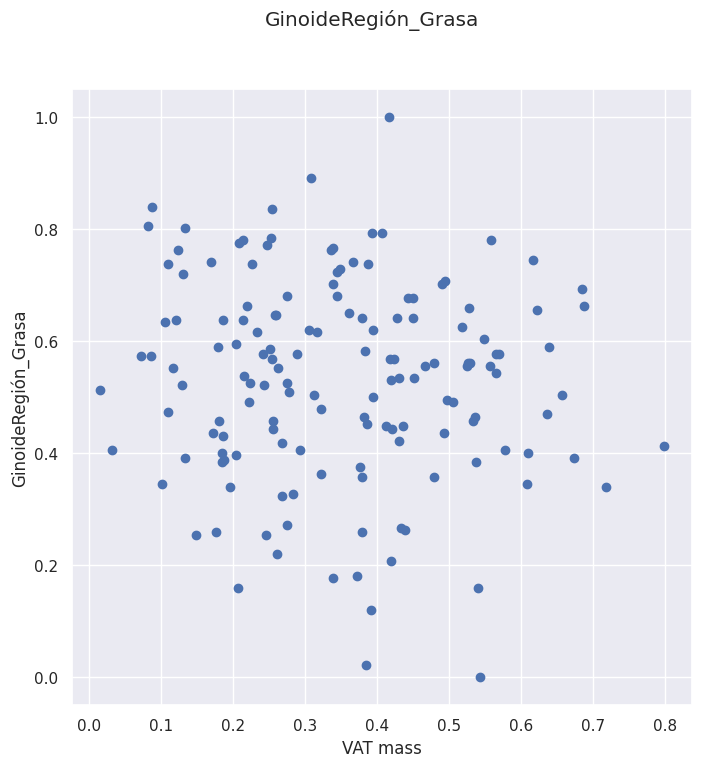

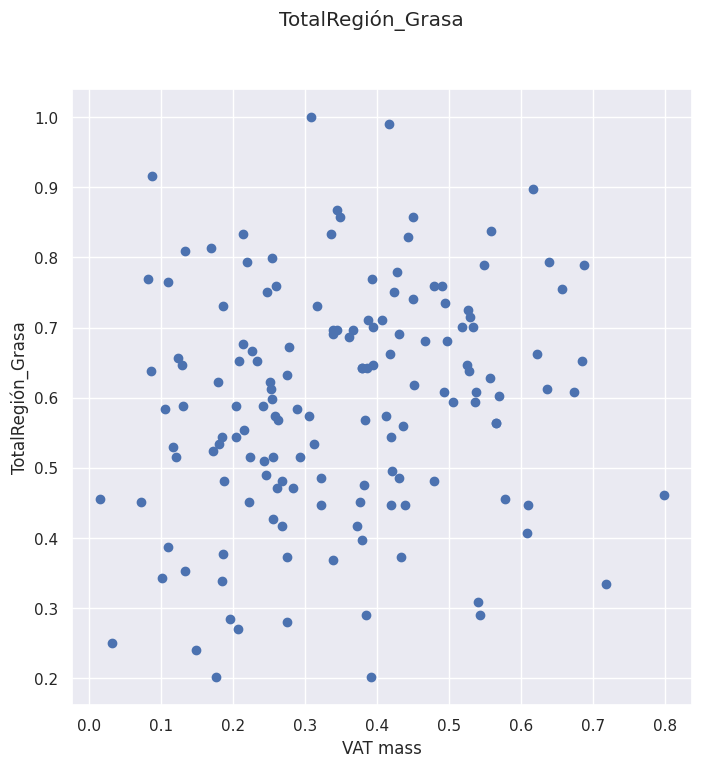

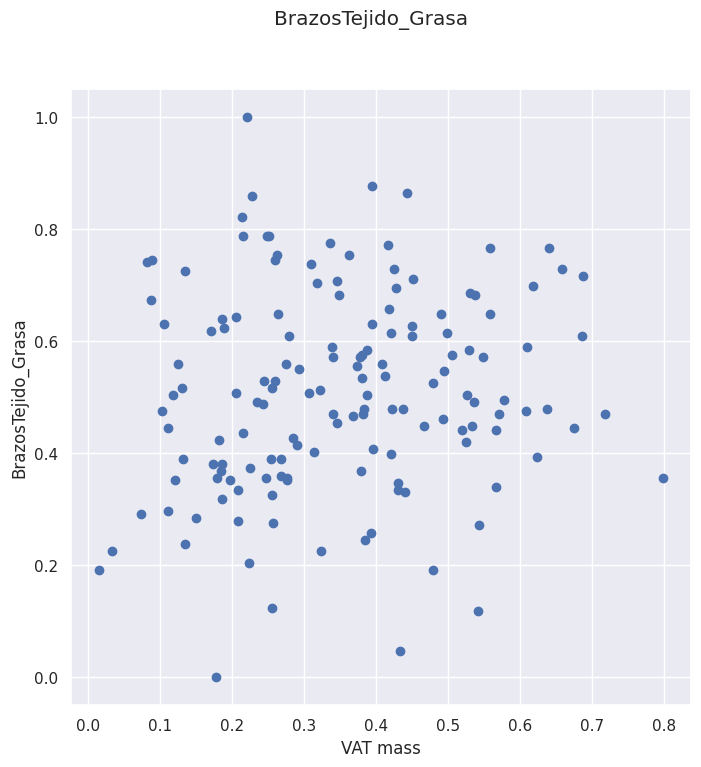

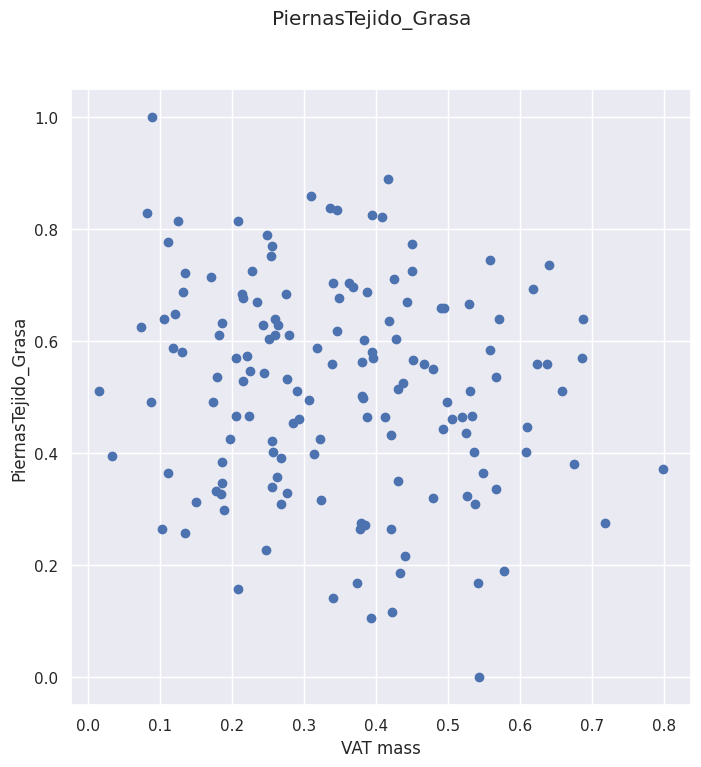

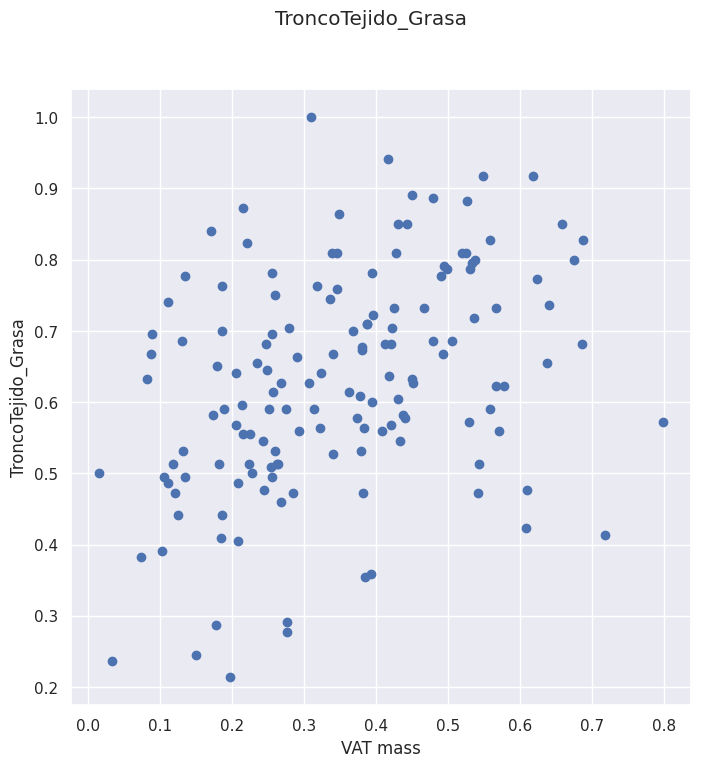

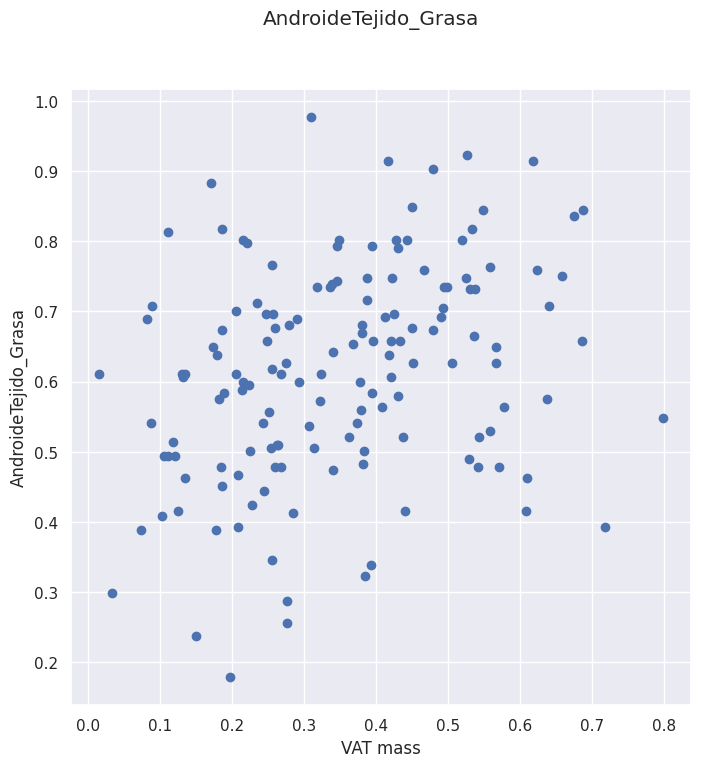

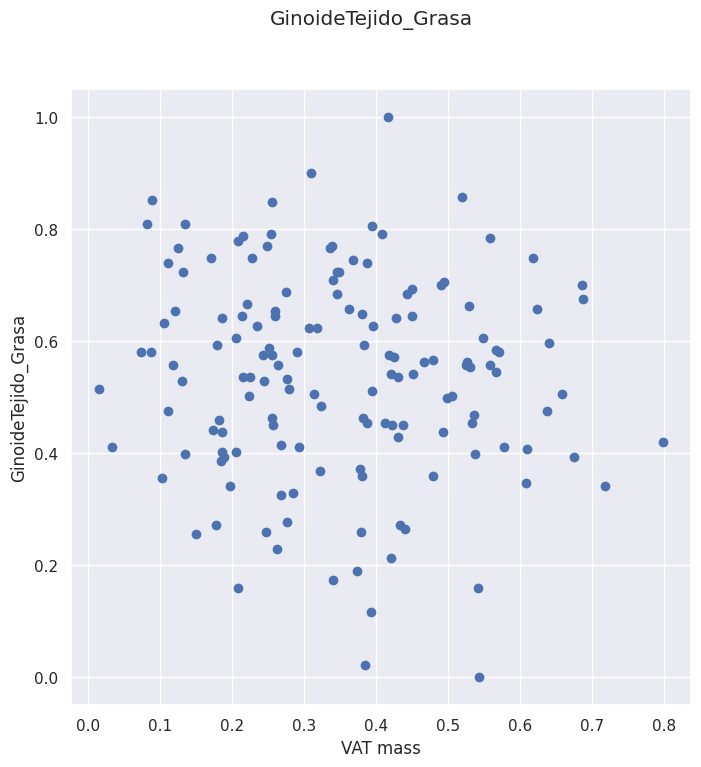

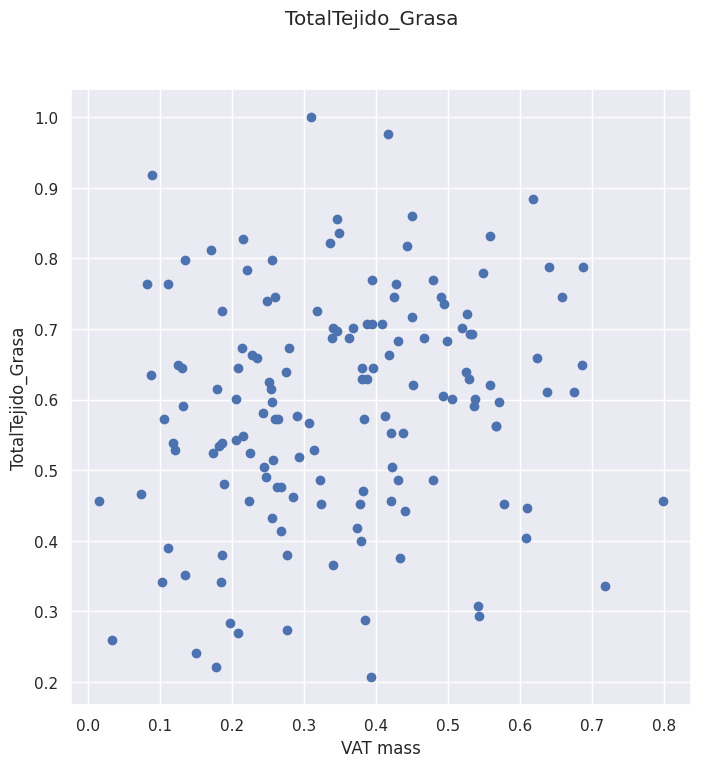

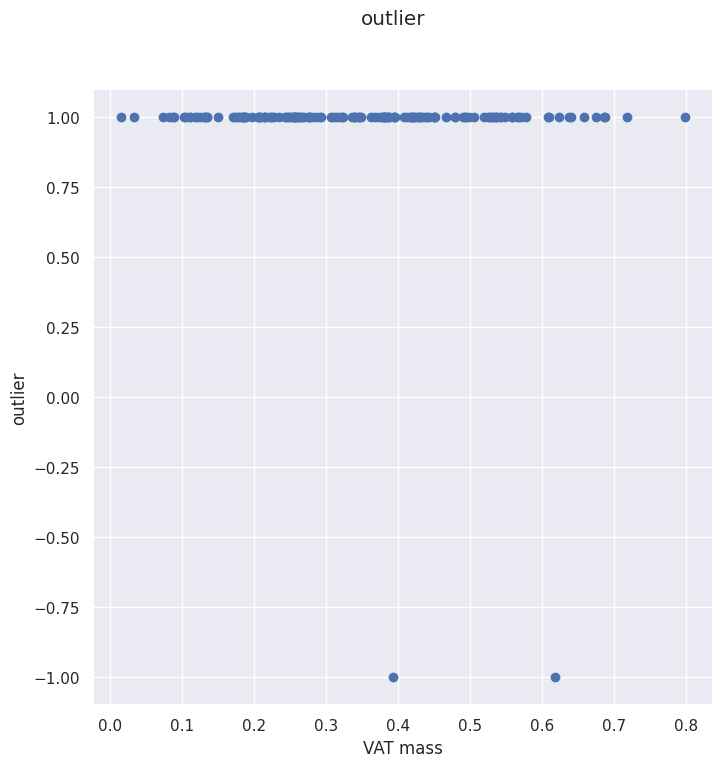

In [58]:
#Code for the scatter plots of all the variables
for x in data1_imp2: 
  plt.figure(figsize=(8,8))
  plt.scatter(data1_imp2["Masa_VAT_g"], data1_imp2[x])
  plt.suptitle(x) 
  plt.xlabel("VAT mass")
  plt.ylabel(x)

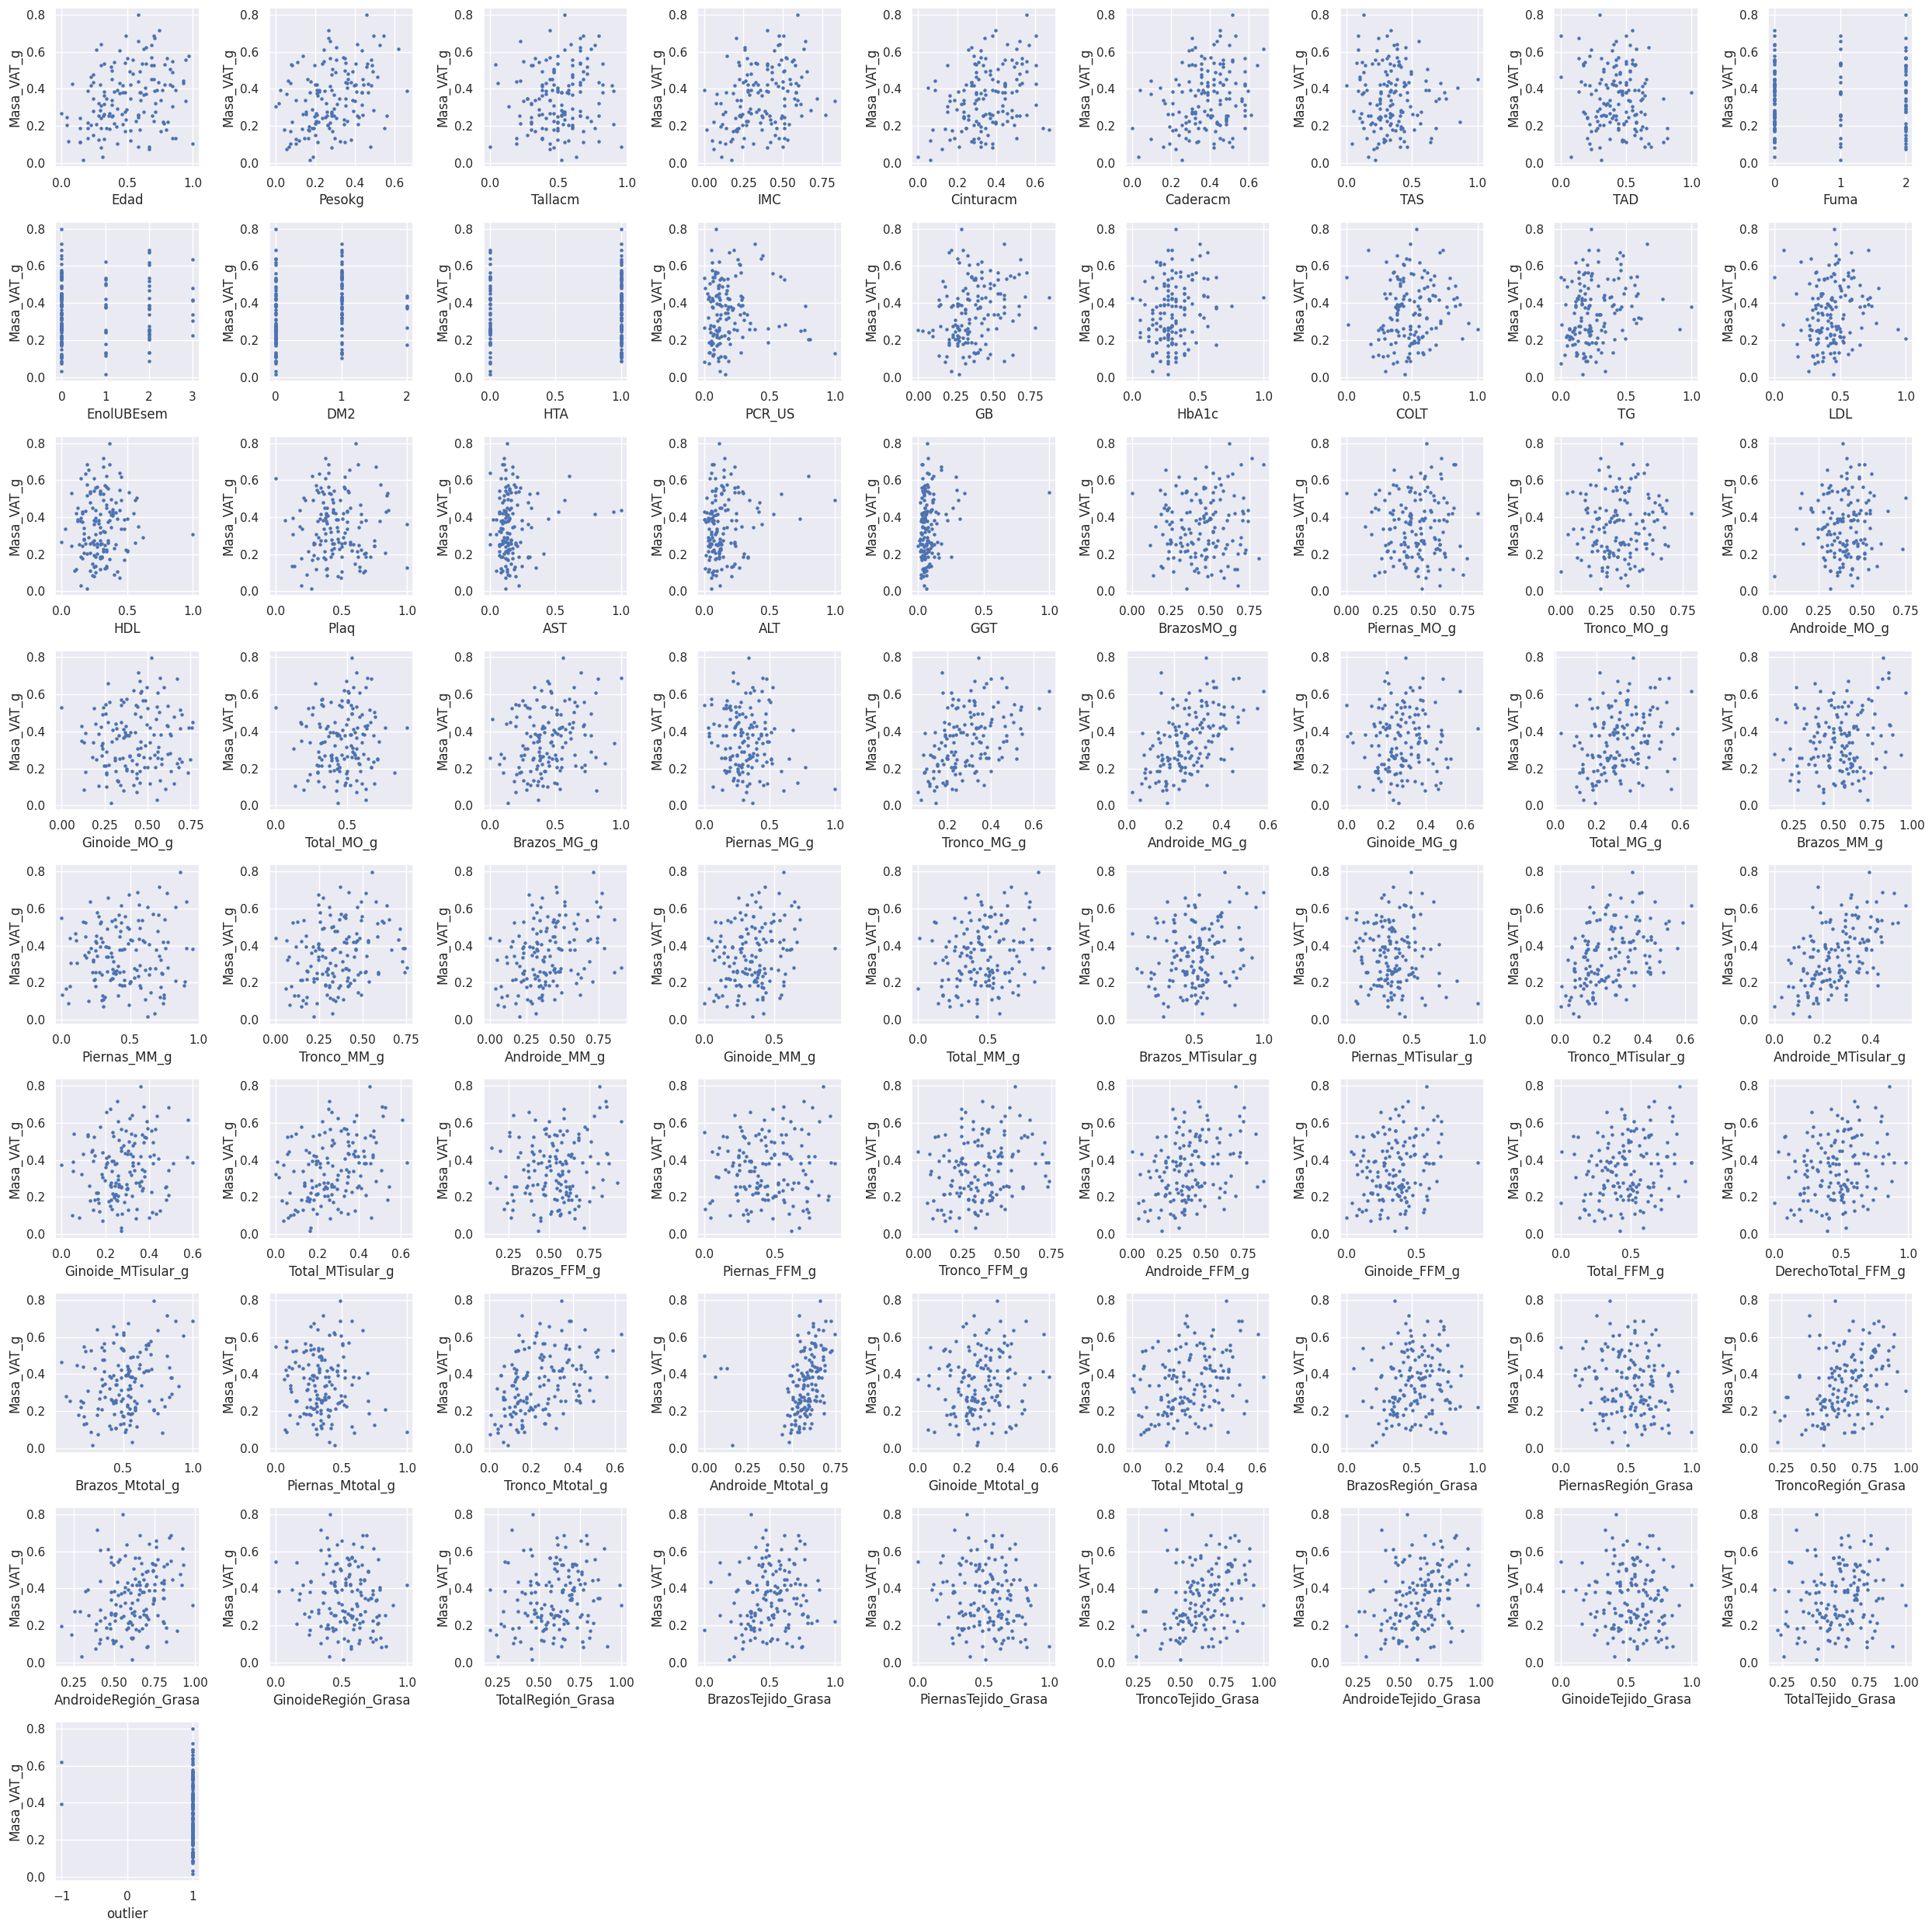

In [73]:
#Scatter plots of the all the variables
import pandas as pd
import matplotlib.pyplot as plt

dataplot = data1_imp2.copy()
drop= ["Masa_VAT_g", "Vol_VAT"]
dataplot = dataplot.drop(drop, axis=1)
# Assuming you have a DataFrame named 'df' and you want to create scatter plots for all columns
target_variable = 'target_variable'  # Name of the variable to compare against
num_plots = len(dataplot.columns)  # Number of scatter plots to create
num_rows = 9 # Number of rows in the grid
num_cols = 9  # Number of columns in the grid

# Calculate the number of subplots needed and create the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 25))
axes = axes.flatten()

# Plot scatter plots for each column
for i, column in enumerate(dataplot.columns):
    ax = axes[i]
    ax.scatter(dataplot[column], data1_imp2["Masa_VAT_g"], s=5)
    ax.set_xlabel(column)
    ax.set_ylabel("Masa_VAT_g")

# Hide empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


The following scatter plots can be used to see the association fo the categorical variable of "DM2" with the label data and the other variables. (As DM2 is the only non-continuous variable that didn't have a null association with the target variable).
We can see that there is no obvious visual association between these variables:

In [ ]:
# for x in data1_imp3: 
#   plt.figure(figsize=(8,8))
#   sns.scatterplot(data=data1_imp2, x="Masa_VAT_g", y=x, hue="DM2")
#   # plt.scatter(data1_imp3["Masa_VAT_g"], data1_imp3[x], hue="DM2")
#   plt.suptitle(x)

### Boxplots

After the outlier data removal, we can verify that there are not extreme values.

In [ ]:
for x in data1_imp3: 
  plt.figure()
  sns.boxplot(data=data1_imp2, x=x)
  plt.suptitle(x)

## Transforming the label data into categorical data

The transformation of the label data into categorical data is essential to classify the VAT quantities into groups.

We have to divide the data in 3 subgroups using tertiles of the label variables.

In [60]:
# Calculating the 1st, 2nd and 3rd tertiles
data1_imp3["Masa_VAT_g"].quantile([.33 , .66])

0.33    0.255264
0.66    0.420256
Name: Masa_VAT_g, dtype: float64

Now we use the pd.cut function to divide the Masa_VAT_g variables into 3 catergories or groups: 

- 0: Values smaller than the first tertile: LOW VAT

- 1: Values between the first and second tertiles: MEDIUM VAT

- 2: Values higher than the second tertile: HIGH VAT

In [61]:
# Dividing "Masa_VAT_g" into 4 groups.
cut = pd.cut(data1_imp3.Masa_VAT_g,bins=[-0.01,   0.254654,  0.418641 ,1],labels=[0,1,2])

#Inserting a new column with the masa_VAT cathegorical classification
data1_imp3.insert(5, "Masa_VAT_cat", cut)

In [62]:
#This dataframe is the only one that will contain the label data, it is saved in both formats, categorical and continuous.
data1_imp3

Pesokg       IMC  Cinturacm  Masa_VAT_g   Vol_VAT Masa_VAT_cat  \
0    0.467685  0.547500   0.604938    0.427692  0.427776            2   
1    0.185664  0.220168   0.345679    0.188205  0.188241            0   
2    0.198590  0.341214   0.246914    0.424103  0.424147            2   
3    0.622797  0.633779   0.506173    0.616923  0.616985            2   
4    0.360752  0.266549   0.456790    0.226923  0.226954            0   
..        ...       ...        ...         ...       ...          ...   
161  0.547591  0.476538   0.382716    0.685385  0.685459            2   
163  0.388954  0.654617   0.345679    0.494103  0.494072            2   
164  0.293772  0.288597   0.345679    0.366923  0.367046            1   
166  0.165687  0.365784   0.672840    0.179231  0.179289            0   
167  0.259694  0.619905   0.333333    0.254872  0.254779            1   

     Tronco_MG_g  Androide_MG_g  Total_MG_g  Androide_MM_g  Tronco_MTisular_g  \
0       0.466901       0.408592    0.505010       0.412939           0.417989   
1       0.224133       0.227390    0.201144       0.380990           0.171411   
2       0.227405       0.203704    0.296579       0.155351           0.132705   
3       0.671821       0.579027    0.654711       0.511981           0.630988   
4       0.234987       0.219531    0.396479       0.626597           0.218078   
..           ...            ...         ...            ...                ...   
161     0.399705       0.450151    0.498813       0.769968           0.379773   
163     0.340090       0.342377    0.422984       0.390176           0.260725   
164     0.332489       0.242356    0.342781       0.305511           0.282563   
166     0.323989       0.245263    0.233802       0.337460           0.288481   
167     0.390248       0.265504    0.286858       0.413339           0.362477   

     Androide_MTisular_g  Total_MTisular_g  Androide_FFM_g  Tronco_Mtotal_g  \
0               0.386033          0.467510        0.403101         0.415361   
1               0.230579          0.164109        0.377132         0.169279   
2               0.161361          0.182768        0.155039         0.130094   
3               0.547483          0.606608        0.506977         0.626959   
4               0.278371          0.365729        0.627907         0.217868   
..                   ...               ...             ...              ...   
161             0.498898          0.523860        0.758527         0.379310   
163             0.326779          0.368176        0.388372         0.260188   
164             0.226171          0.269891        0.301163         0.282132   
166             0.235605          0.150079        0.337209         0.285266   
167             0.268936          0.238600        0.405426         0.360502   

     Total_Mtotal_g  TroncoRegión_Grasa  AndroideRegión_Grasa  \
0          0.462366            0.819444              0.807843   
1          0.162485            0.592593              0.584314   
2          0.179211            0.736111              0.701961   
3          0.603345            0.930556              0.921569   
4          0.366786            0.495370              0.415686   
..              ...                 ...                   ...   
161        0.525687            0.680556              0.658824   
163        0.367981            0.796296              0.737255   
164        0.271207            0.699074              0.654902   
166        0.145759            0.657407              0.635294   
167        0.236559            0.699074              0.623529   

     TroncoTejido_Grasa  AndroideTejido_Grasa  
0              0.809091              0.801556  
1              0.590909              0.583658  
2              0.731818              0.696498  
3              0.918182              0.914397  
4              0.500000              0.424125  
..                  ...                   ...  
161            0.681818              0.657588  
163            0.790909              0.7354

##Feature selection

### Creating a database with anthropometric data:

This database will contain all the anthropometric data from the data1_Imp3 that contains the features that best correlate with the target.

In [63]:
#Creating a DataAP dataframe with only anthropometric variables:
dataAP = data1_imp3.copy()

### Creating a separate database with mostly blood-test related values

The aim of this database is to see the accuracy we can obtain from predicitions made with it. (classification and neural network predictions).
The selected variables have been chosen by the co-tutor of this thesis with the variables he deemed as important.

This database will be named **dataPHY**

In [64]:
# The variables selected are the following:
selected_var = "Pesokg", "TAS", "TAD", "DM2", "HTA", "PCR_US",	"GB",	"HbA1c", "COLT", "TG", "LDL", "HDL", "Plaq", "AST", "ALT", "GGT"

In [65]:
# Creating the database from the imputed database data1_imp2
dataPHY = data1_imp2.copy()

# Creating an array with data to be dropped from the dataframe (without the label data)
drop_var =[]
for column in dataPHY:
  if column not in selected_var:
    drop_var.append(column)

dataPHY = dataPHY.drop(drop_var, axis=1)
dataPHY

Pesokg       TAS       TAD  DM2  HTA    PCR_US        GB     HbA1c  \
0    0.467685  0.285714  0.390625  0.0  0.0  0.181633  0.260274  0.000000   
1    0.185664  0.263736  0.437500  1.0  0.0  0.489796  0.356164  0.181818   
2    0.198590  0.252747  0.406250  1.0  0.0  0.063265  0.424658  0.303030   
3    0.622797  0.384615  0.578125  0.0  1.0  0.061224  0.273973  0.212121   
4    0.360752  0.307692  0.281250  0.0  0.0  0.097959  0.232877  0.272727   
..        ...       ...       ...  ...  ...       ...       ...       ...   
161  0.547591  0.087912  0.000000  0.0  0.0  0.226531  0.219178  0.272727   
163  0.388954  0.494505  0.531250  1.0  1.0  0.110204  0.438356  0.242424   
164  0.293772  0.406593  0.468750  1.0  1.0  0.179592  0.315068  0.393939   
166  0.165687  0.516484  0.609375  0.0  1.0  0.200000  0.301370  0.303030   
167  0.259694  0.186813  0.343750  0.0  0.0  0.116327  0.000000  0.363636   

         COLT        TG       LDL       HDL      Plaq       AST       ALT  \
0    0.301435  0.124629  0.326633  0.158537  0.546632  0.941860  0.059701   
1    0.511962  0.267062  0.442211  0.304878  0.720207  0.081395  0.111940   
2    0.373206  0.160237  0.286432  0.414634  0.437824  0.116279  0.022388   
3    0.555024  0.112760  0.477387  0.451220  0.528497  0.209302  0.149254   
4    0.516746  0.225519  0.452261  0.317073  0.484456  0.151163  0.119403   
..        ...       ...       ...       ...       ...       ...       ...   
161  0.736842  0.284866  0.713568  0.195122  0.629534  0.093023  0.074627   
163  0.827751  0.178042  0.497487  0.560976  0.489637  0.569767  1.000000   
164  0.559809  0.451039  0.437186  0.280488  0.391192  0.093023  0.074627   
166  0.339713  0.106825  0.316583  0.292683  0.318653  0.174419  0.111940   
167  0.344498  0.100890  0.346734  0.243902  0.336788  0.069767  0.052239   

          GGT  
0    0.053191  
1    0.120567  
2    0.039007  
3    0.287234  
4    0.067376  
..        ...  
161  0.031915  
163  0.109929  
164  0.141844  
166  0.053191  
167  0.021277  

[148 rows x 16 columns]

### Creating a separate database with both, dataframe with anthropometric data and from the non-anthropometric data

In [66]:
df1 = data1_imp3.copy()
df2 = dataPHY.copy()
dataALL = pd.concat([df1, df2], axis=1).reindex(df1.index)

# **Preprocessing conclusions**

We have 5 main different datasets chosen to do the modeling:
- ***dataAP***, the dataframe with the variables that correlate the best and the ones with the best r^2, which happen to be mostly the same variables. The original dataframe had 167 features, with *data1_imp3* this number has been reduced to 19. This dataframe contains anthropometric and physiological features. `IT IS THE ONLY ONE THAT CONTAINS THE LABEL DATA IN BOTH BOTH CATEGORICAL AND CONTINUOUS FORMATS.`

- ***DataPHY***, a dataframe with variables, originated by blood test, of interest for their actual biological influence in VAT. The dataframe has 16 columns.

- ***DataALL**, a dataframe with data1_imp3 and DataPHY combined.

We'll export these three dataframes and change their names, data1_imp3, as it has mainly anthropometric data it will be named dataAP, dataPHY will be named the same and dataALL will be named the same.

# Exporting the datasets.

In [67]:
#Importing the dataAP database to drive
dataAP.to_csv(r'/content/drive/MyDrive/TFG/dataAP.csv')

In [68]:
#Importing the data_phy database to drive
dataPHY.to_csv(r'/content/drive/MyDrive/TFG/dataPHY.csv')

In [69]:
#Importing the dataALL database to drive
dataALL.to_csv(r'/content/drive/MyDrive/TFG/dataALL.csv')

In [70]:
dataAP

Pesokg       IMC  Cinturacm  Masa_VAT_g   Vol_VAT Masa_VAT_cat  \
0    0.467685  0.547500   0.604938    0.427692  0.427776            2   
1    0.185664  0.220168   0.345679    0.188205  0.188241            0   
2    0.198590  0.341214   0.246914    0.424103  0.424147            2   
3    0.622797  0.633779   0.506173    0.616923  0.616985            2   
4    0.360752  0.266549   0.456790    0.226923  0.226954            0   
..        ...       ...        ...         ...       ...          ...   
161  0.547591  0.476538   0.382716    0.685385  0.685459            2   
163  0.388954  0.654617   0.345679    0.494103  0.494072            2   
164  0.293772  0.288597   0.345679    0.366923  0.367046            1   
166  0.165687  0.365784   0.672840    0.179231  0.179289            0   
167  0.259694  0.619905   0.333333    0.254872  0.254779            1   

     Tronco_MG_g  Androide_MG_g  Total_MG_g  Androide_MM_g  Tronco_MTisular_g  \
0       0.466901       0.408592    0.505010       0.412939           0.417989   
1       0.224133       0.227390    0.201144       0.380990           0.171411   
2       0.227405       0.203704    0.296579       0.155351           0.132705   
3       0.671821       0.579027    0.654711       0.511981           0.630988   
4       0.234987       0.219531    0.396479       0.626597           0.218078   
..           ...            ...         ...            ...                ...   
161     0.399705       0.450151    0.498813       0.769968           0.379773   
163     0.340090       0.342377    0.422984       0.390176           0.260725   
164     0.332489       0.242356    0.342781       0.305511           0.282563   
166     0.323989       0.245263    0.233802       0.337460           0.288481   
167     0.390248       0.265504    0.286858       0.413339           0.362477   

     Androide_MTisular_g  Total_MTisular_g  Androide_FFM_g  Tronco_Mtotal_g  \
0               0.386033          0.467510        0.403101         0.415361   
1               0.230579          0.164109        0.377132         0.169279   
2               0.161361          0.182768        0.155039         0.130094   
3               0.547483          0.606608        0.506977         0.626959   
4               0.278371          0.365729        0.627907         0.217868   
..                   ...               ...             ...              ...   
161             0.498898          0.523860        0.758527         0.379310   
163             0.326779          0.368176        0.388372         0.260188   
164             0.226171          0.269891        0.301163         0.282132   
166             0.235605          0.150079        0.337209         0.285266   
167             0.268936          0.238600        0.405426         0.360502   

     Total_Mtotal_g  TroncoRegión_Grasa  AndroideRegión_Grasa  \
0          0.462366            0.819444              0.807843   
1          0.162485            0.592593              0.584314   
2          0.179211            0.736111              0.701961   
3          0.603345            0.930556              0.921569   
4          0.366786            0.495370              0.415686   
..              ...                 ...                   ...   
161        0.525687            0.680556              0.658824   
163        0.367981            0.796296              0.737255   
164        0.271207            0.699074              0.654902   
166        0.145759            0.657407              0.635294   
167        0.236559            0.699074              0.623529   

     TroncoTejido_Grasa  AndroideTejido_Grasa  
0              0.809091              0.801556  
1              0.590909              0.583658  
2              0.731818              0.696498  
3              0.918182              0.914397  
4              0.500000              0.424125  
..                  ...                   ...  
161            0.681818              0.657588  
163            0.790909              0.7354

In [71]:
dataPHY

Pesokg       TAS       TAD  DM2  HTA    PCR_US        GB     HbA1c  \
0    0.467685  0.285714  0.390625  0.0  0.0  0.181633  0.260274  0.000000   
1    0.185664  0.263736  0.437500  1.0  0.0  0.489796  0.356164  0.181818   
2    0.198590  0.252747  0.406250  1.0  0.0  0.063265  0.424658  0.303030   
3    0.622797  0.384615  0.578125  0.0  1.0  0.061224  0.273973  0.212121   
4    0.360752  0.307692  0.281250  0.0  0.0  0.097959  0.232877  0.272727   
..        ...       ...       ...  ...  ...       ...       ...       ...   
161  0.547591  0.087912  0.000000  0.0  0.0  0.226531  0.219178  0.272727   
163  0.388954  0.494505  0.531250  1.0  1.0  0.110204  0.438356  0.242424   
164  0.293772  0.406593  0.468750  1.0  1.0  0.179592  0.315068  0.393939   
166  0.165687  0.516484  0.609375  0.0  1.0  0.200000  0.301370  0.303030   
167  0.259694  0.186813  0.343750  0.0  0.0  0.116327  0.000000  0.363636   

         COLT        TG       LDL       HDL      Plaq       AST       ALT  \
0    0.301435  0.124629  0.326633  0.158537  0.546632  0.941860  0.059701   
1    0.511962  0.267062  0.442211  0.304878  0.720207  0.081395  0.111940   
2    0.373206  0.160237  0.286432  0.414634  0.437824  0.116279  0.022388   
3    0.555024  0.112760  0.477387  0.451220  0.528497  0.209302  0.149254   
4    0.516746  0.225519  0.452261  0.317073  0.484456  0.151163  0.119403   
..        ...       ...       ...       ...       ...       ...       ...   
161  0.736842  0.284866  0.713568  0.195122  0.629534  0.093023  0.074627   
163  0.827751  0.178042  0.497487  0.560976  0.489637  0.569767  1.000000   
164  0.559809  0.451039  0.437186  0.280488  0.391192  0.093023  0.074627   
166  0.339713  0.106825  0.316583  0.292683  0.318653  0.174419  0.111940   
167  0.344498  0.100890  0.346734  0.243902  0.336788  0.069767  0.052239   

          GGT  
0    0.053191  
1    0.120567  
2    0.039007  
3    0.287234  
4    0.067376  
..        ...  
161  0.031915  
163  0.109929  
164  0.141844  
166  0.053191  
167  0.021277  

[148 rows x 16 columns]

In [72]:
dataALL

Pesokg       IMC  Cinturacm  Masa_VAT_g   Vol_VAT Masa_VAT_cat  \
0    0.467685  0.547500   0.604938    0.427692  0.427776            2   
1    0.185664  0.220168   0.345679    0.188205  0.188241            0   
2    0.198590  0.341214   0.246914    0.424103  0.424147            2   
3    0.622797  0.633779   0.506173    0.616923  0.616985            2   
4    0.360752  0.266549   0.456790    0.226923  0.226954            0   
..        ...       ...        ...         ...       ...          ...   
161  0.547591  0.476538   0.382716    0.685385  0.685459            2   
163  0.388954  0.654617   0.345679    0.494103  0.494072            2   
164  0.293772  0.288597   0.345679    0.366923  0.367046            1   
166  0.165687  0.365784   0.672840    0.179231  0.179289            0   
167  0.259694  0.619905   0.333333    0.254872  0.254779            1   

     Tronco_MG_g  Androide_MG_g  Total_MG_g  Androide_MM_g  ...        GB  \
0       0.466901       0.408592    0.505010       0.412939  ...  0.260274   
1       0.224133       0.227390    0.201144       0.380990  ...  0.356164   
2       0.227405       0.203704    0.296579       0.155351  ...  0.424658   
3       0.671821       0.579027    0.654711       0.511981  ...  0.273973   
4       0.234987       0.219531    0.396479       0.626597  ...  0.232877   
..           ...            ...         ...            ...  ...       ...   
161     0.399705       0.450151    0.498813       0.769968  ...  0.219178   
163     0.340090       0.342377    0.422984       0.390176  ...  0.438356   
164     0.332489       0.242356    0.342781       0.305511  ...  0.315068   
166     0.323989       0.245263    0.233802       0.337460  ...  0.301370   
167     0.390248       0.265504    0.286858       0.413339  ...  0.000000   

        HbA1c      COLT        TG       LDL       HDL      Plaq       AST  \
0    0.000000  0.301435  0.124629  0.326633  0.158537  0.546632  0.941860   
1    0.181818  0.511962  0.267062  0.442211  0.304878  0.720207  0.081395   
2    0.303030  0.373206  0.160237  0.286432  0.414634  0.437824  0.116279   
3    0.212121  0.555024  0.112760  0.477387  0.451220  0.528497  0.209302   
4    0.272727  0.516746  0.225519  0.452261  0.317073  0.484456  0.151163   
..        ...       ...       ...       ...       ...       ...       ...   
161  0.272727  0.736842  0.284866  0.713568  0.195122  0.629534  0.093023   
163  0.242424  0.827751  0.178042  0.497487  0.560976  0.489637  0.569767   
164  0.393939  0.559809  0.451039  0.437186  0.280488  0.391192  0.093023   
166  0.303030  0.339713  0.106825  0.316583  0.292683  0.318653  0.174419   
167  0.363636  0.344498  0.100890  0.346734  0.243902  0.336788  0.069767   

          ALT       GGT  
0    0.059701  0.053191  
1    0.111940  0.120567  
2    0.022388  0.039007  
3    0.149254  0.287234  
4    0.119403  0.067376  
..        ...       ...  
161  0.074627  0.031915  
163  1.000000  0.109929  
164  0.074627  0.141844  
166  0.111940  0.053191  
167  0.052239  0.021277  

[148 rows x 36 columns]